<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/Datathon2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Eğitim veri setini yükleme
train_data = pd.read_csv("train.csv")

# Test veri setini yükleme
test_data = pd.read_csv("test_x.csv")

In [ ]:
import matplotlib.pyplot as plt

testclass = train_data[["Cinsiyet", "Yaş Grubu", "Medeni Durum", "Eğitim Düzeyi", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitime Devam Etme Durumu"]]
# Pasta grafikler
plt.figure(figsize=(16, 12))

for i, column in enumerate(testclass.columns, start=1):
    plt.subplot(3, 3, i)
    data_counts = testclass[column].value_counts()
    plt.pie(data_counts, labels=data_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"{column} Dağılımı")
    plt.axis('equal')

plt.tight_layout()
plt.show()




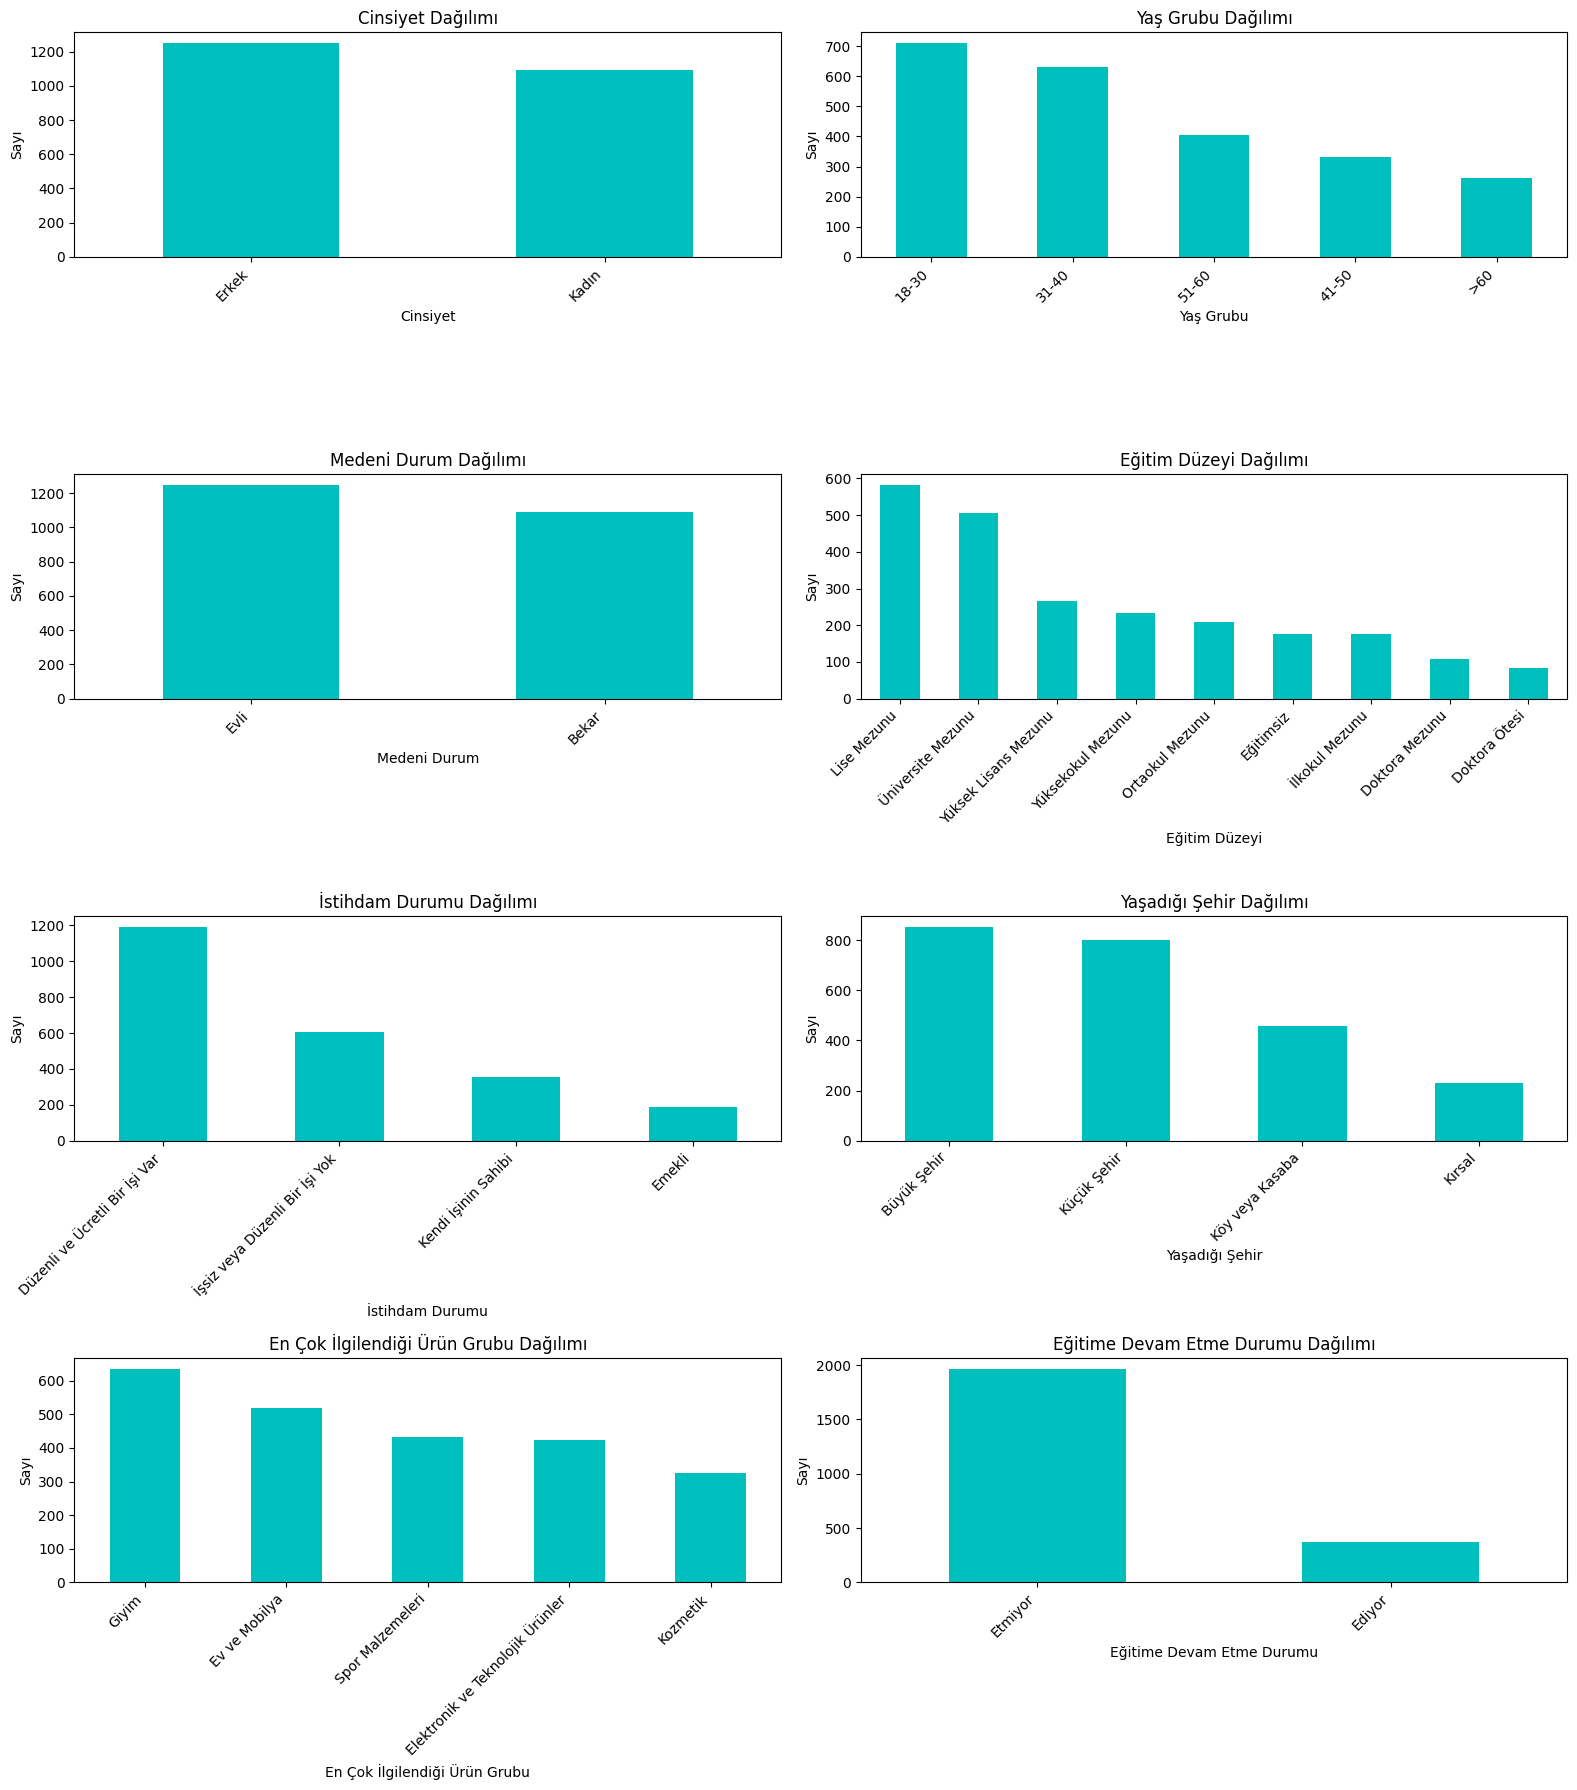

In [3]:
import matplotlib.pyplot as plt

testclass = test_data[["Cinsiyet", "Yaş Grubu", "Medeni Durum", "Eğitim Düzeyi", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu", "Eğitime Devam Etme Durumu"]]

plt.figure(figsize=(16, 18))  # Boyutları ayarlayın

for i, column in enumerate(testclass.columns, start=1):
    plt.subplot(4, 2, i)  # Dört sıra, iki sütunlu altgrafikler oluşturur
    data_counts = testclass[column].value_counts()
    data_counts.plot(kind='bar', color='c')  # Çubuk grafik türünü ve renkleri belirleyin
    plt.title(f"{column} Dağılımı")
    plt.xlabel(column)
    plt.ylabel("Sayı")
    plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


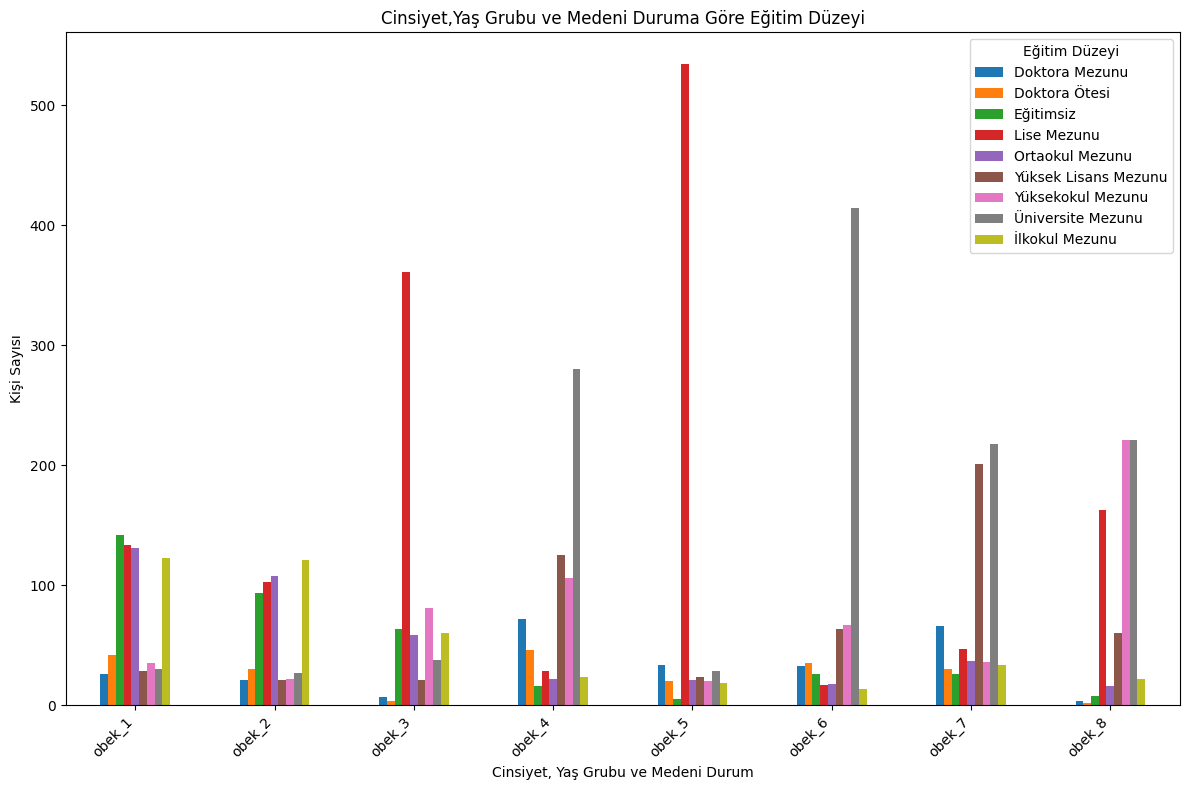

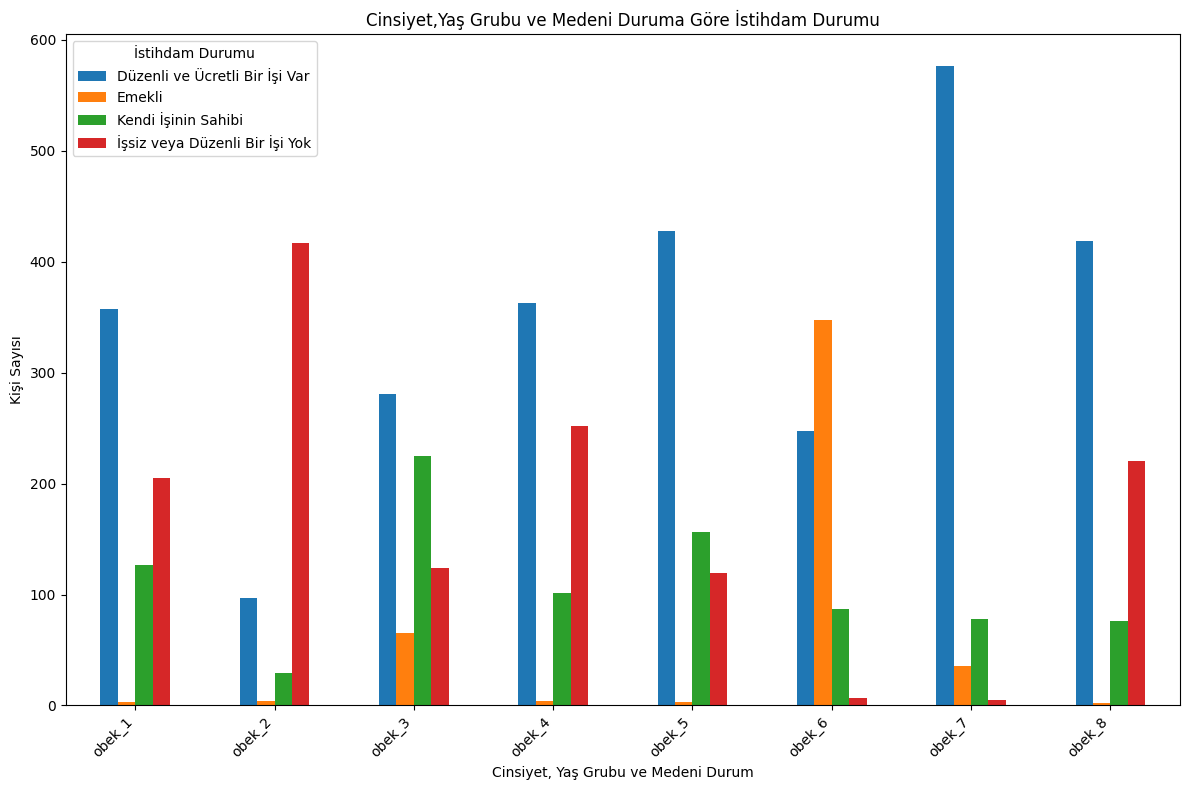

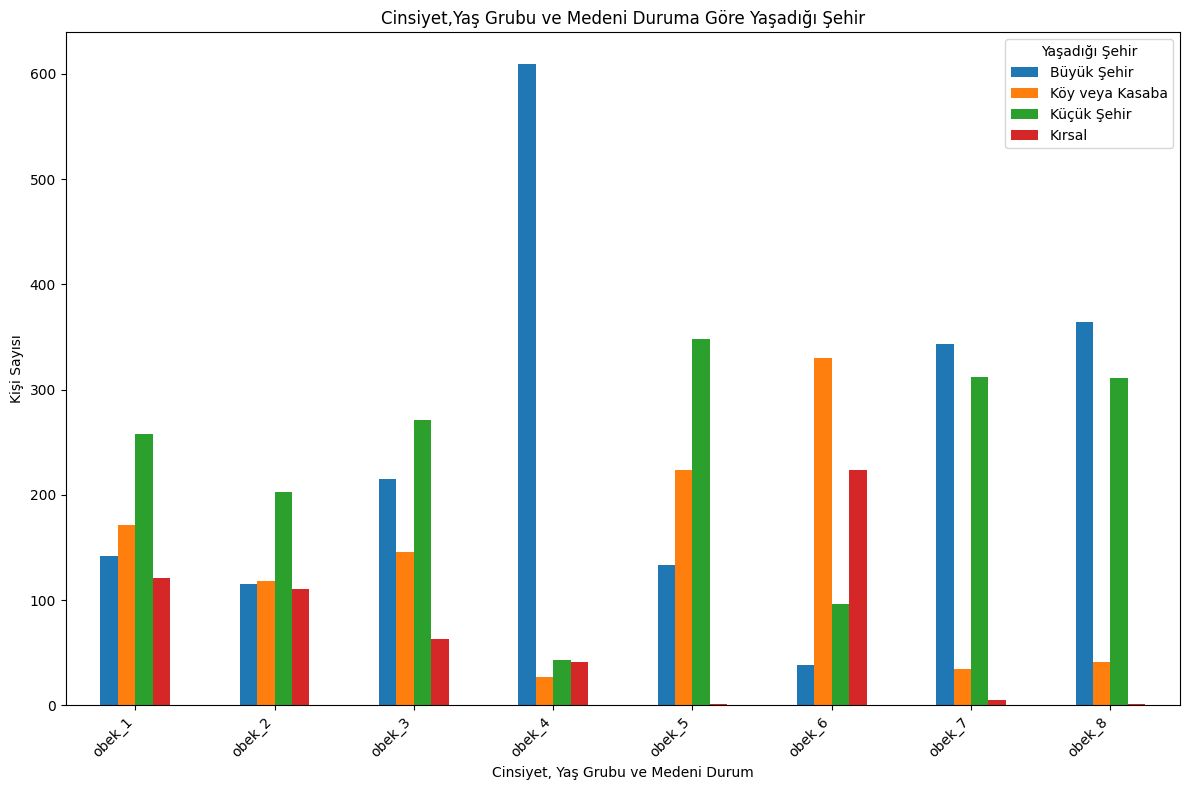

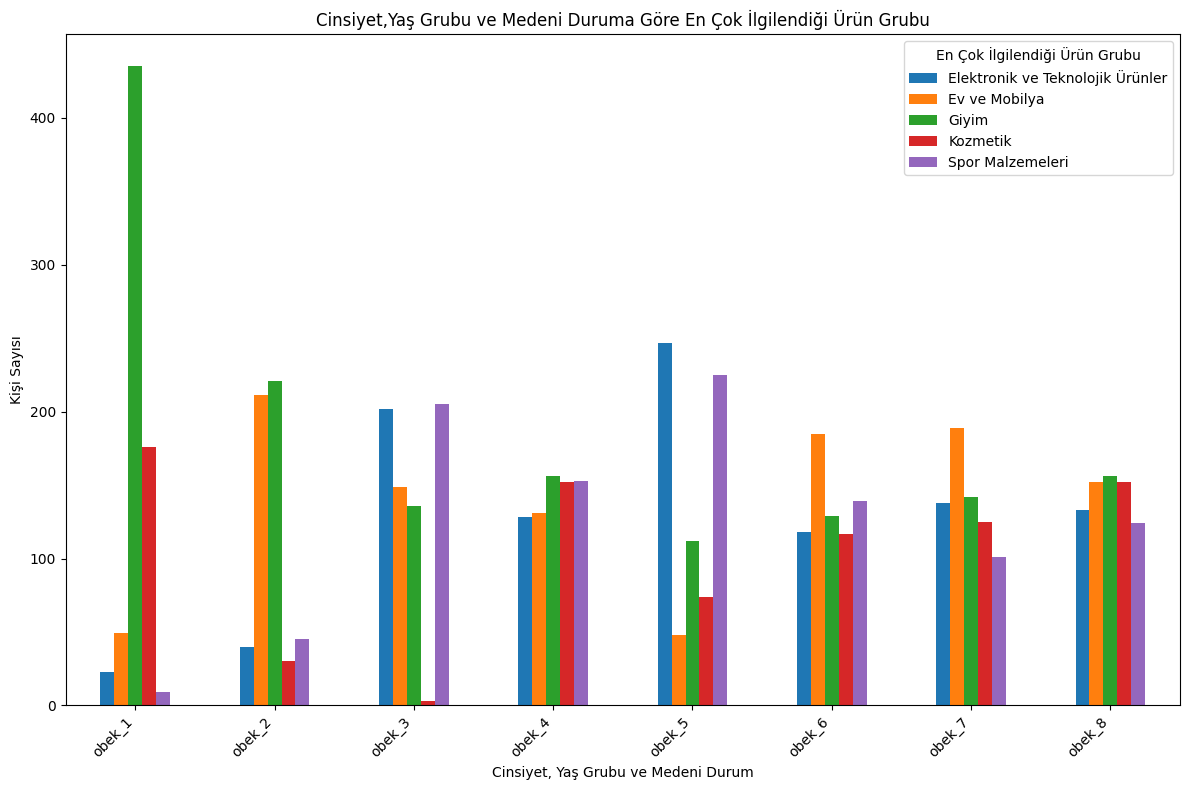

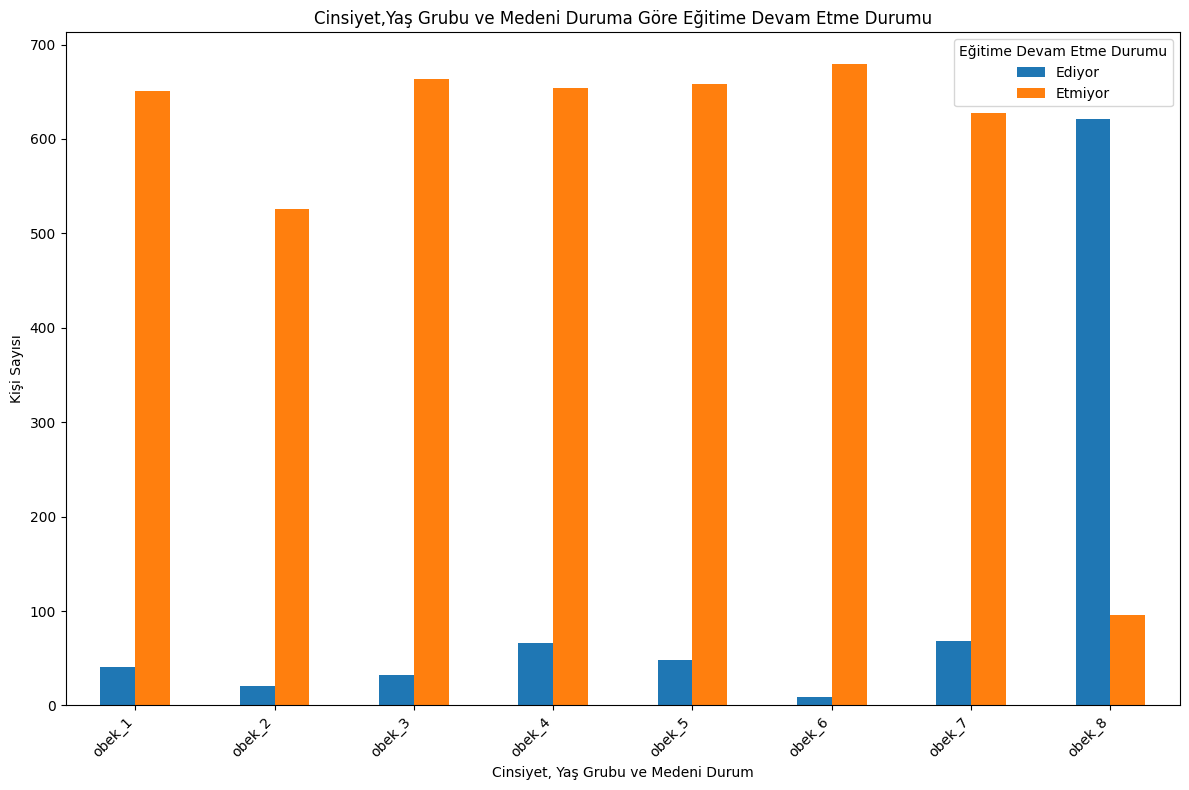

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

testclass1=testclass.drop(columns=["Cinsiyet","Medeni Durum","Yaş Grubu"])# Pivot Tabloda dahil olanları Kaldırdım
testclass1
data = pd.DataFrame(train_data)
for sutun in testclass1:
# Pivot table oluşturulması
    pivot_table = data.pivot_table(index=["Öbek İsmi"], columns=f"{sutun}", aggfunc="size", fill_value=0)

    # Bar plot grafiğinin oluşturulması
    pivot_table.plot(kind="bar", figsize=(12, 8))
    plt.title(f"Cinsiyet,Yaş Grubu ve Medeni Duruma Göre {sutun}")
    plt.xlabel("Cinsiyet, Yaş Grubu ve Medeni Durum")
    plt.ylabel("Kişi Sayısı")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title=f"{sutun}")
    plt.tight_layout()
    plt.show()


In [ ]:
testclass1 = testclass[3:7]

"line": Çizgi grafiği
"bar": Çubuk grafiği (varsayılan)
"barh": Yatay çubuk grafiği
"hist": Histogram
"box": Kutu grafiği
"kde": Kernel yoğunluk tahmini grafiği
"density": Yoğunluk grafiği (kernel yoğunluk tahmini ile aynıdır)
"area": Alan grafiği
"pie": Pasta grafiği
"scatter": Nokta dağılım grafiği
"hexbin": Hexbin grafiği **kalın metin**

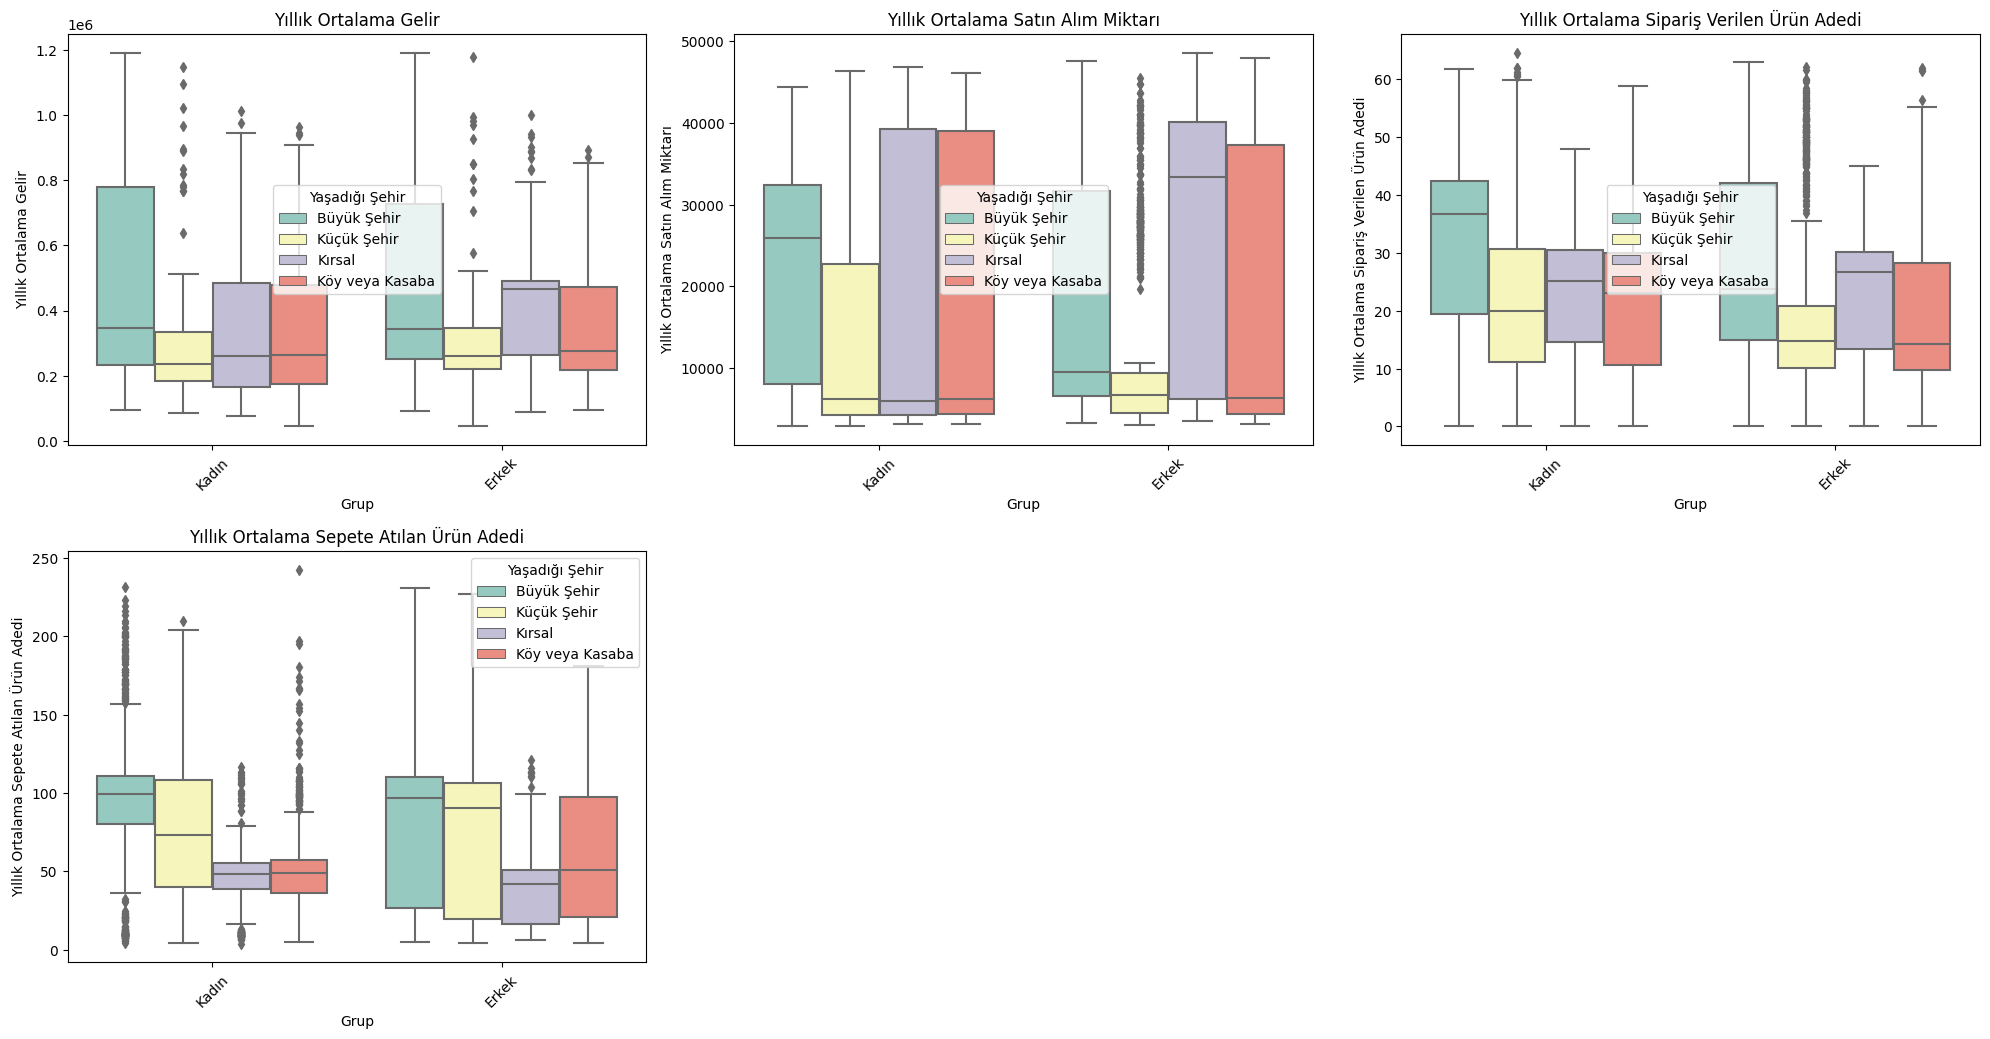

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


train_data1 = pd.DataFrame(train_data)

features = [
    "Yıllık Ortalama Gelir",
    "Yıllık Ortalama Satın Alım Miktarı",
    "Yıllık Ortalama Sipariş Verilen Ürün Adedi",
    "Yıllık Ortalama Sepete Atılan Ürün Adedi"
]

# Grup sütunu oluşturma
train_data1["Grup"] = train_data1["Cinsiyet"]

plt.figure(figsize=(20, 15))

for idx, feature in enumerate(features, 1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=train_data1, x="Grup", y=feature, hue="Yaşadığı Şehir", palette="Set3")
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


<ipython-input-15-0eae488c02db>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


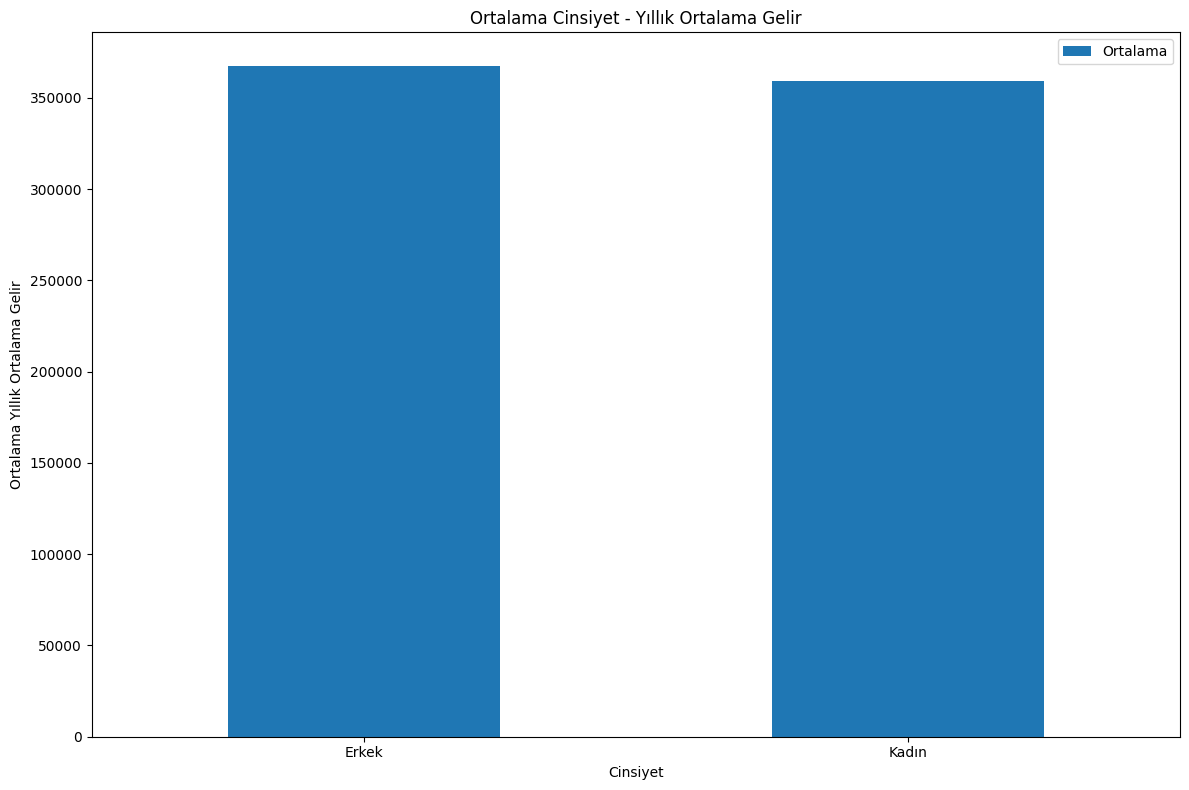

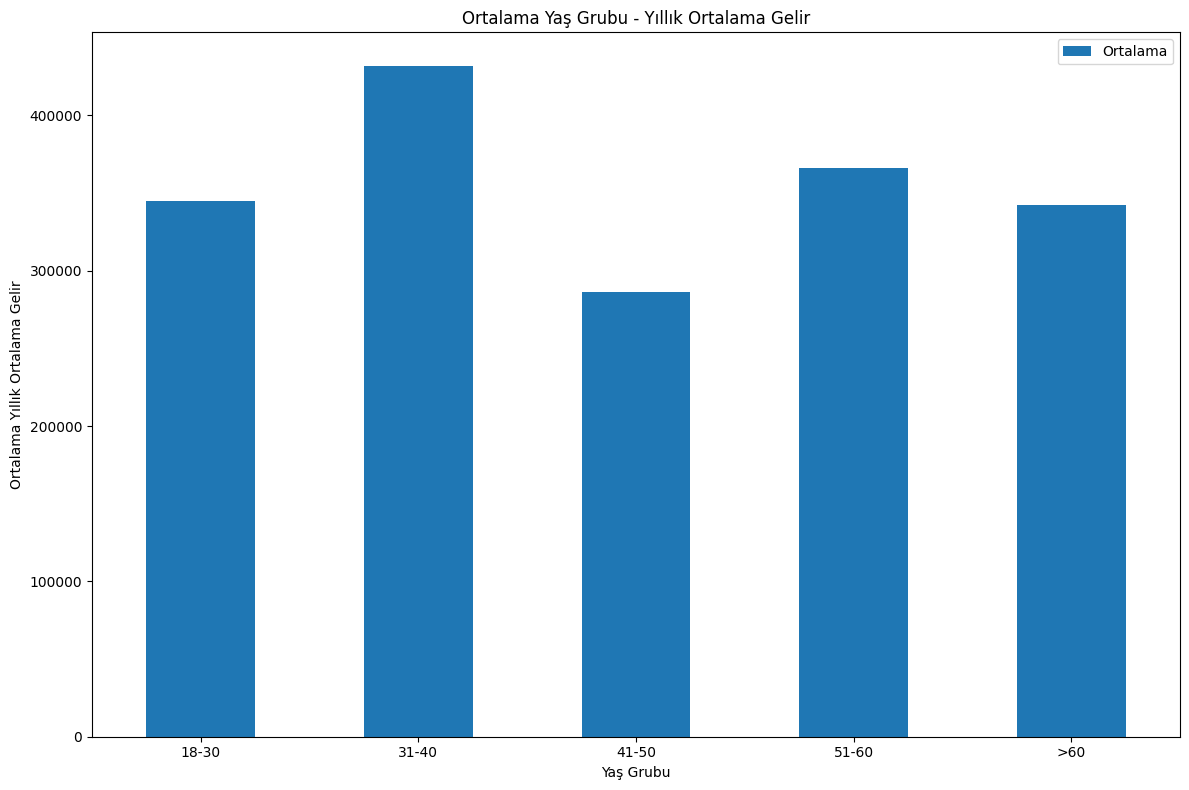

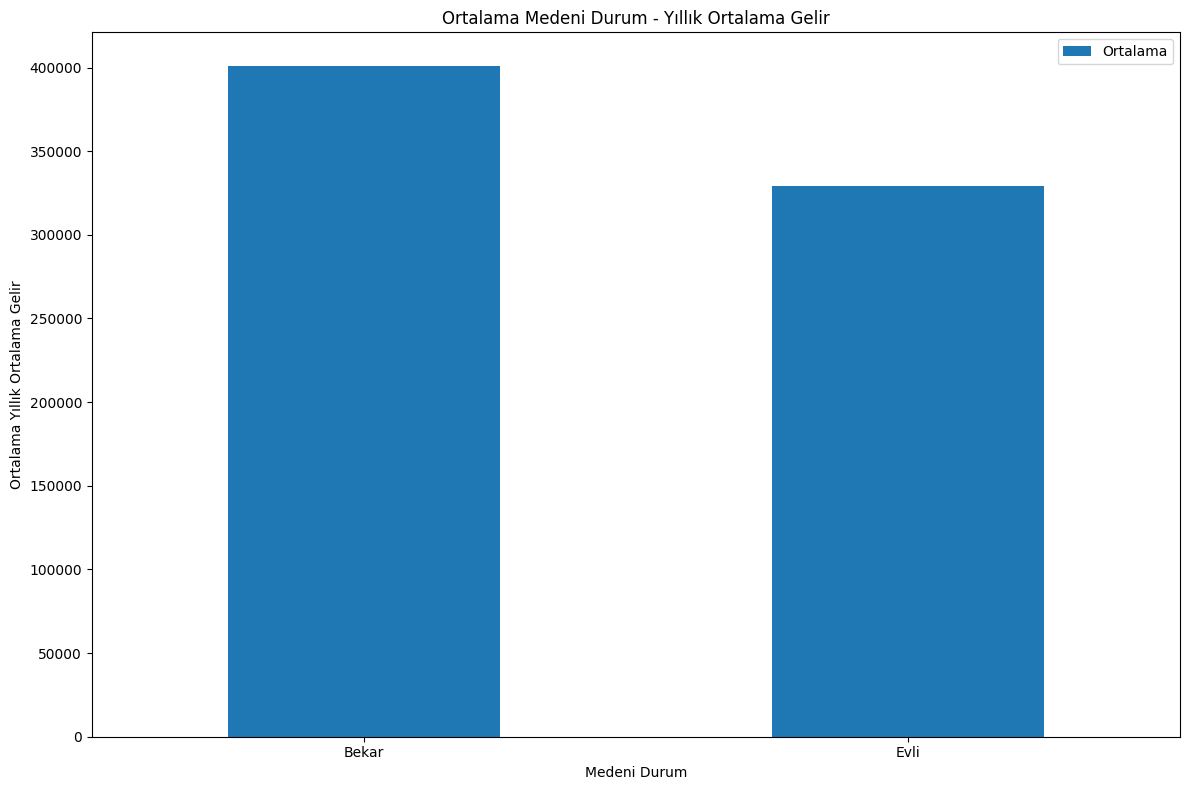

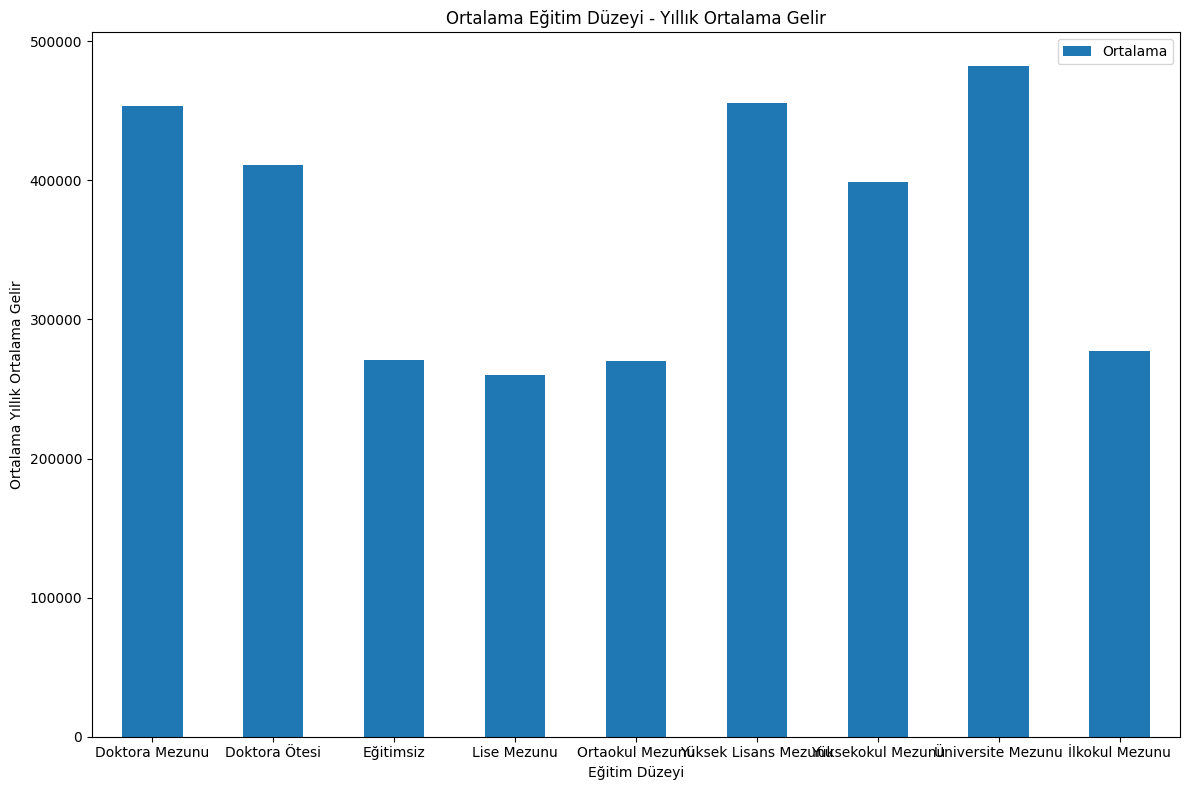

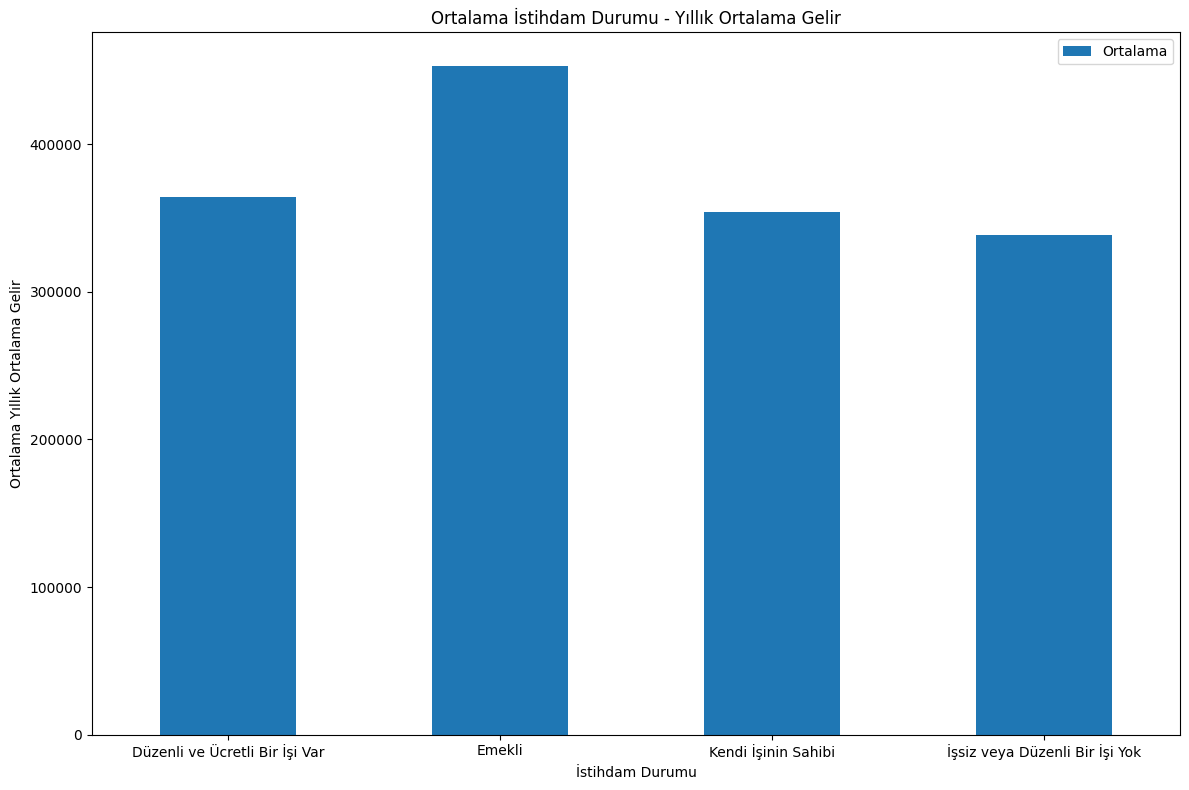

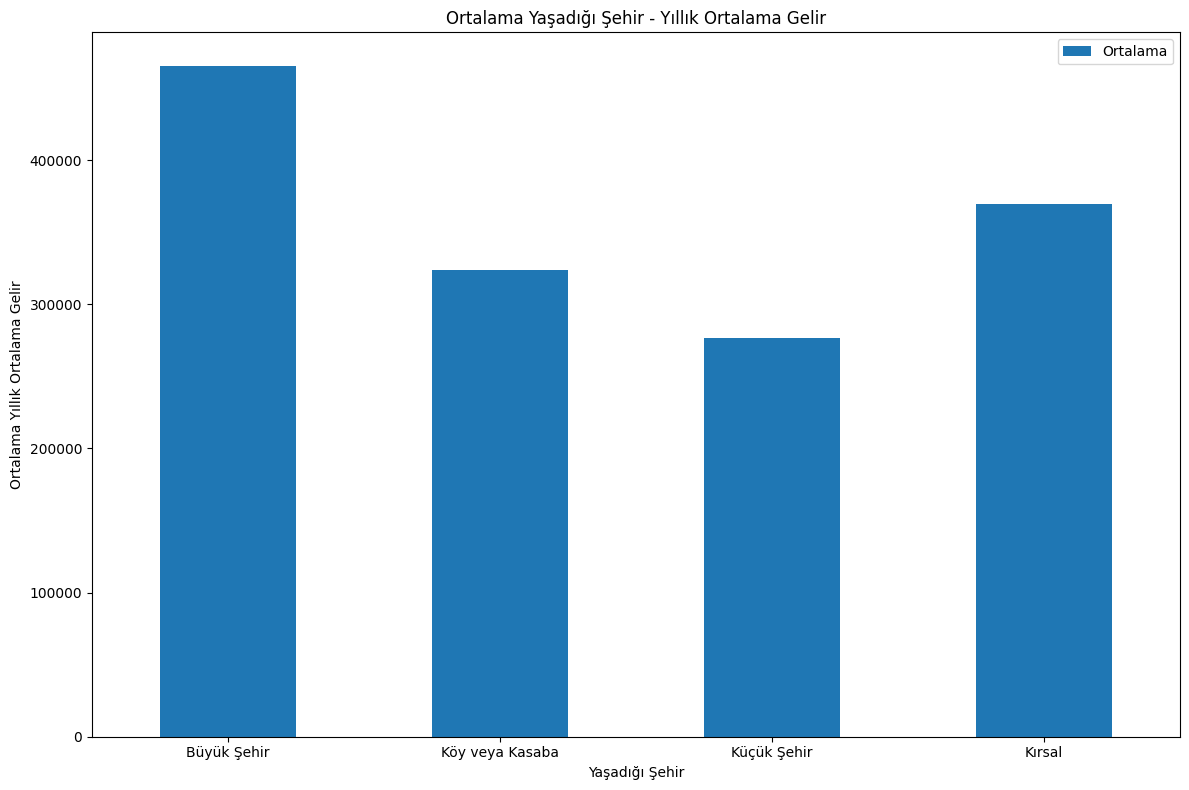

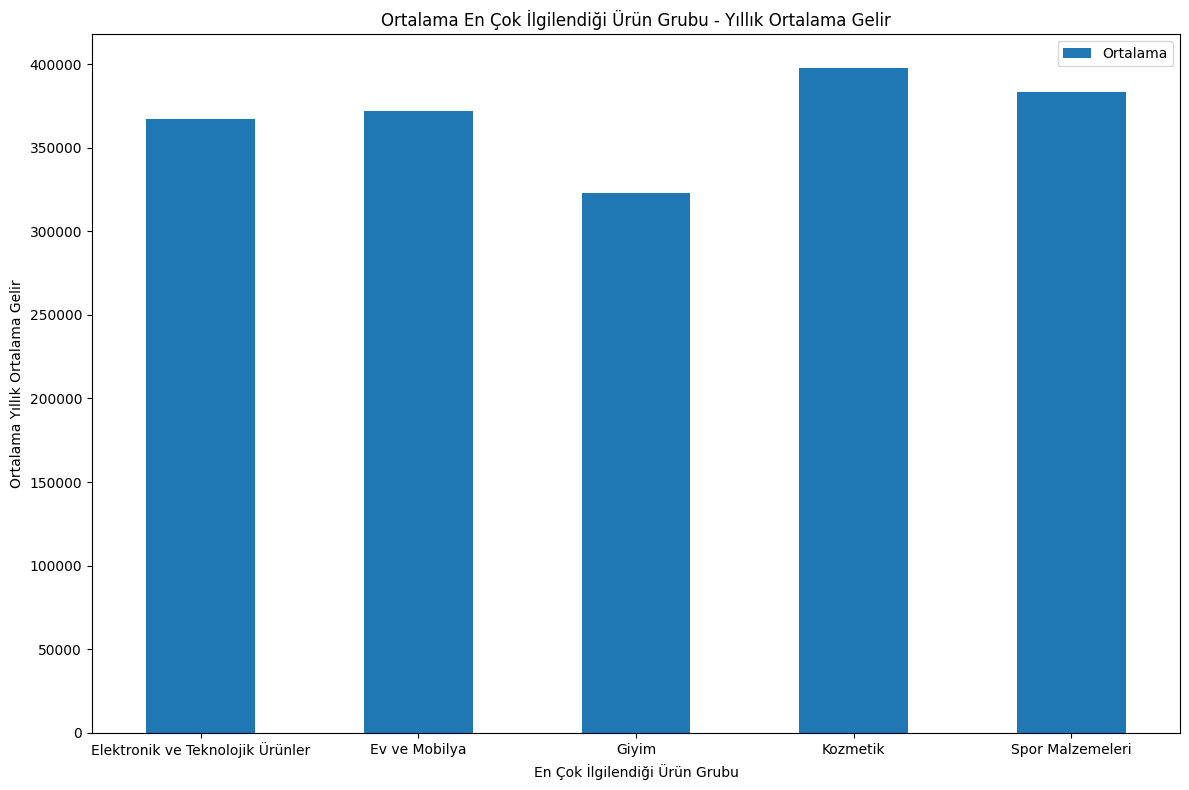

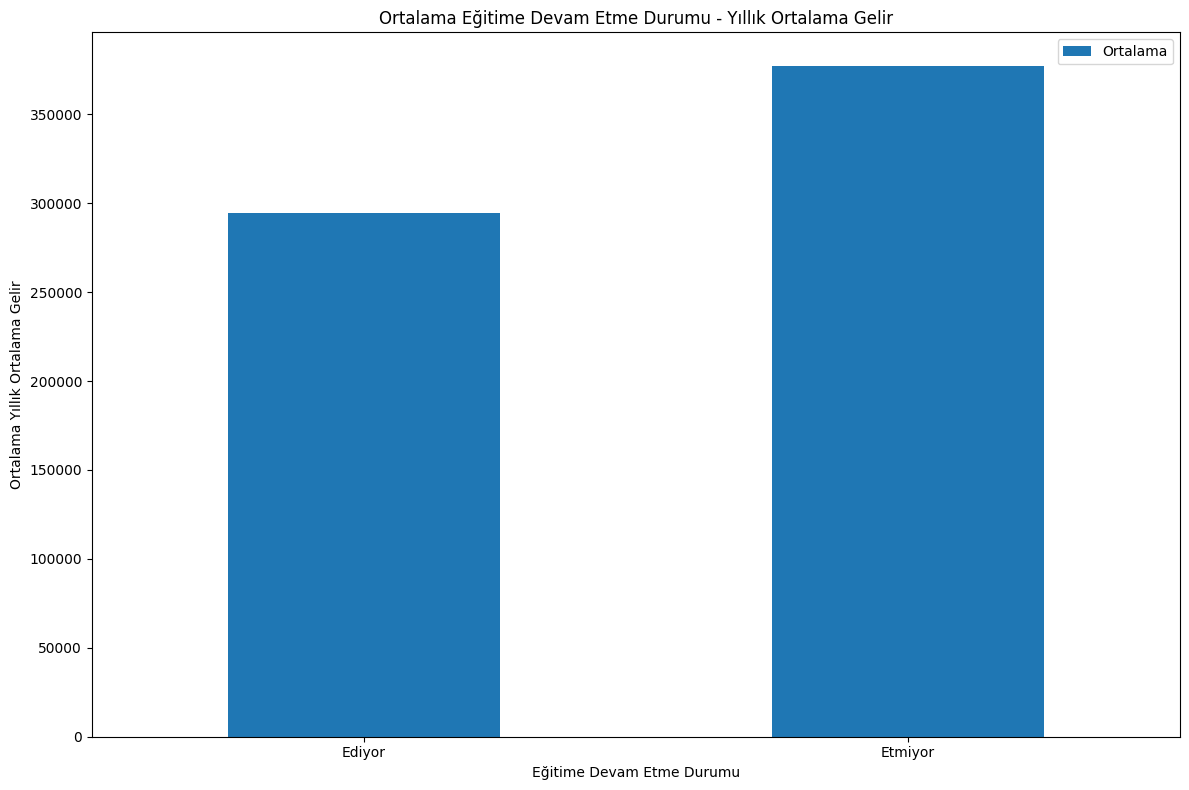

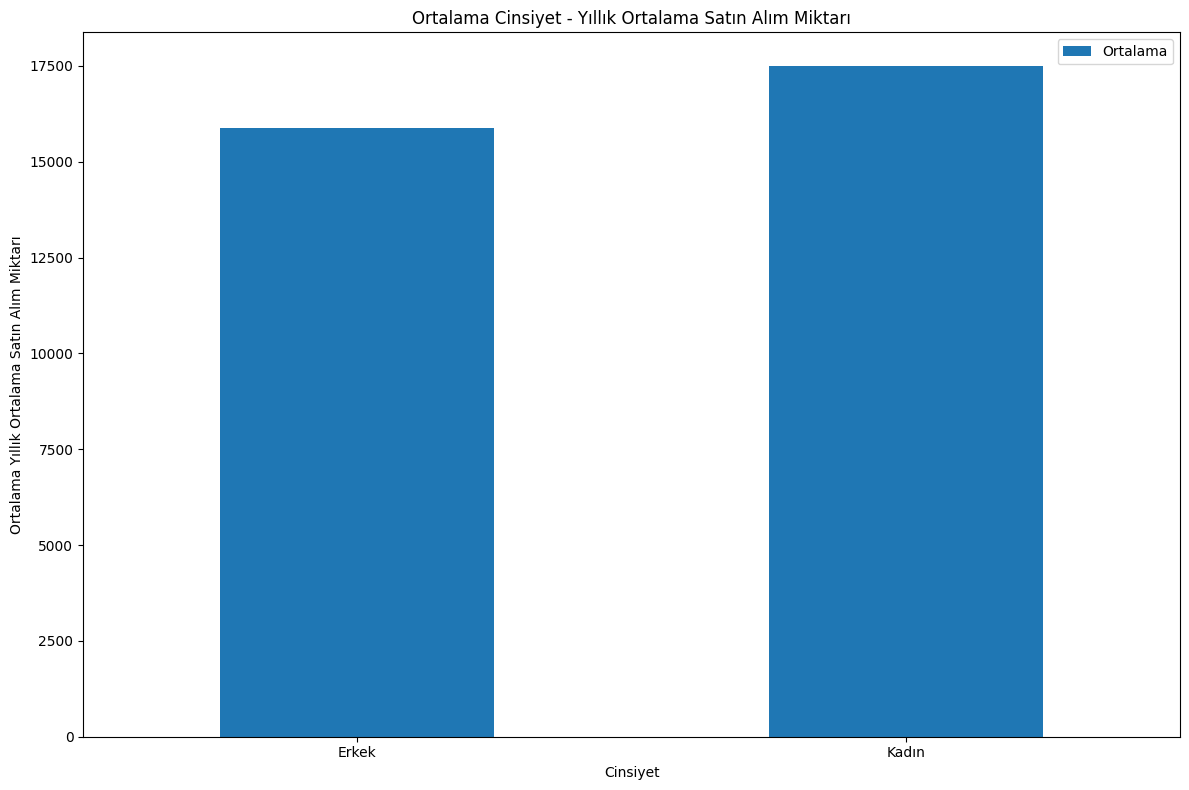

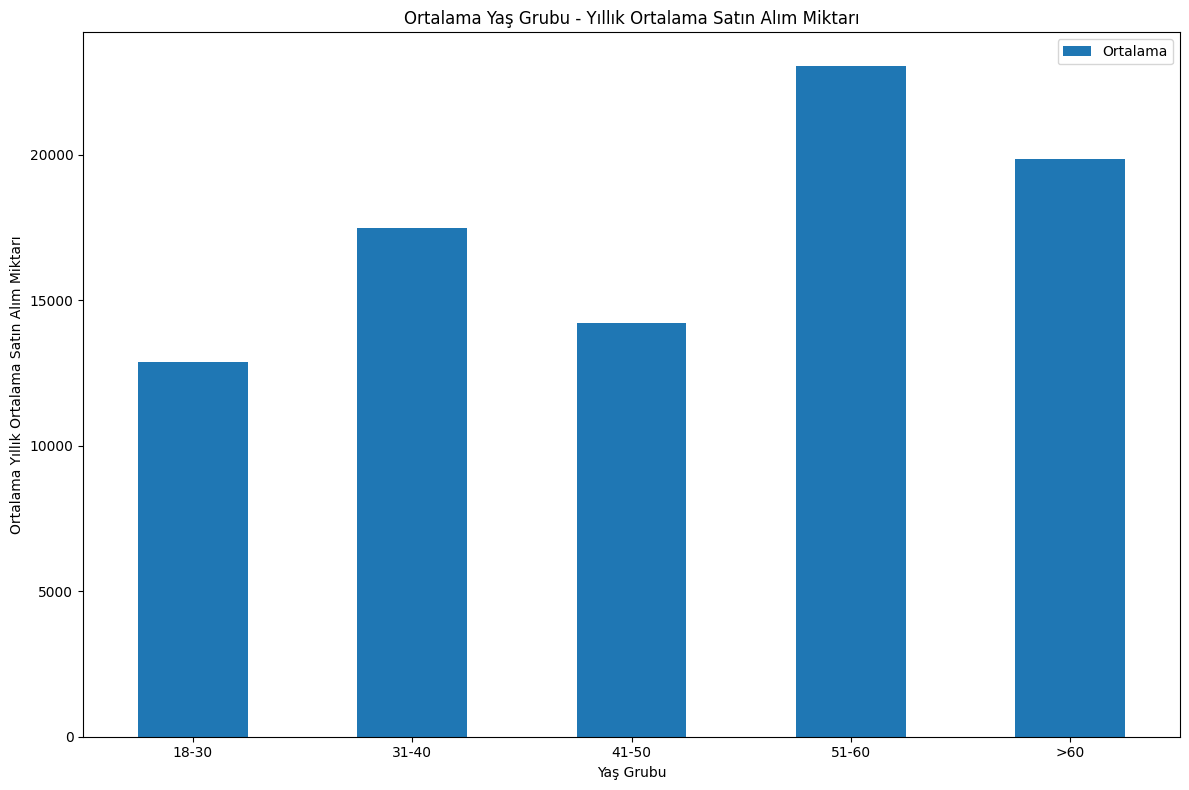

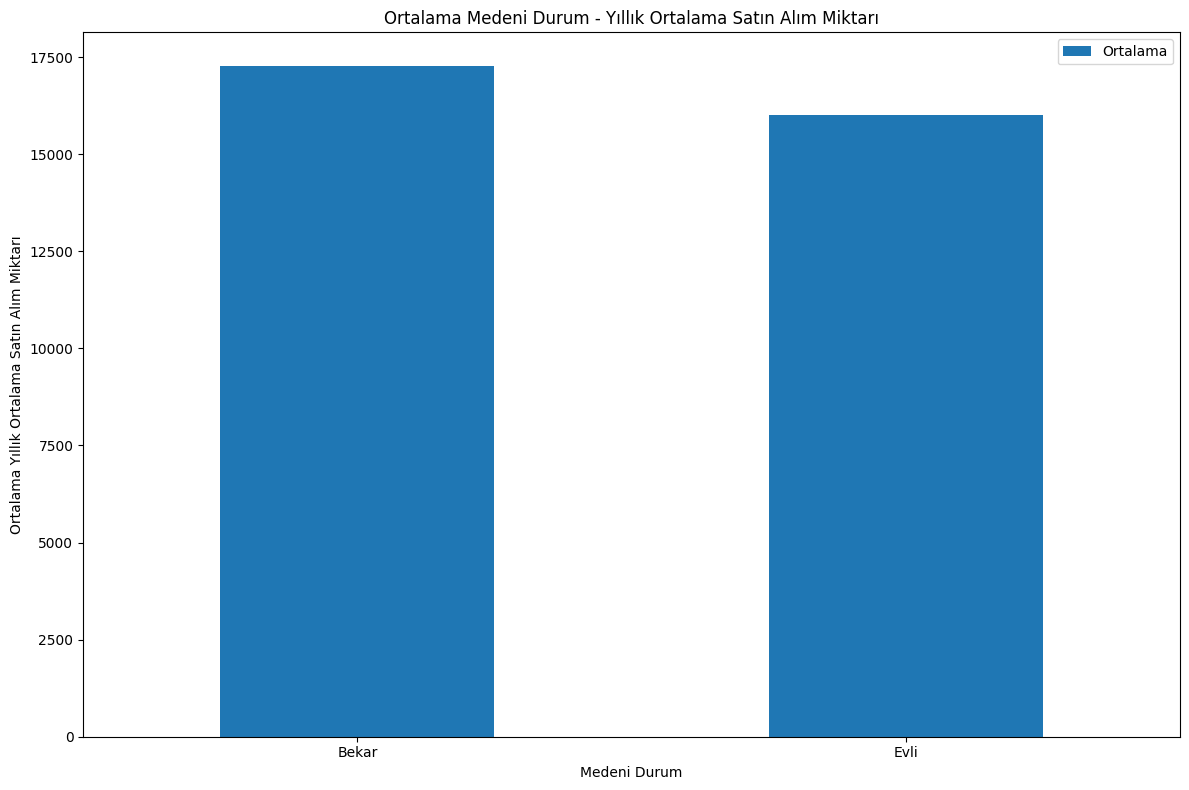

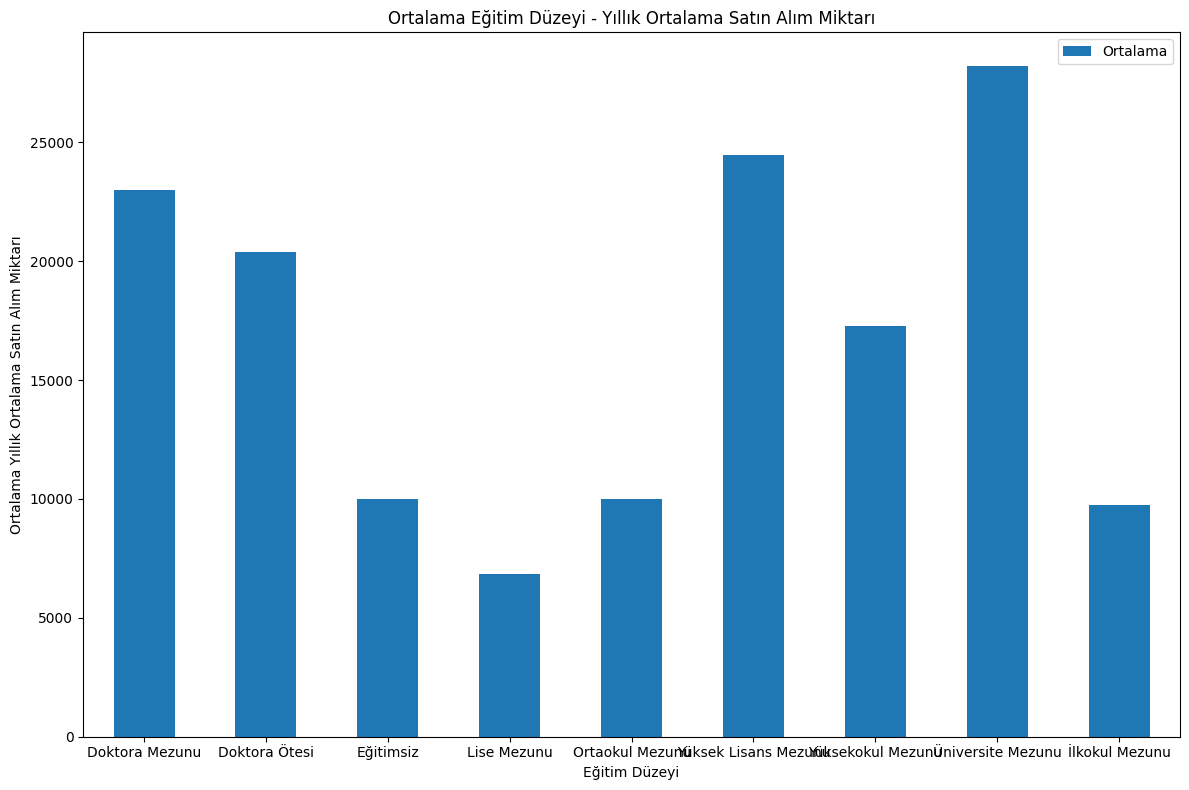

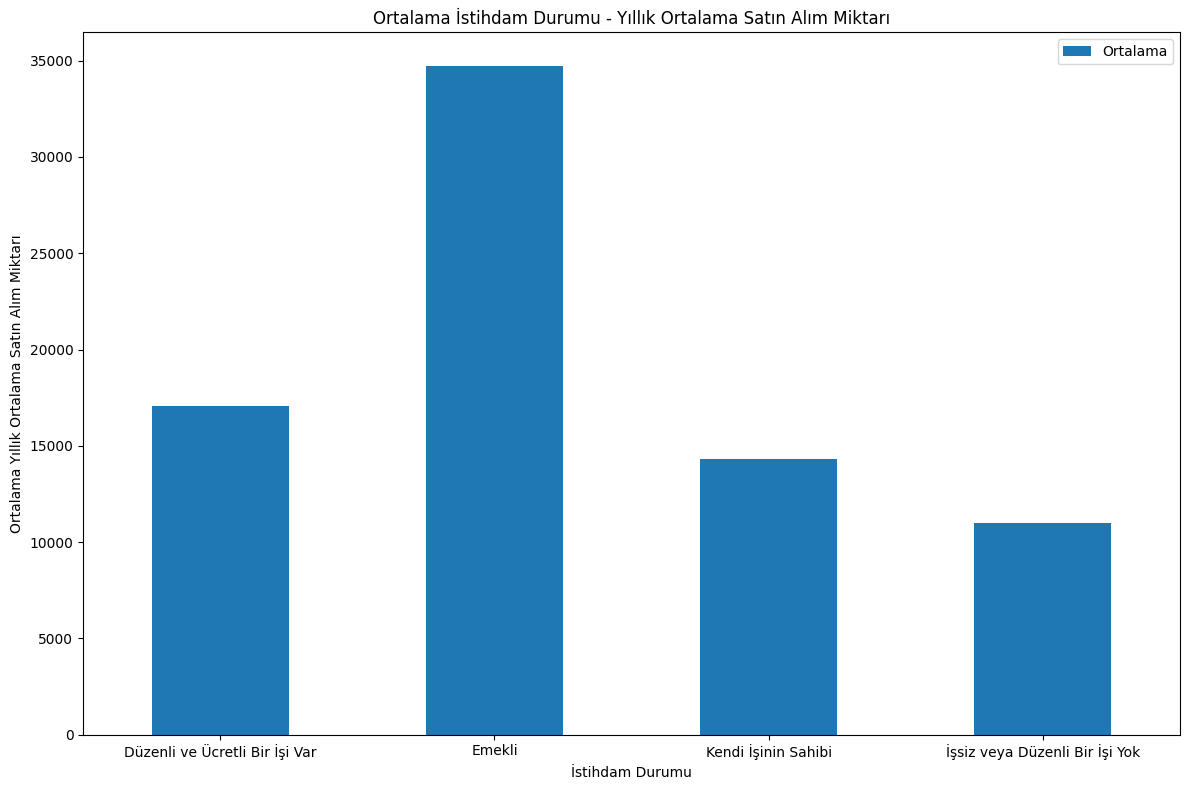

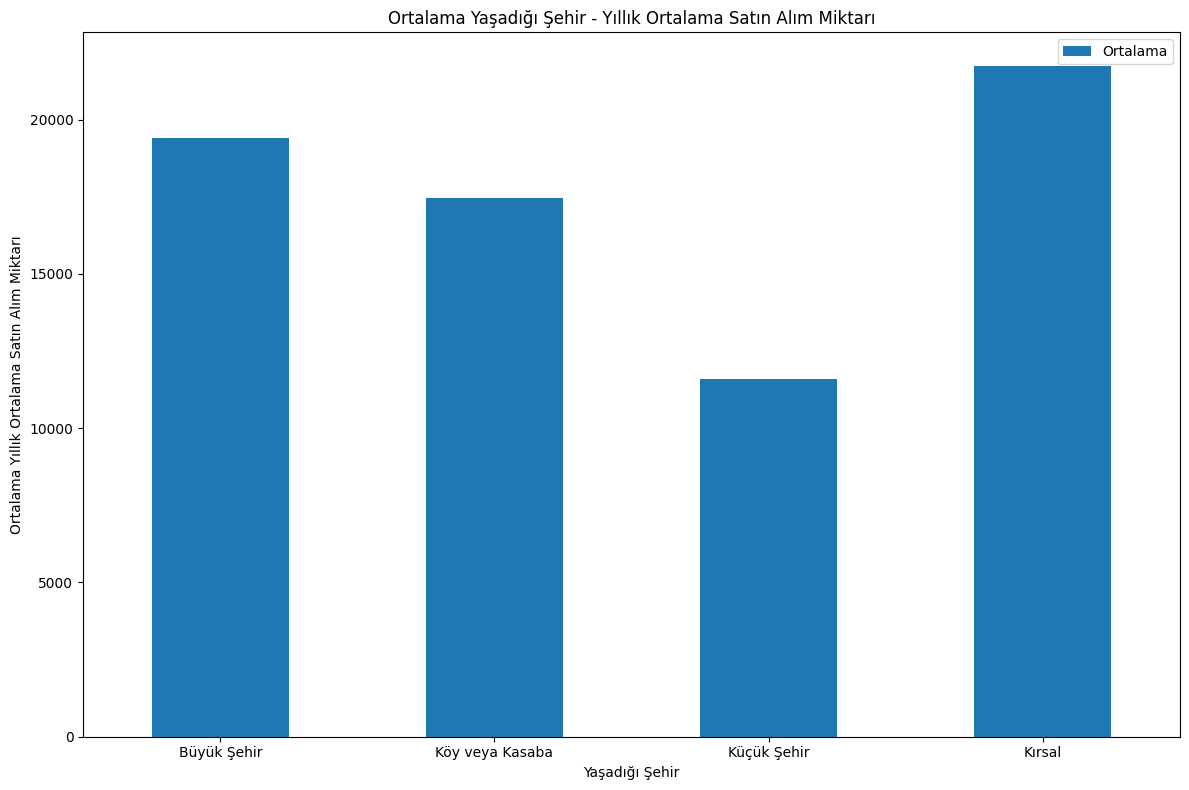

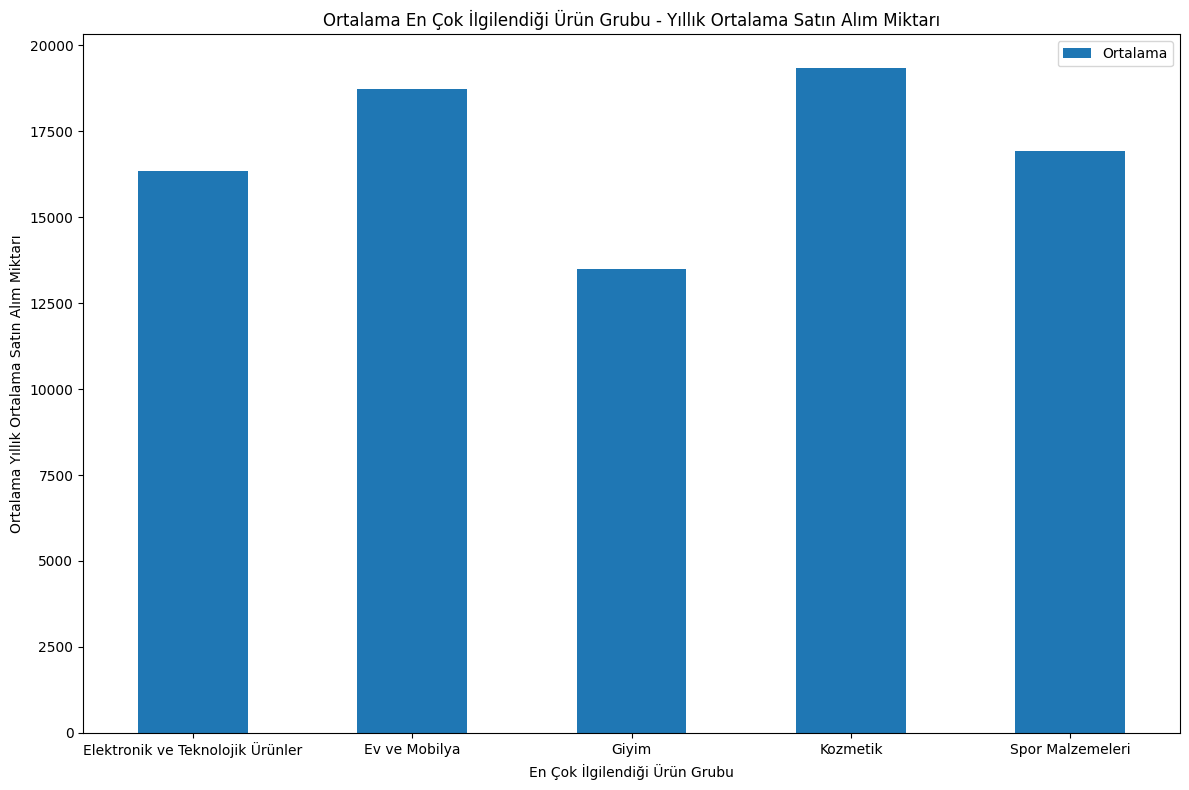

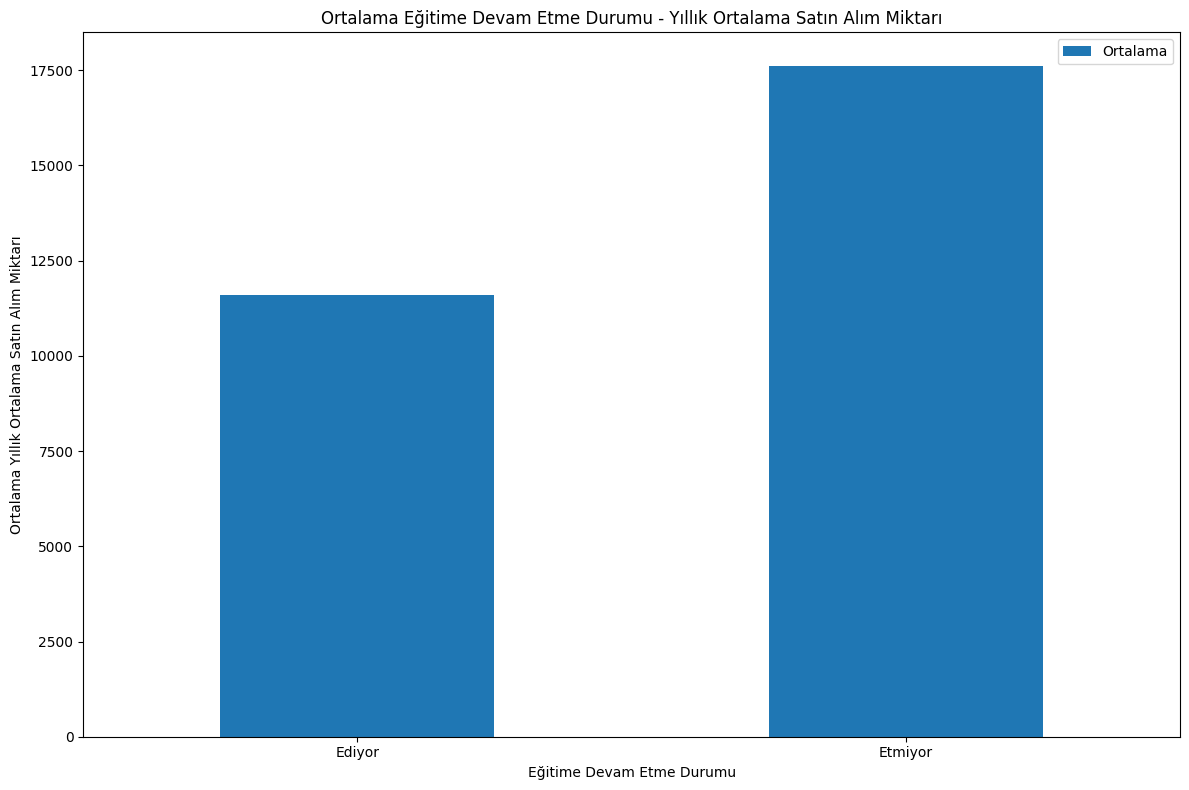

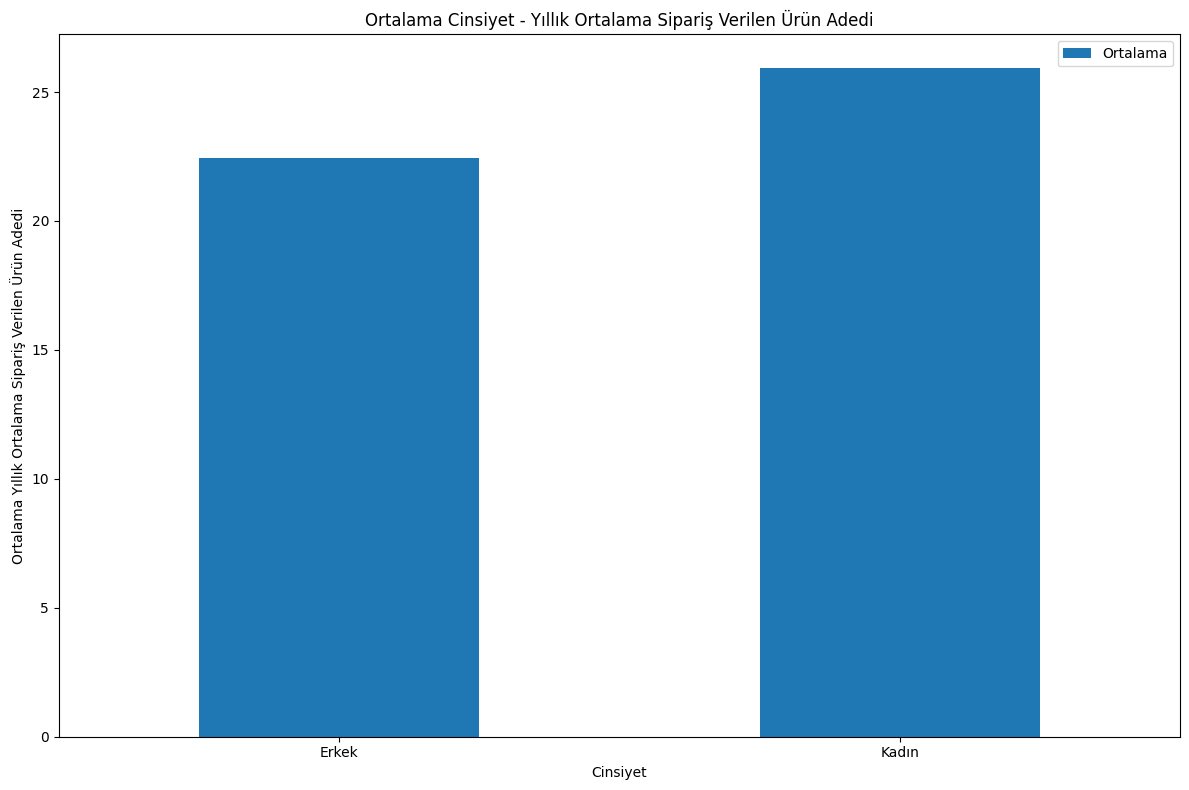

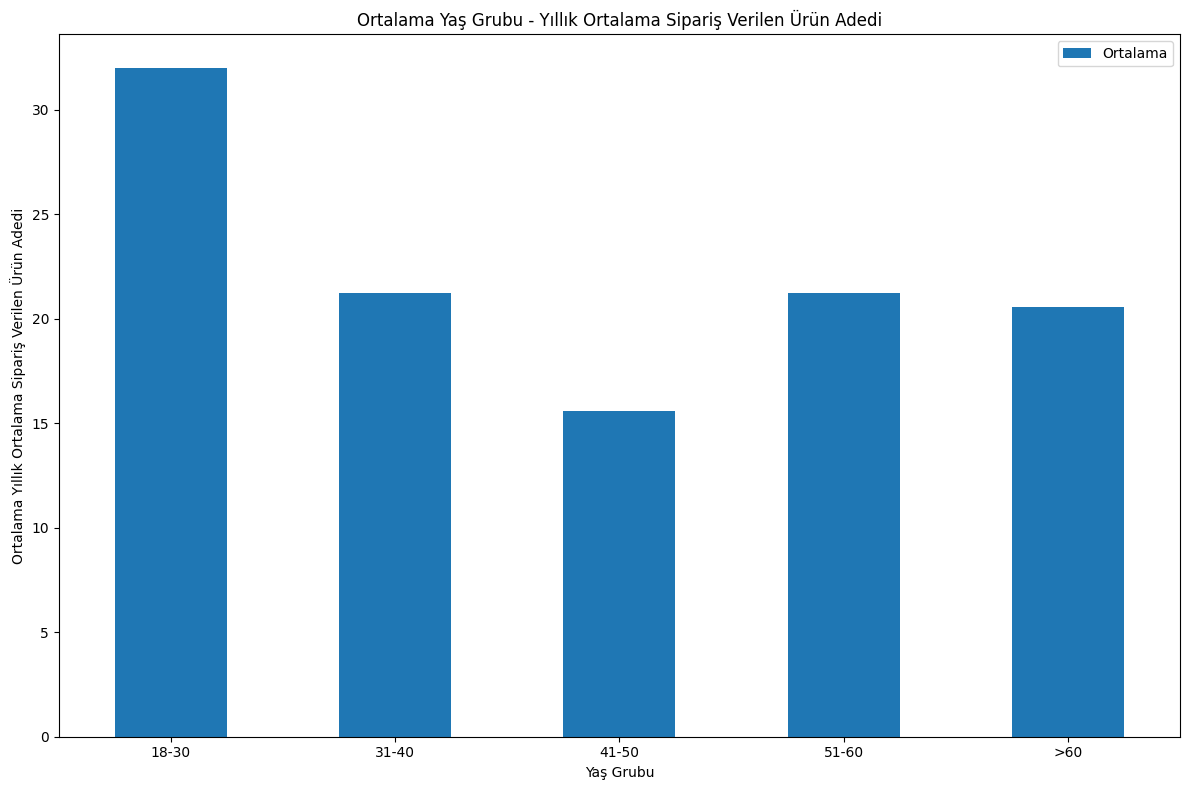

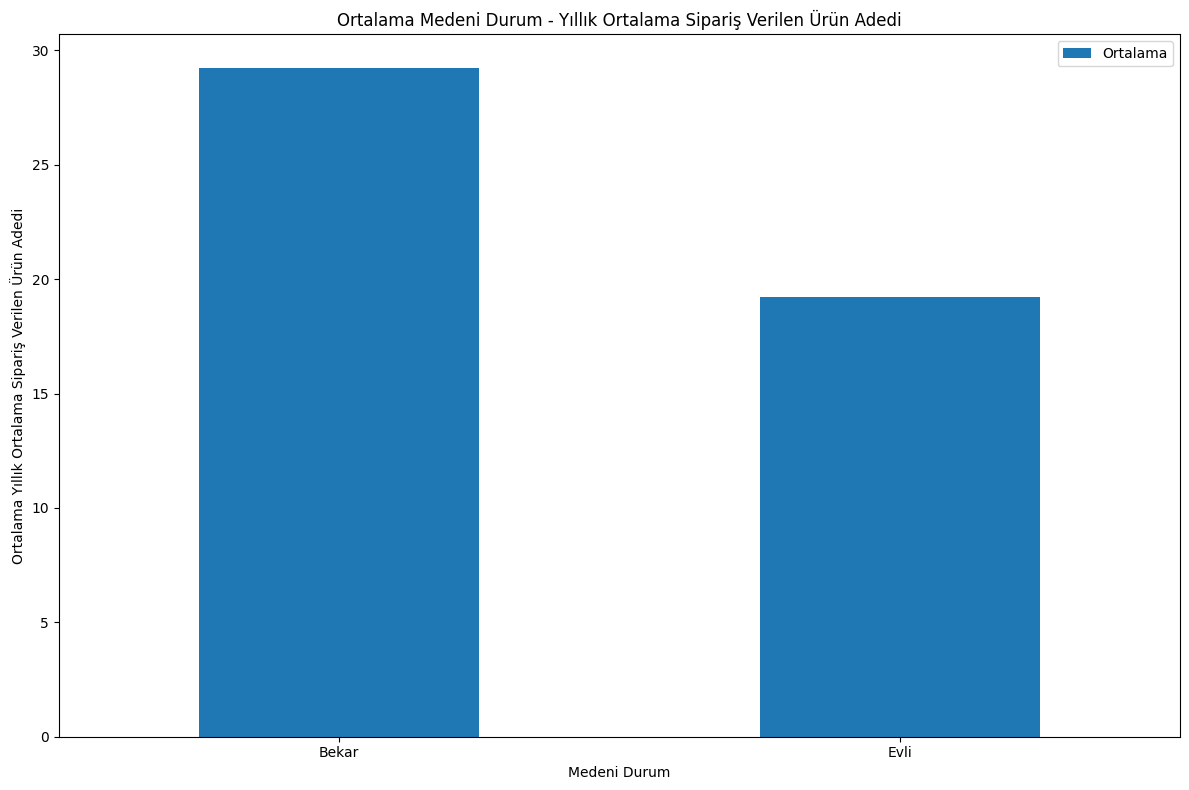

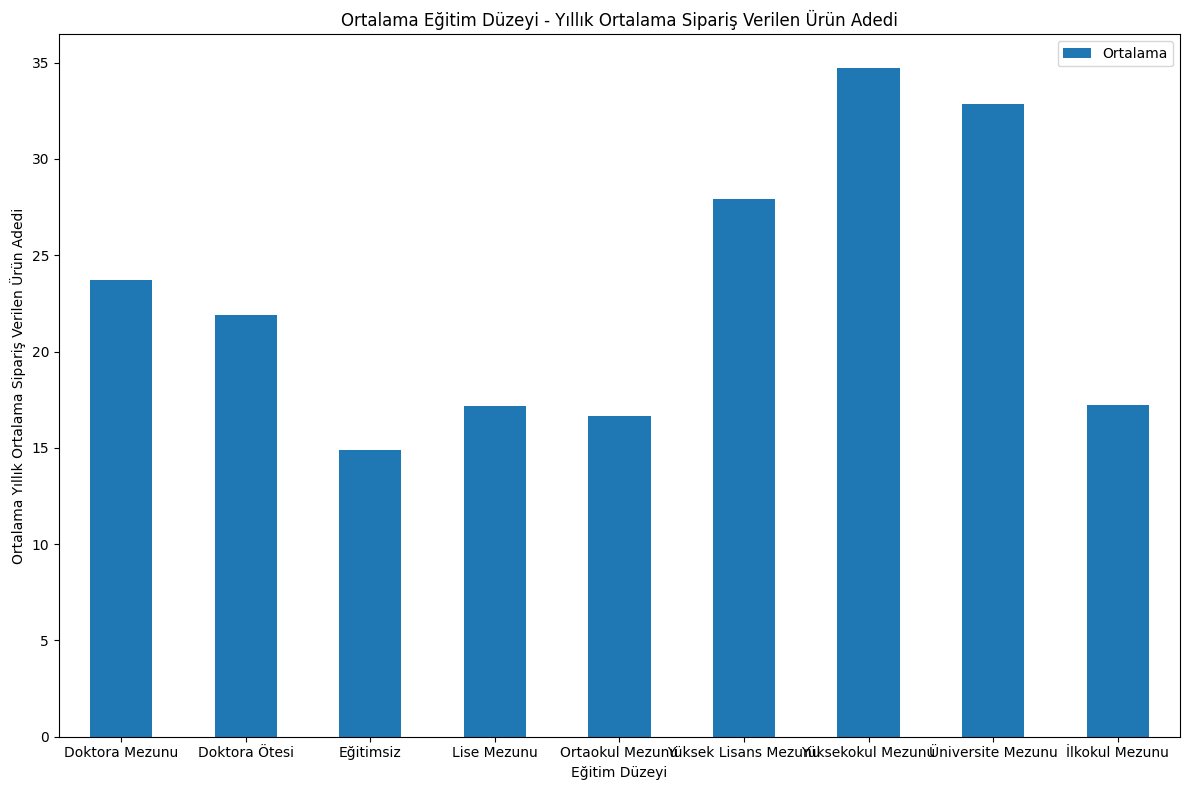

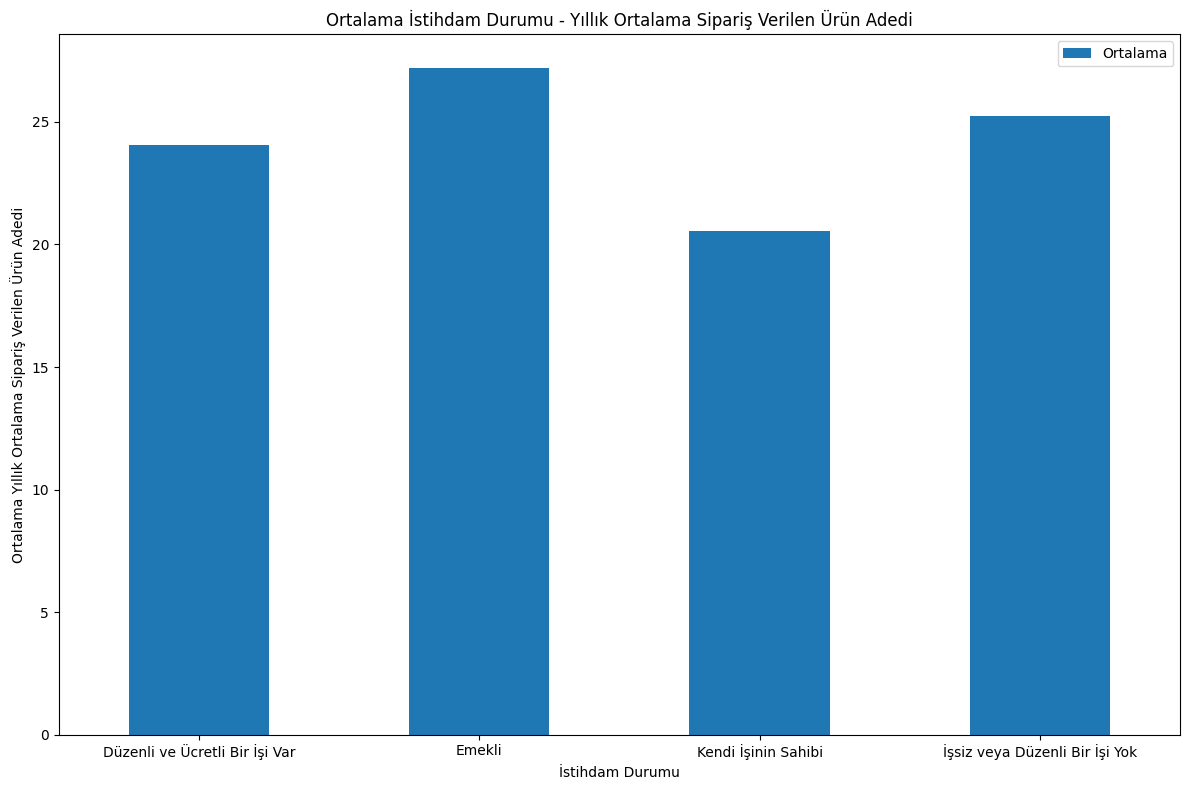

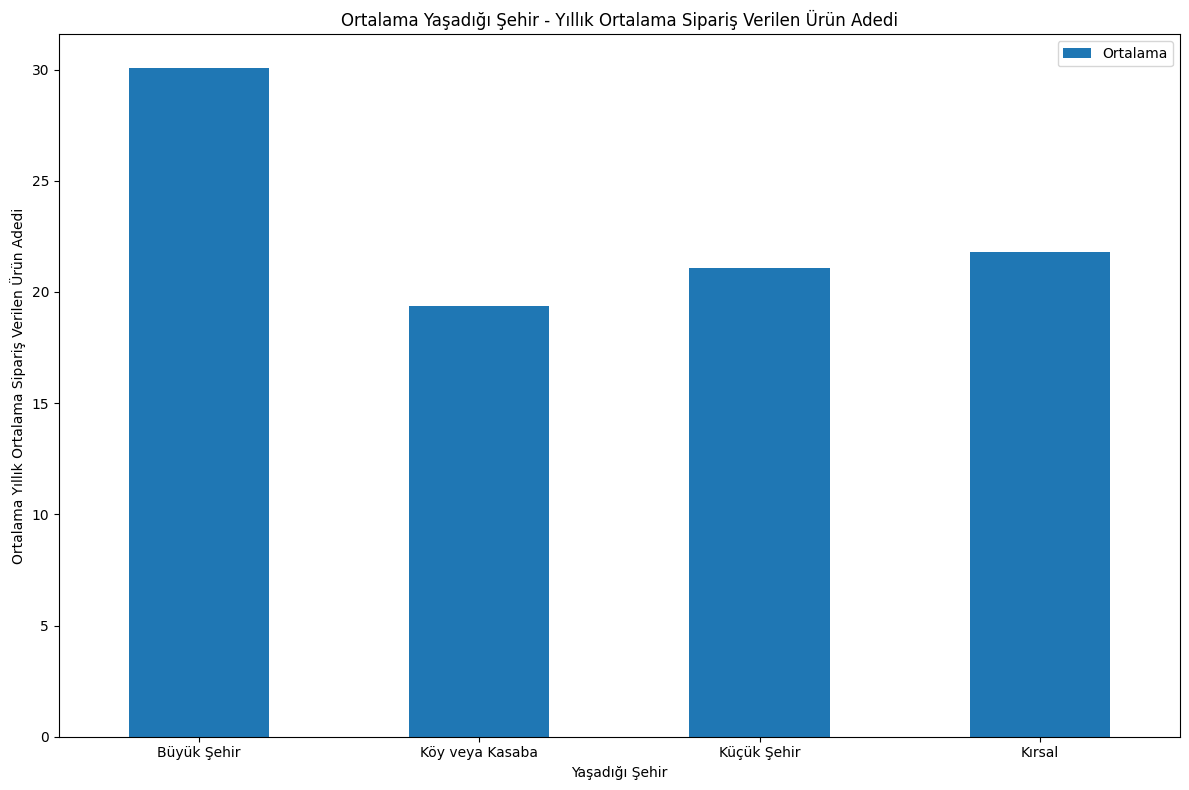

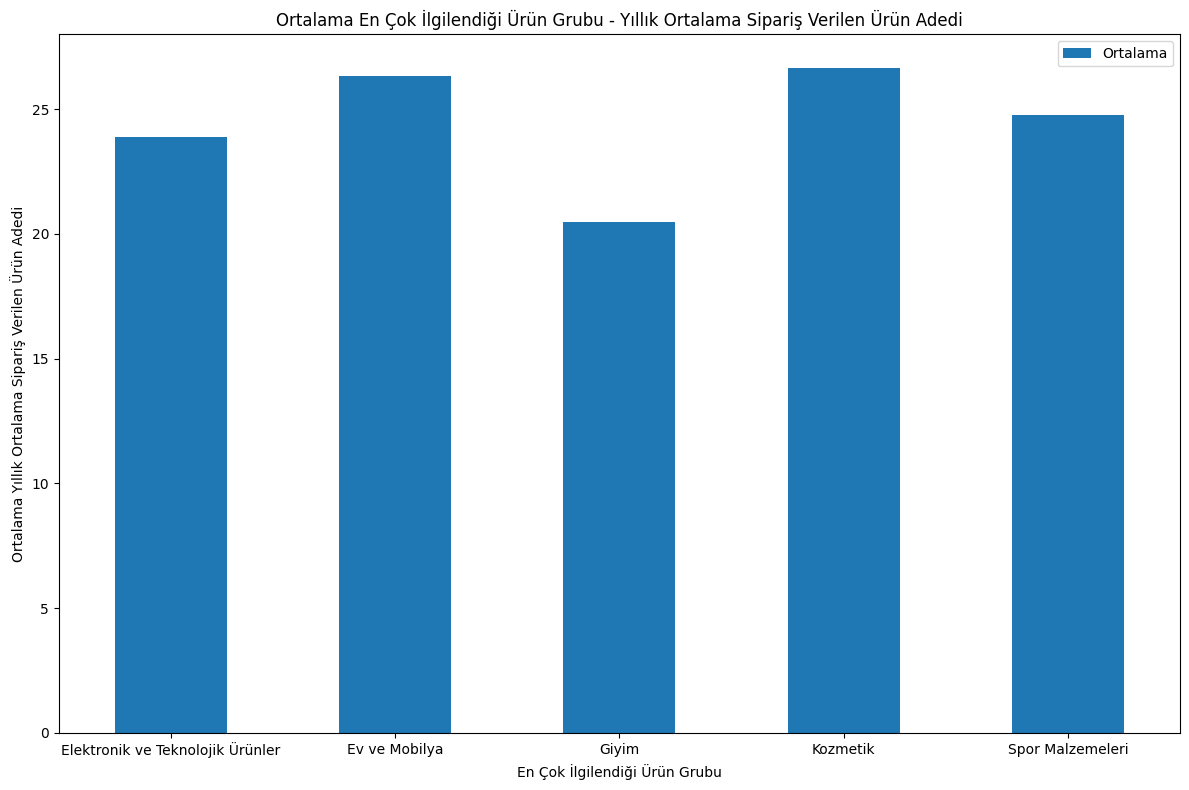

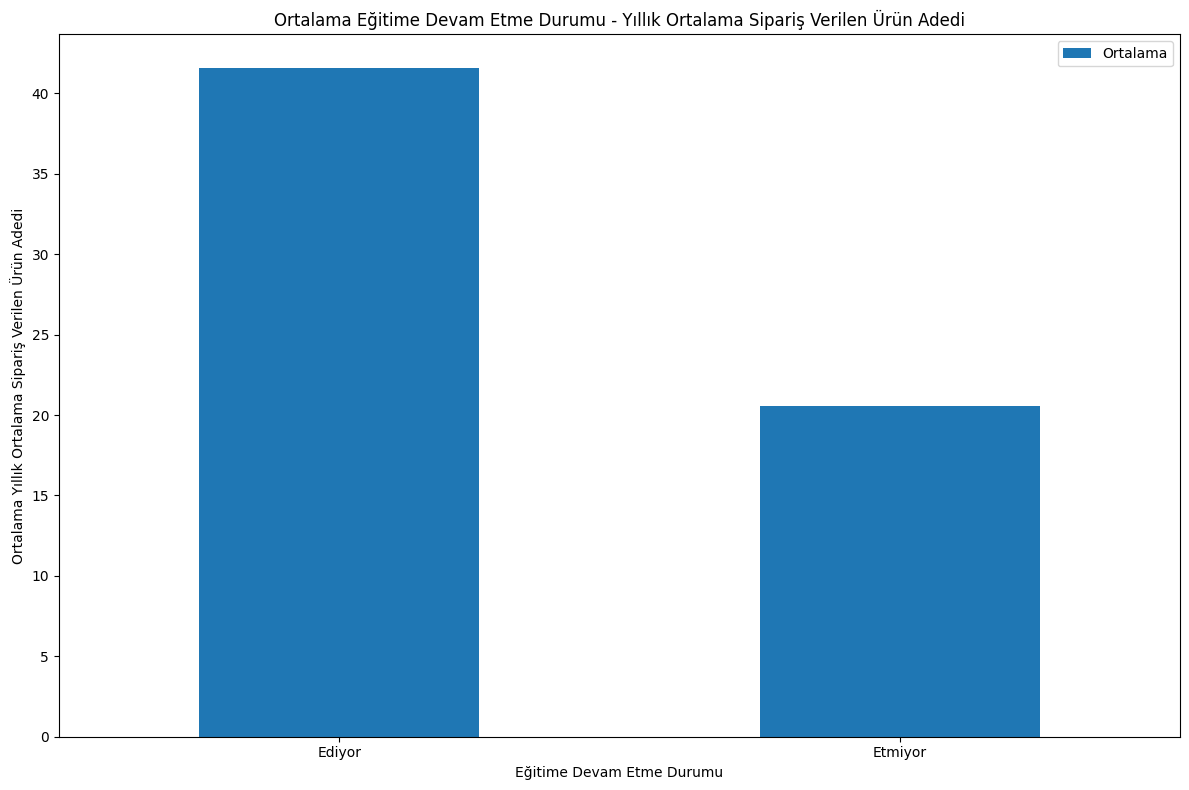

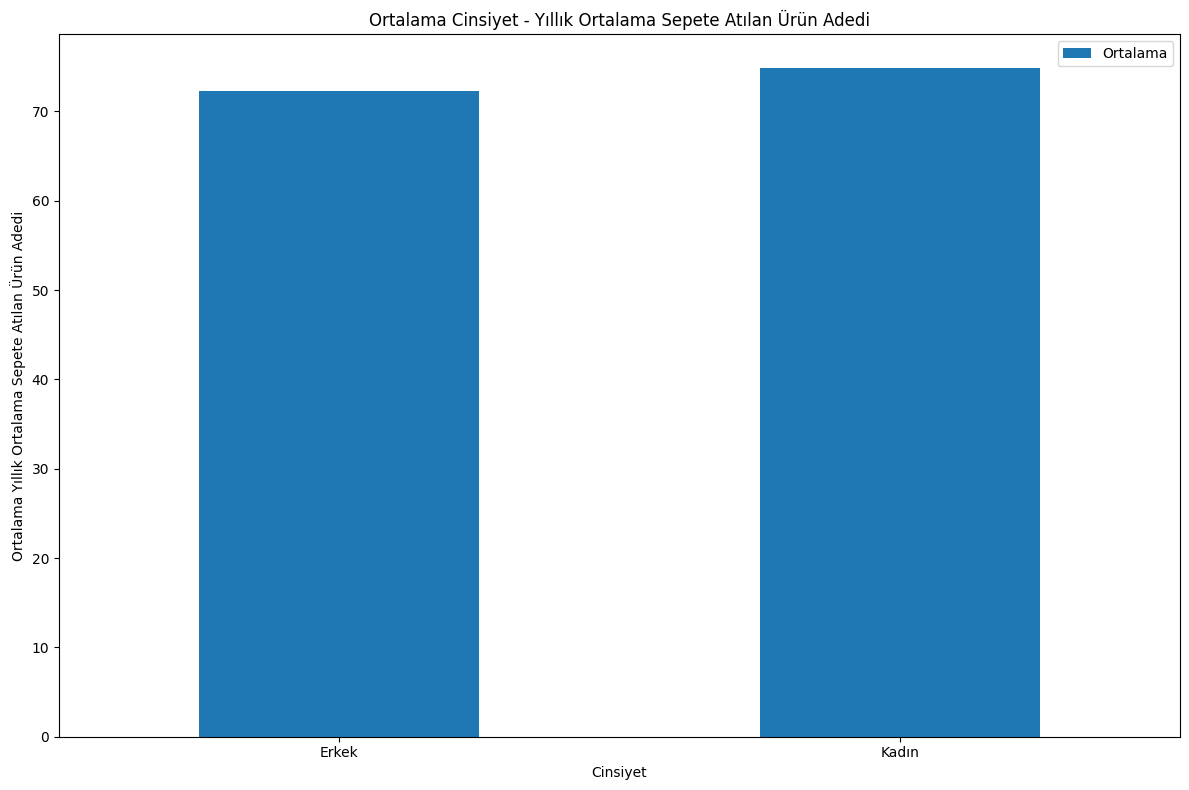

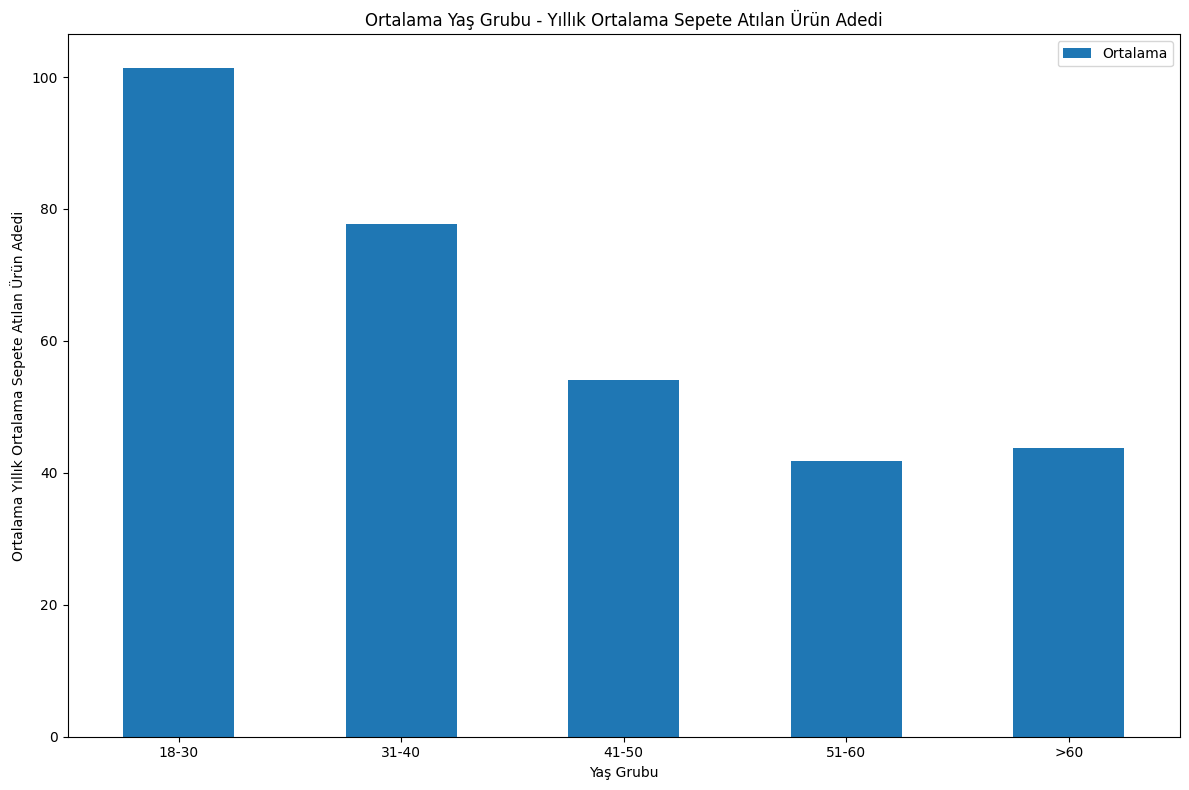

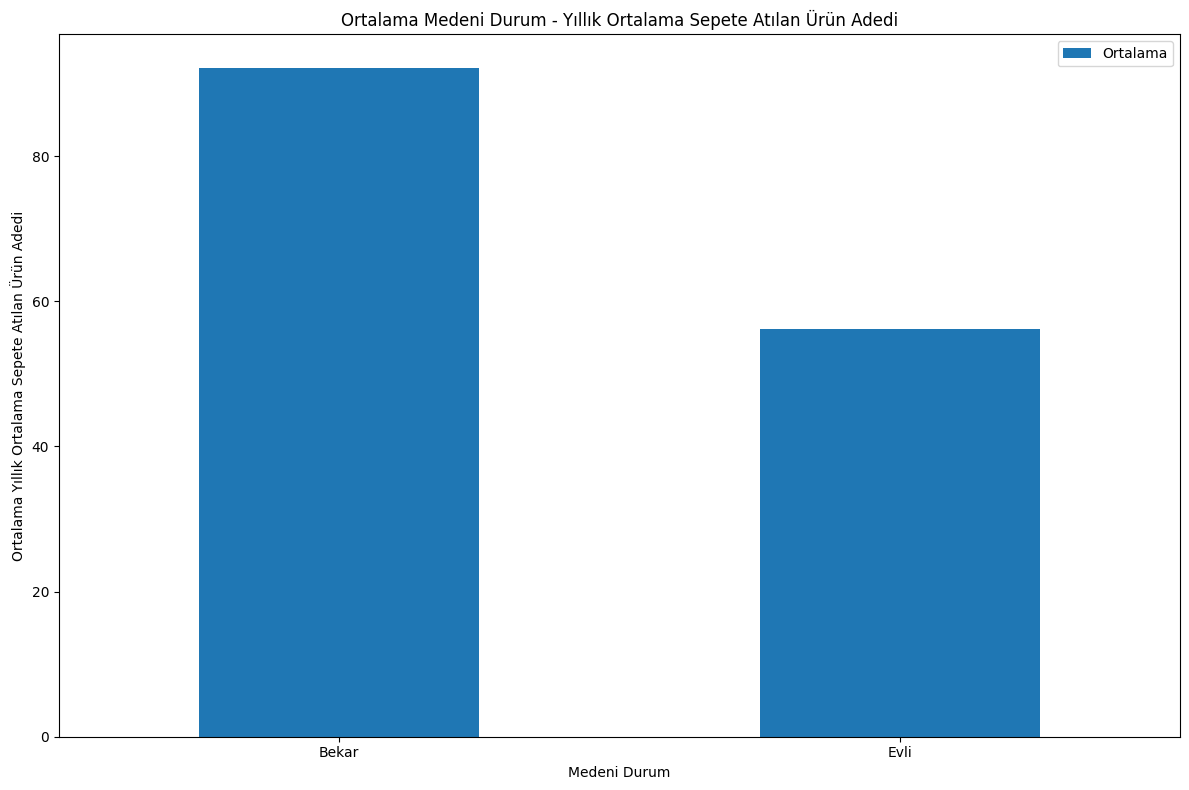

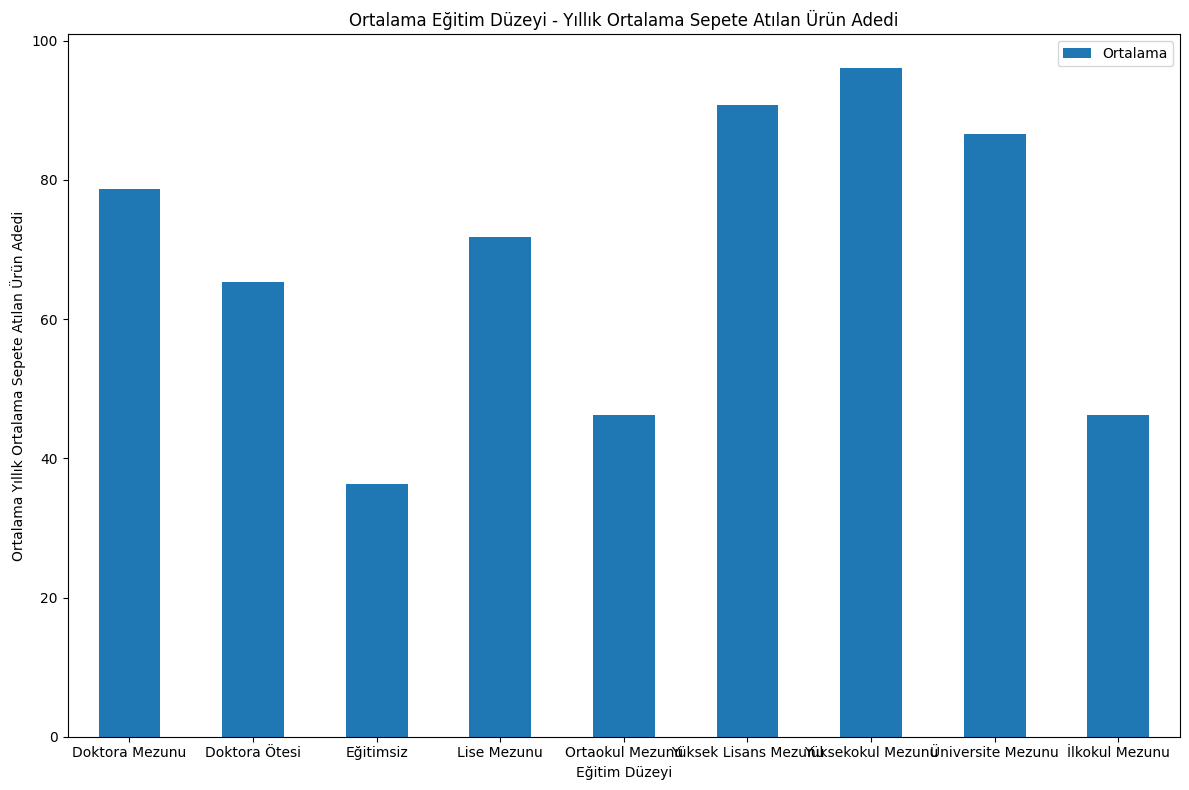

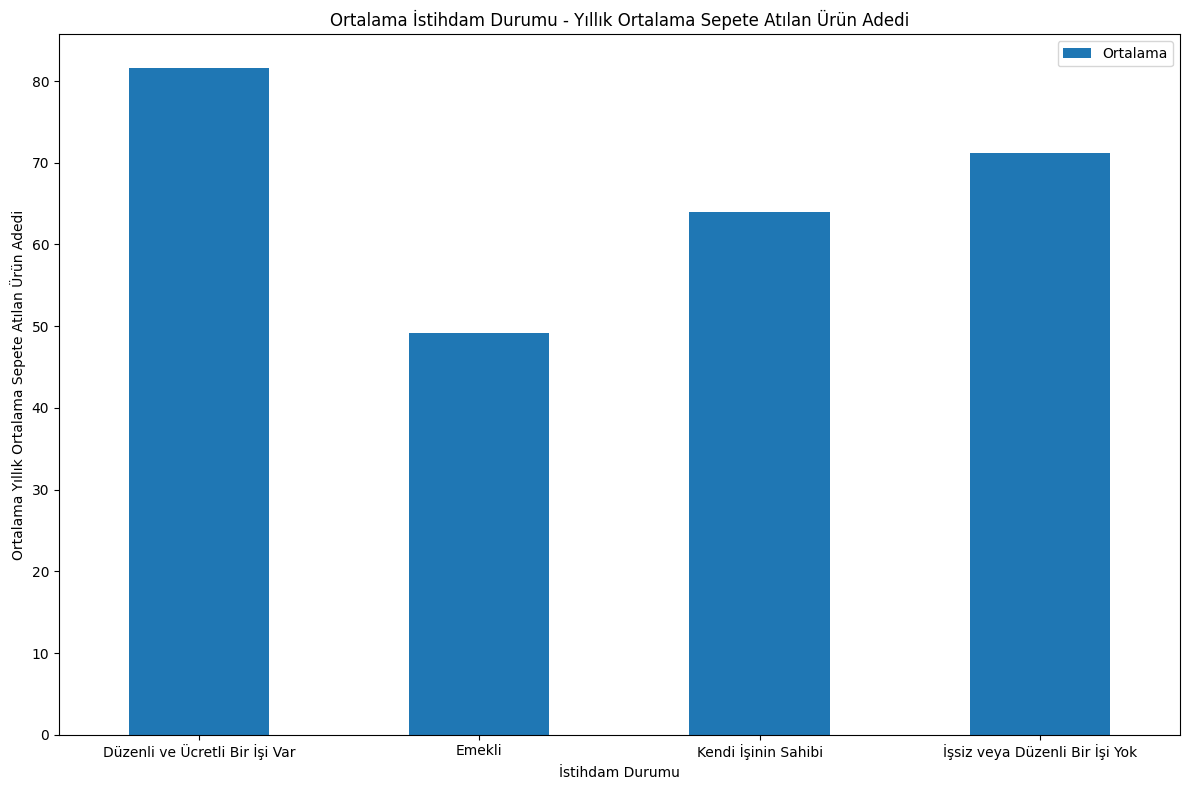

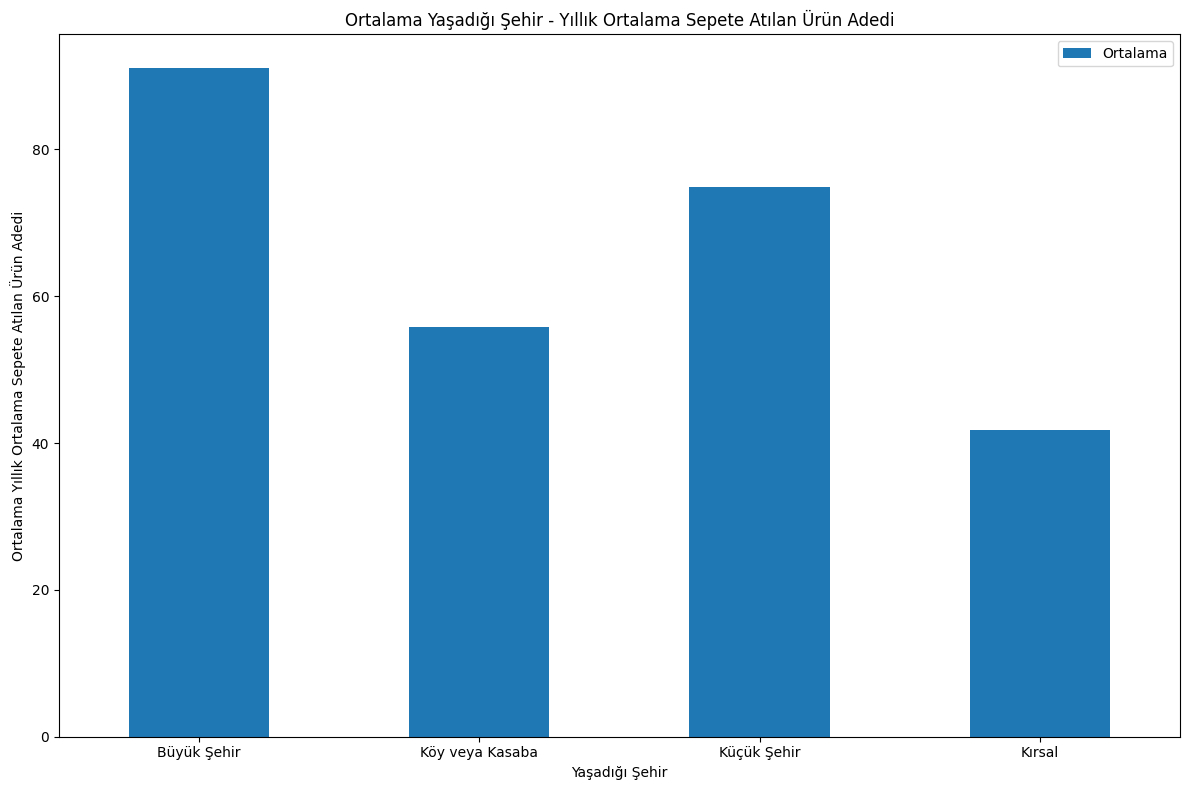

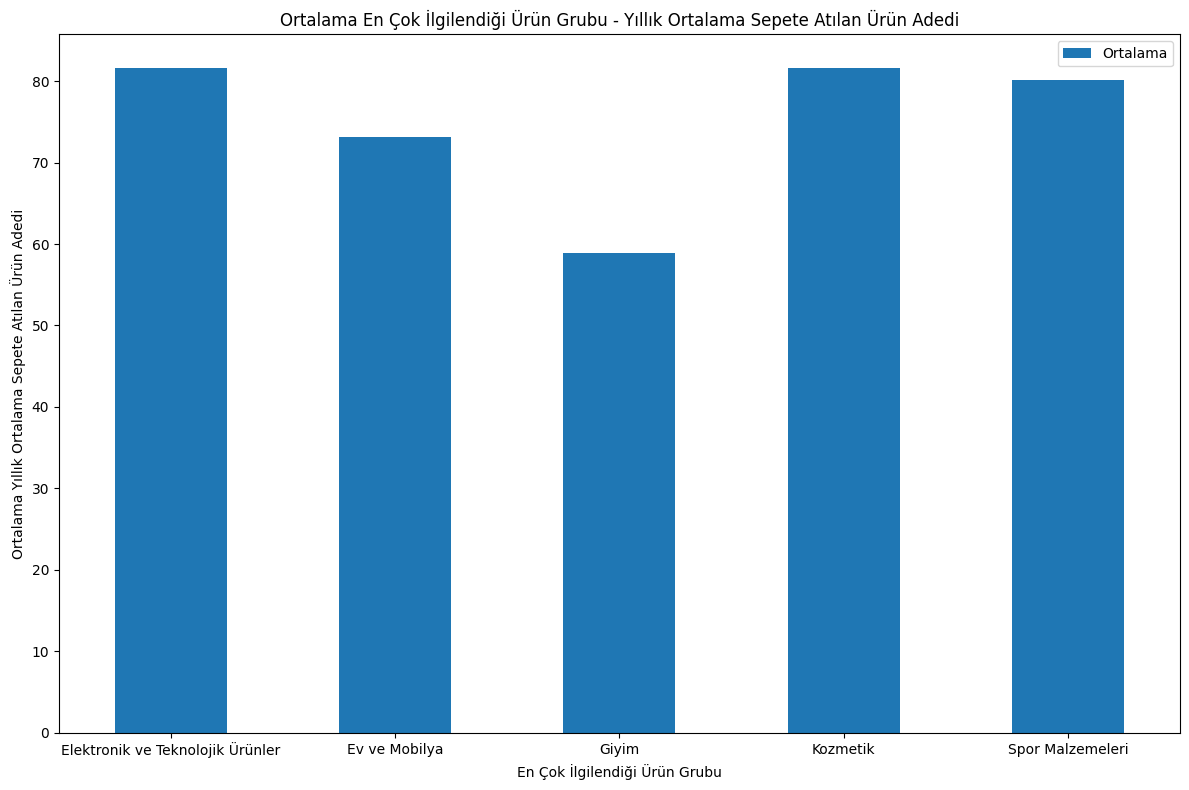

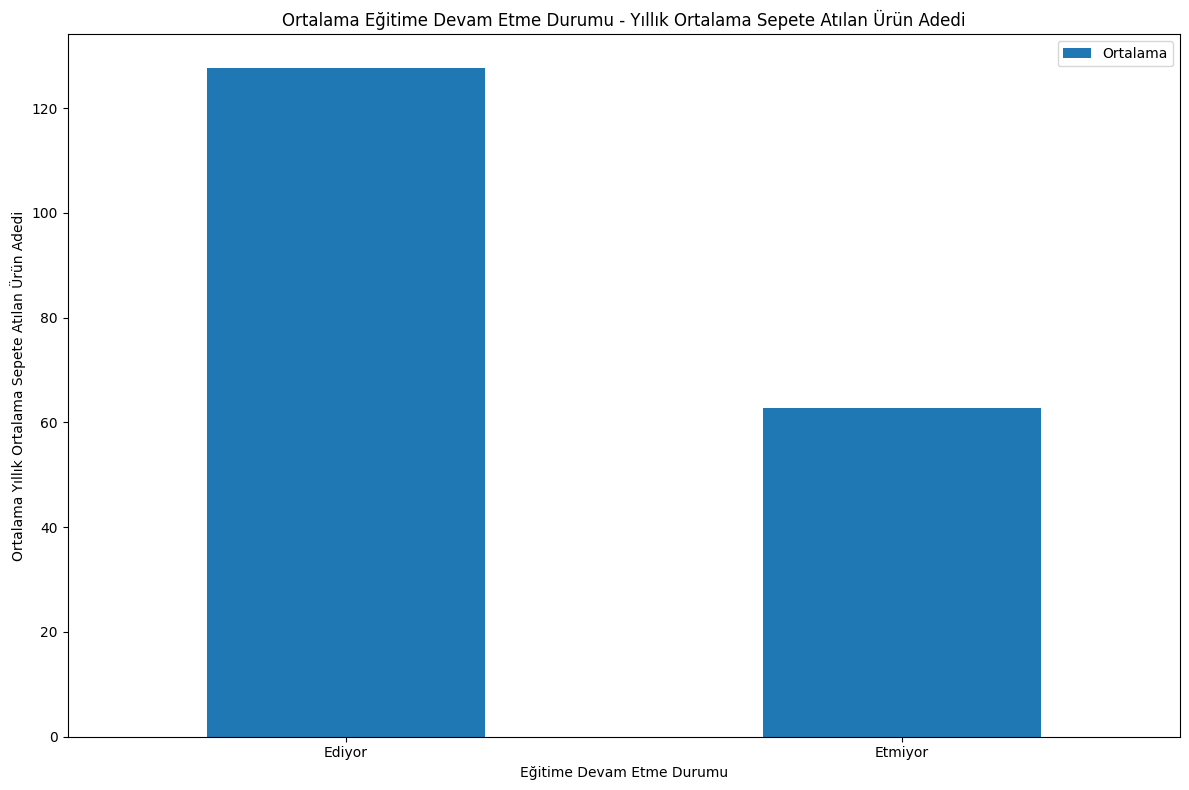

In [15]:

features = [
    "Yıllık Ortalama Gelir",
    "Yıllık Ortalama Satın Alım Miktarı",
    "Yıllık Ortalama Sipariş Verilen Ürün Adedi",
    "Yıllık Ortalama Sepete Atılan Ürün Adedi"
]
# Loop through each feature and class
for feature in features:
    for sinif_x in testclass:
        plt.figure(figsize=(12, 8))

        # Calculate class-wise means
        class_means = train_data.groupby(sinif_x)[feature].mean()

        # Create a bar plot for the class means
        ax = class_means.plot(kind='bar', color='tab:blue', label='Ortalama')

        # Customize plot labels and title
        plt.title(f"Ortalama {sinif_x} - {feature}")
        plt.xlabel(sinif_x)
        plt.ylabel("Ortalama " + feature)
        plt.xticks(rotation=0)
        plt.legend()
        plt.tight_layout()

plt.show()

<ipython-input-22-b2f73d7ae600>:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


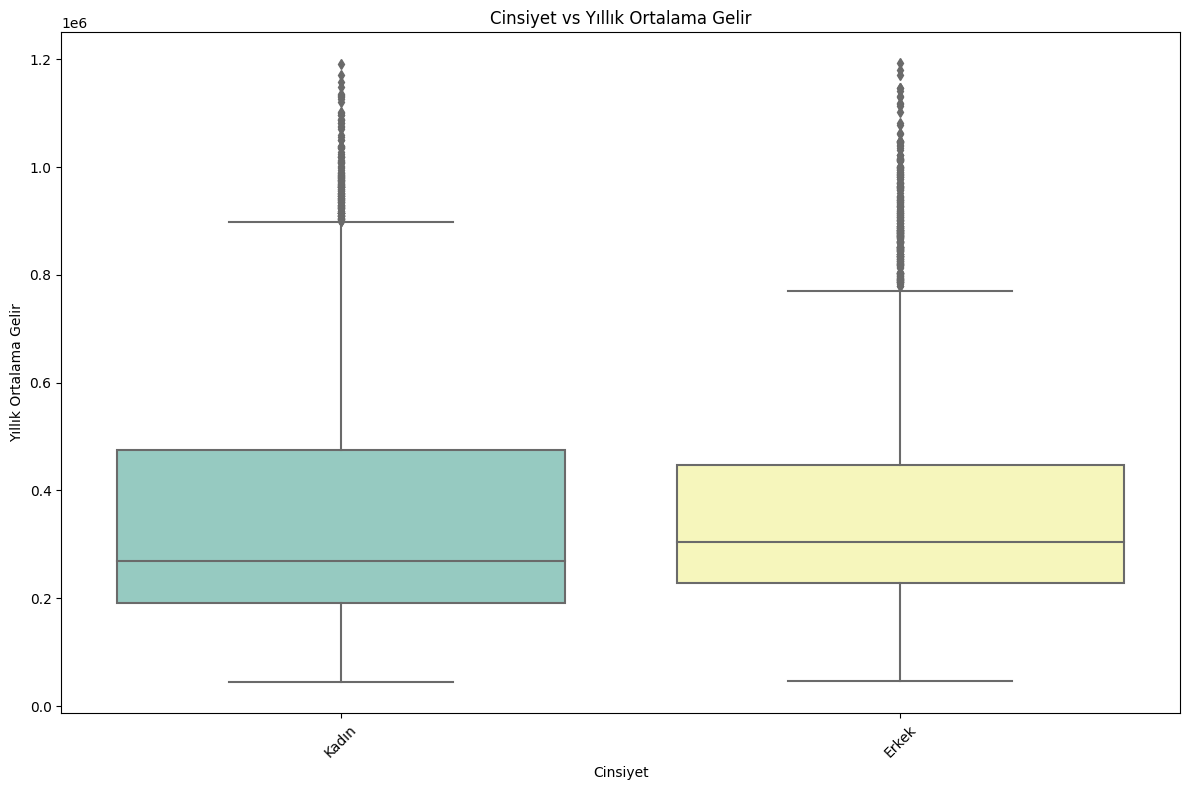

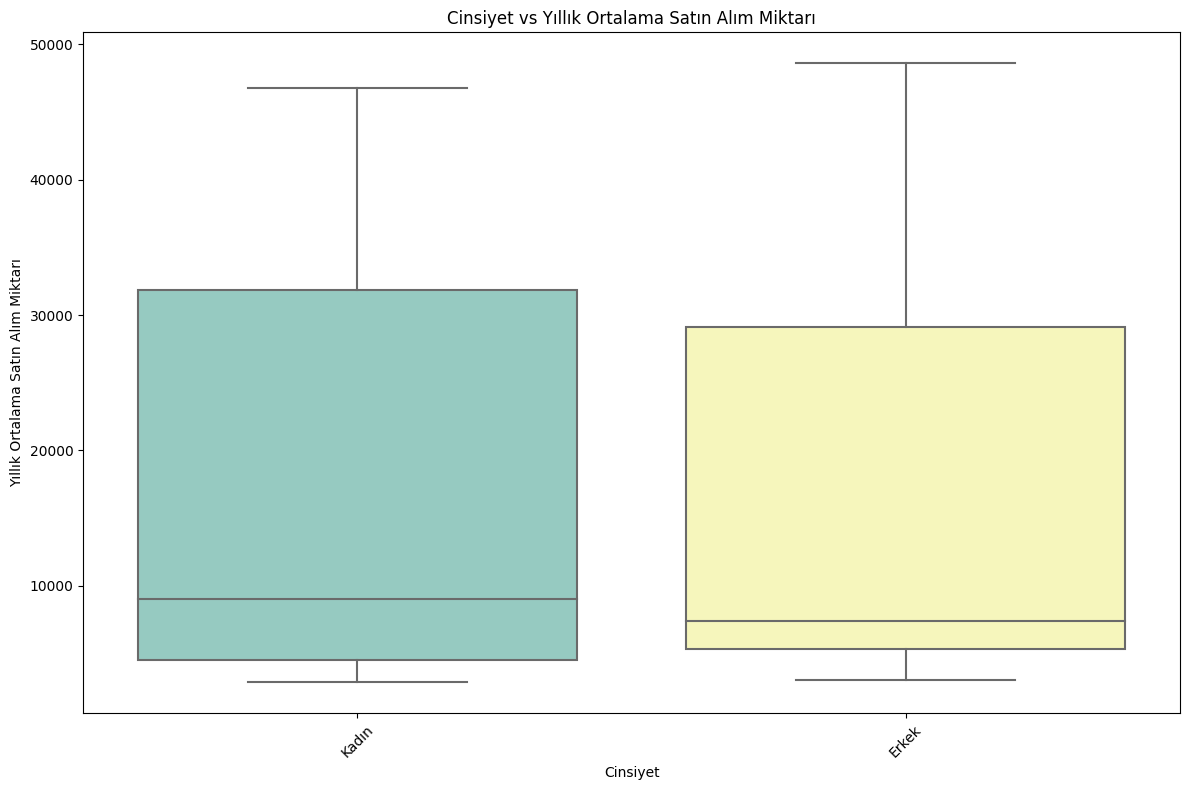

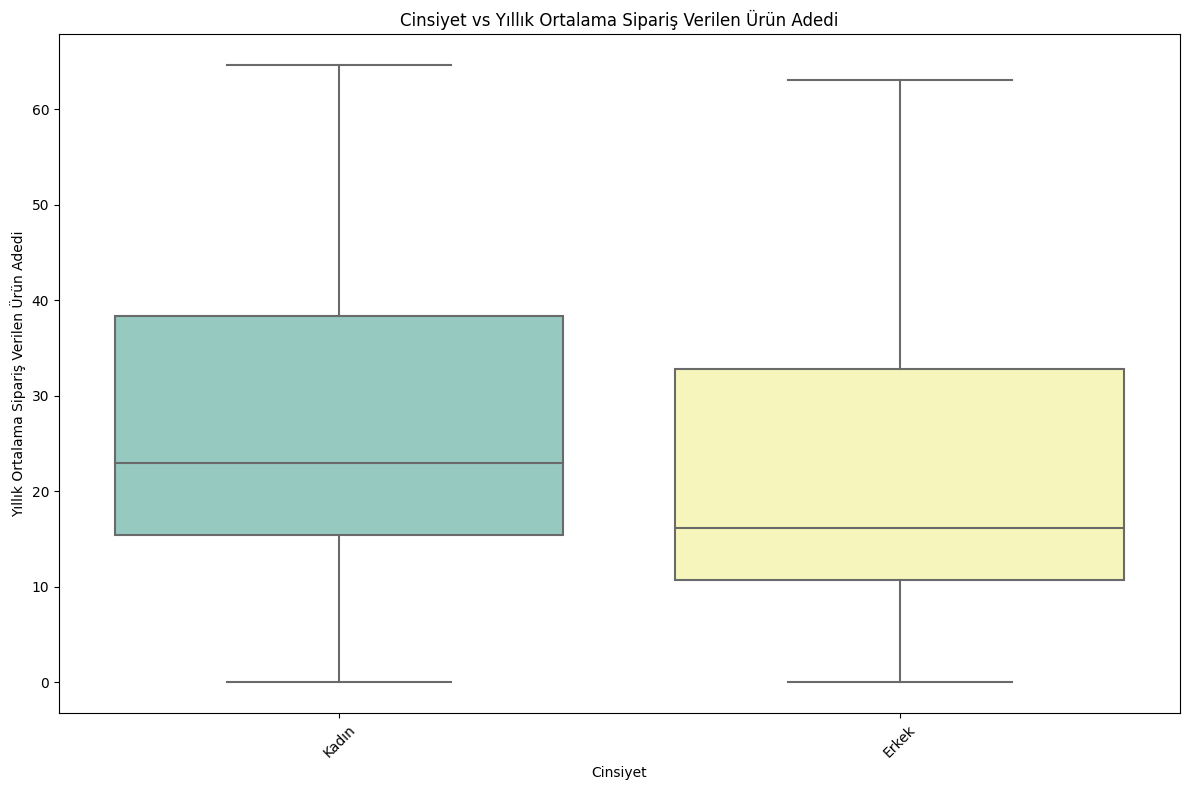

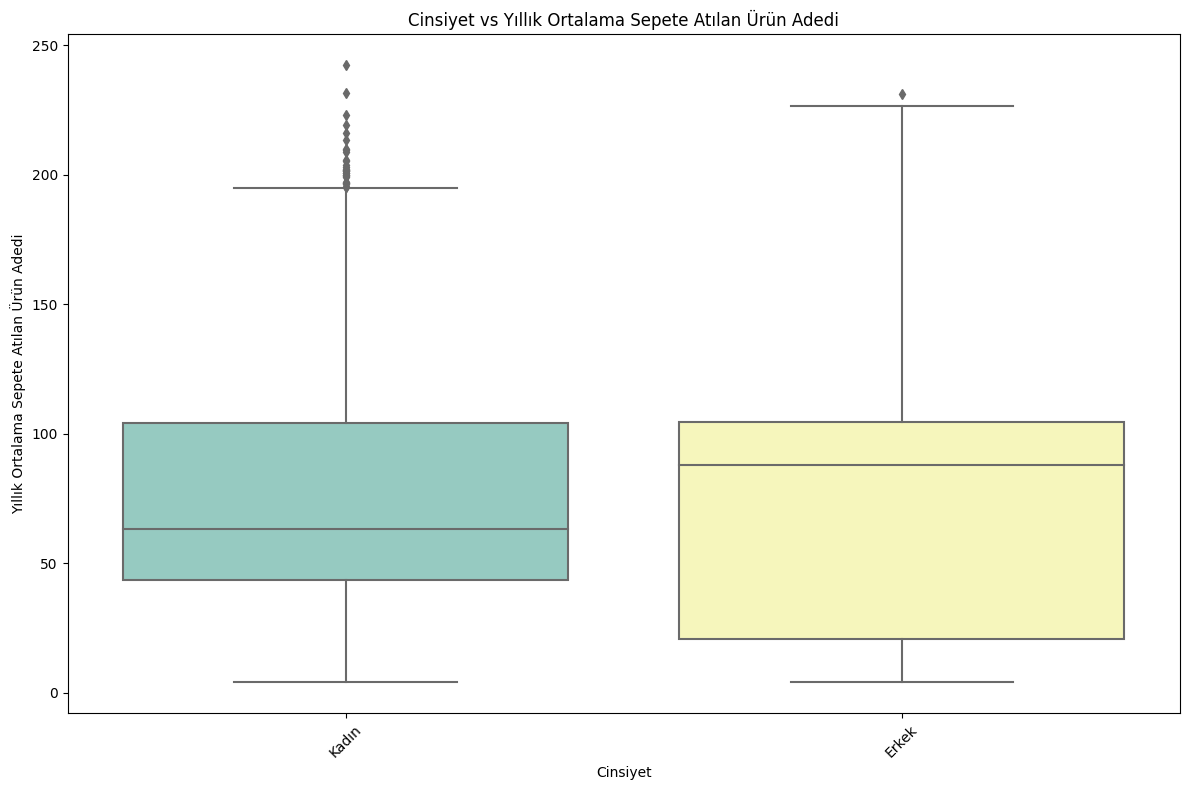

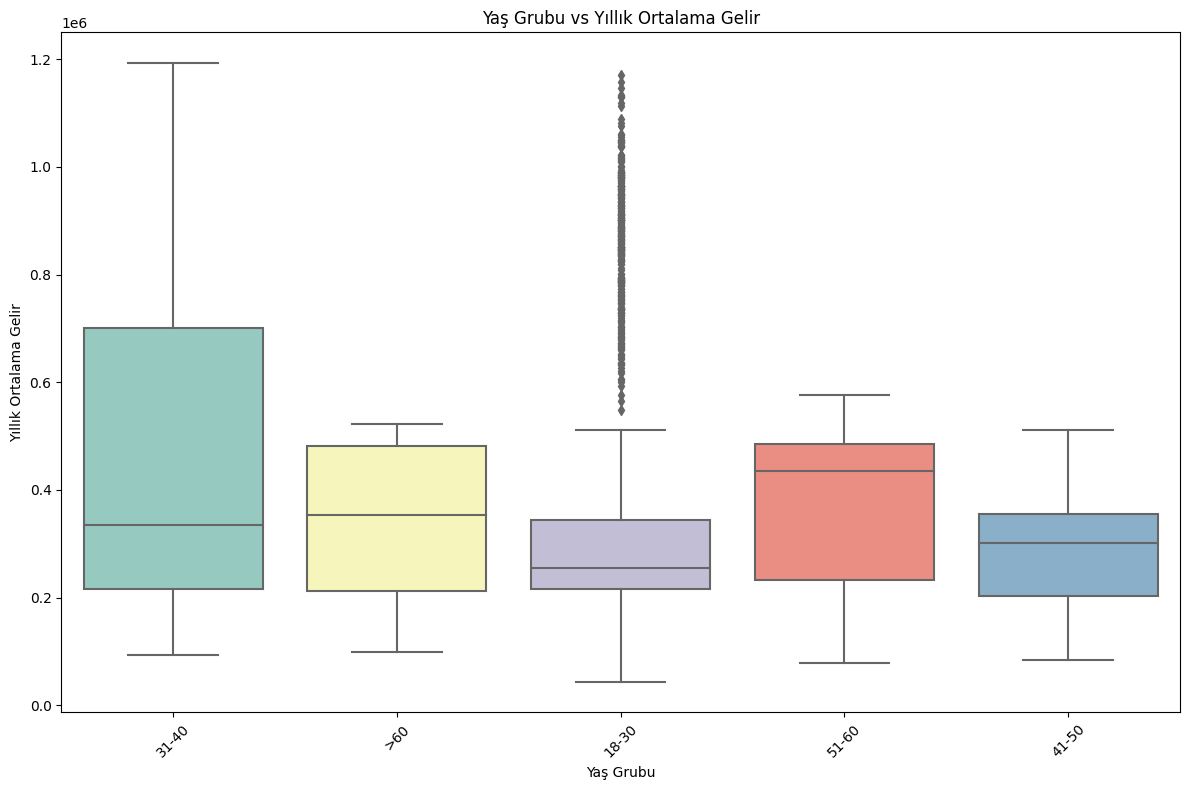

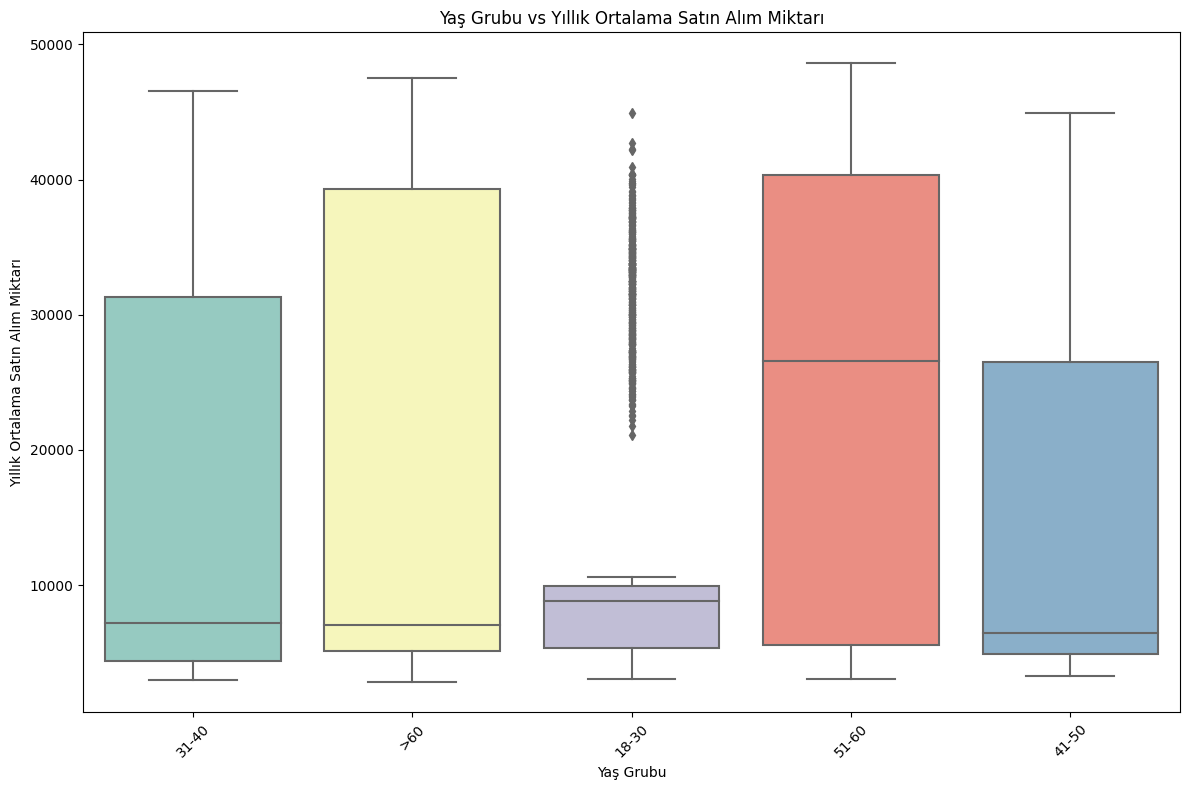

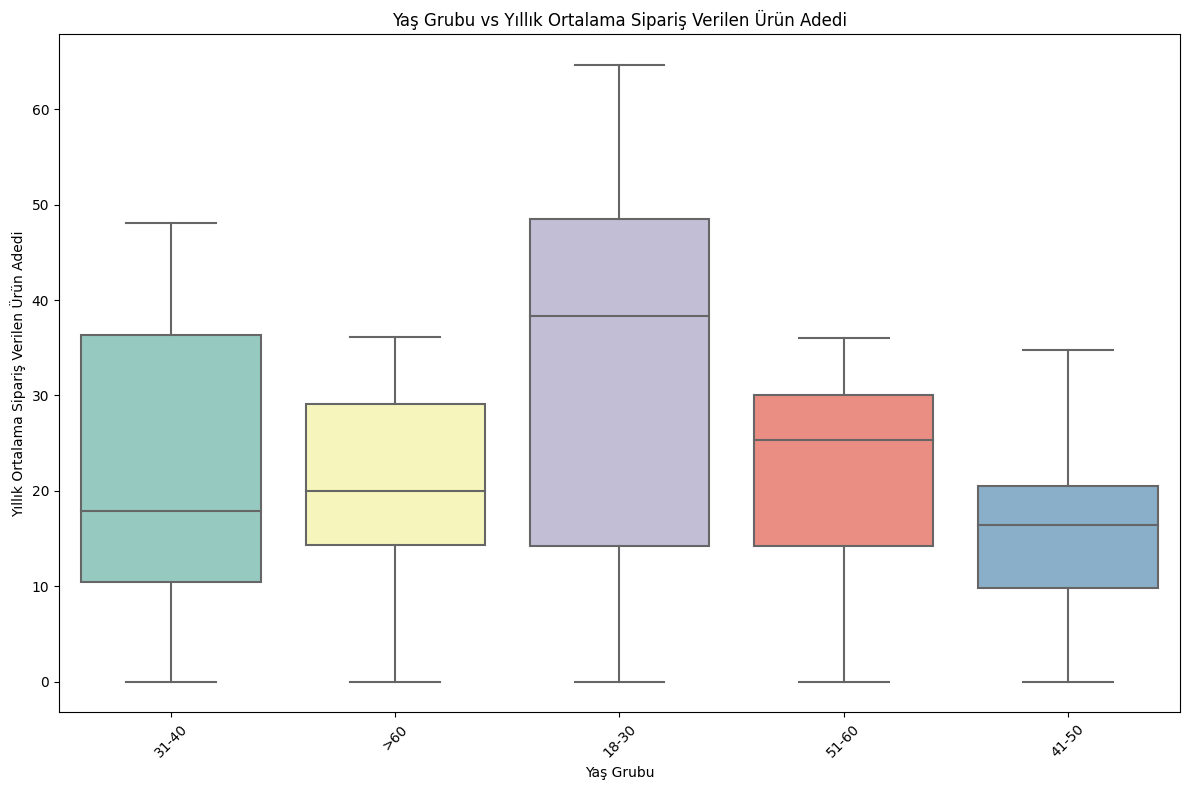

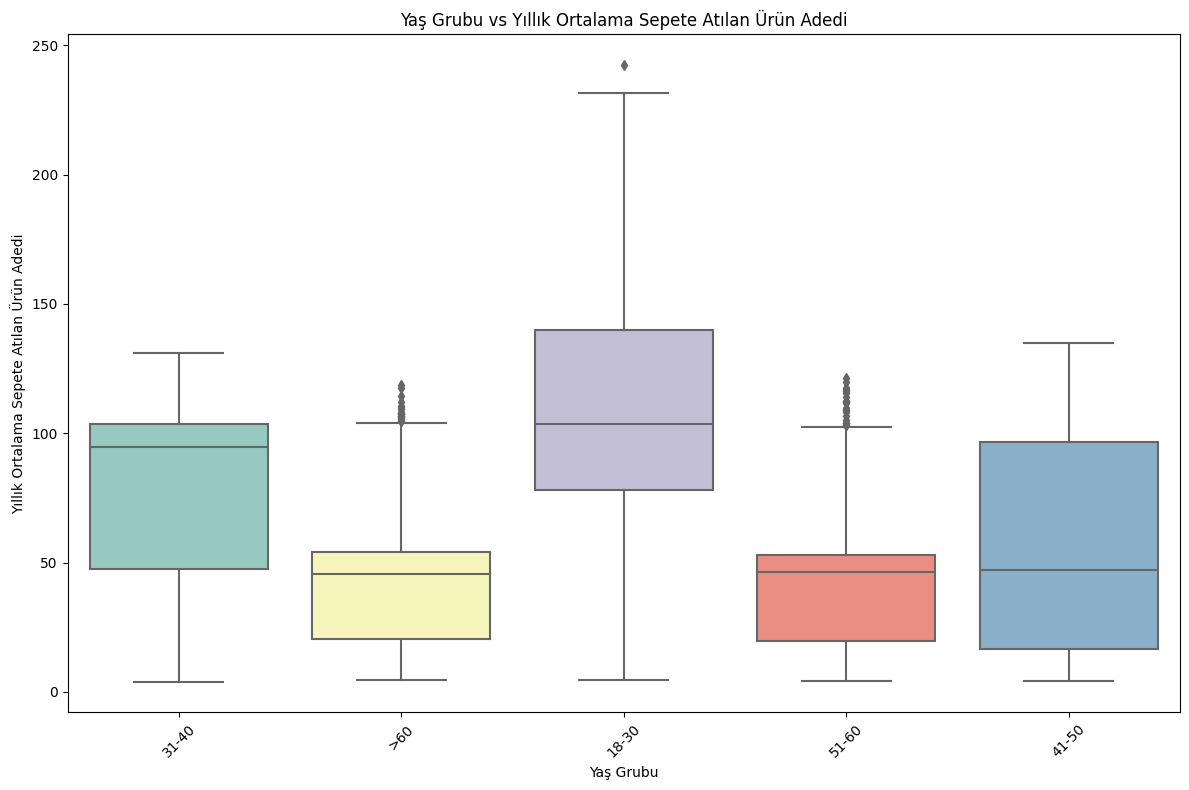

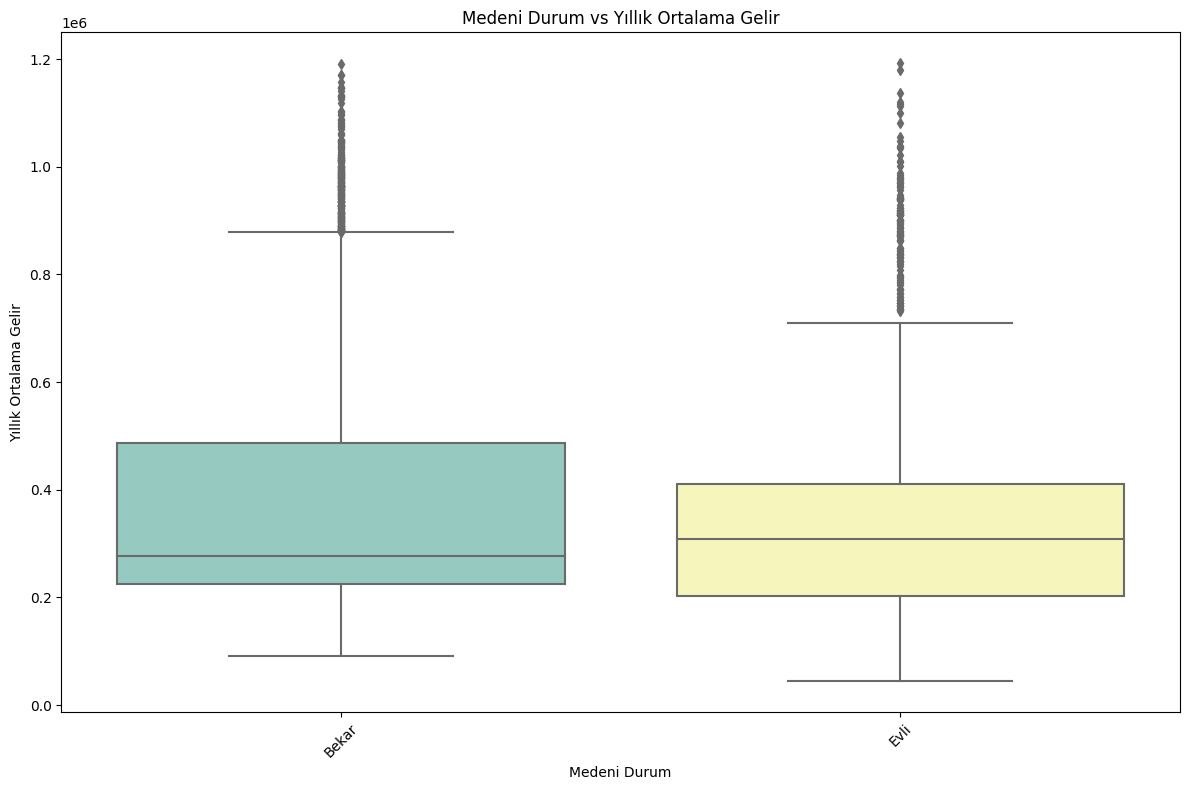

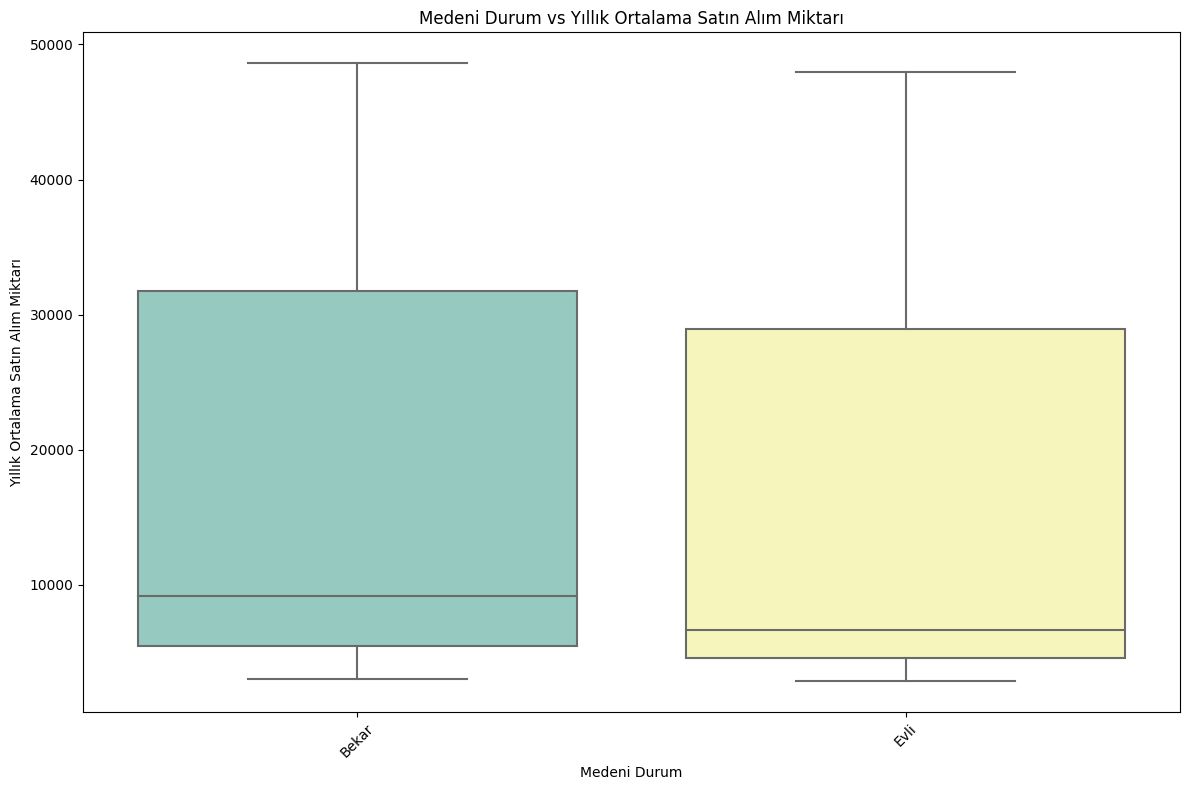

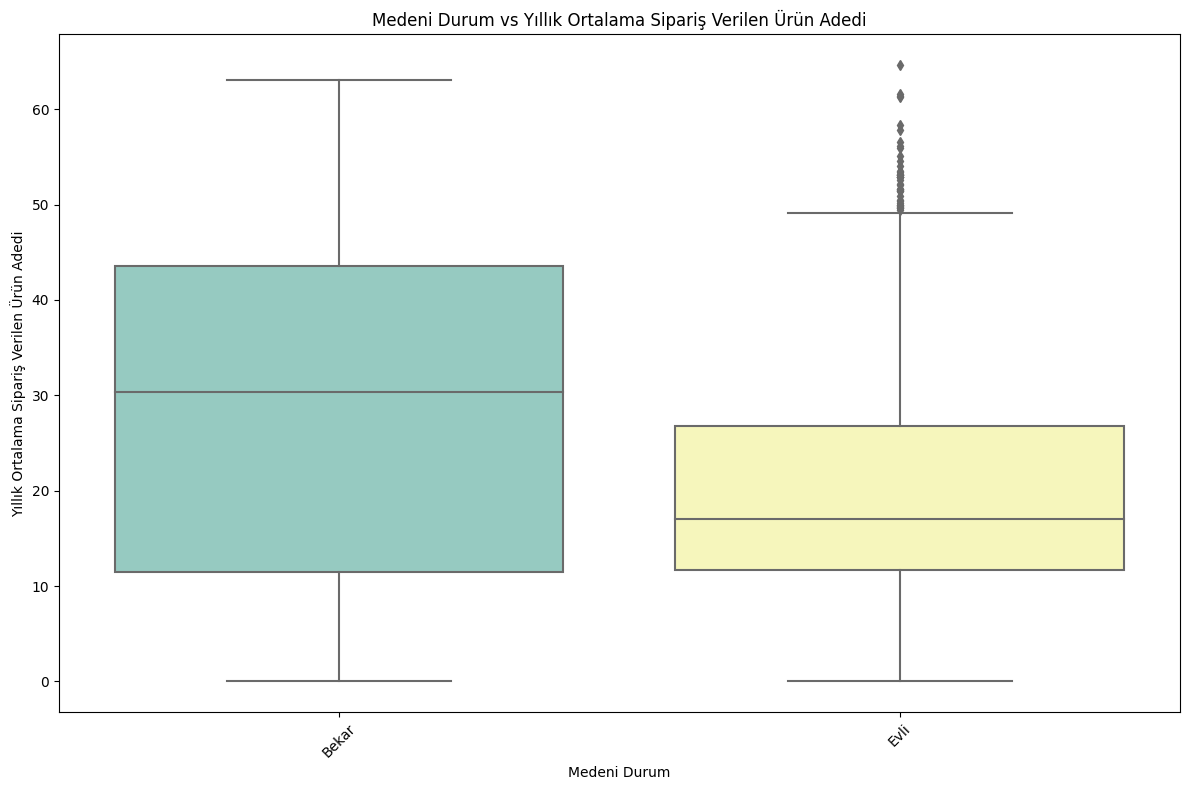

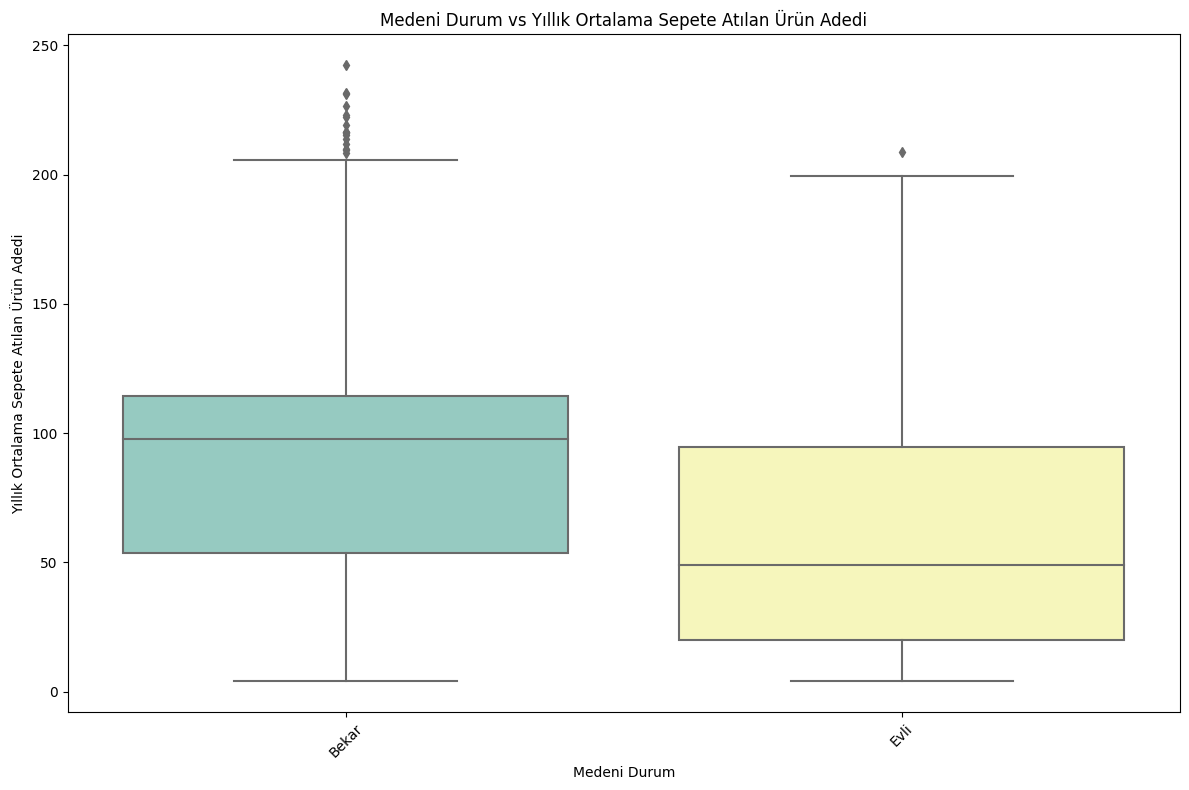

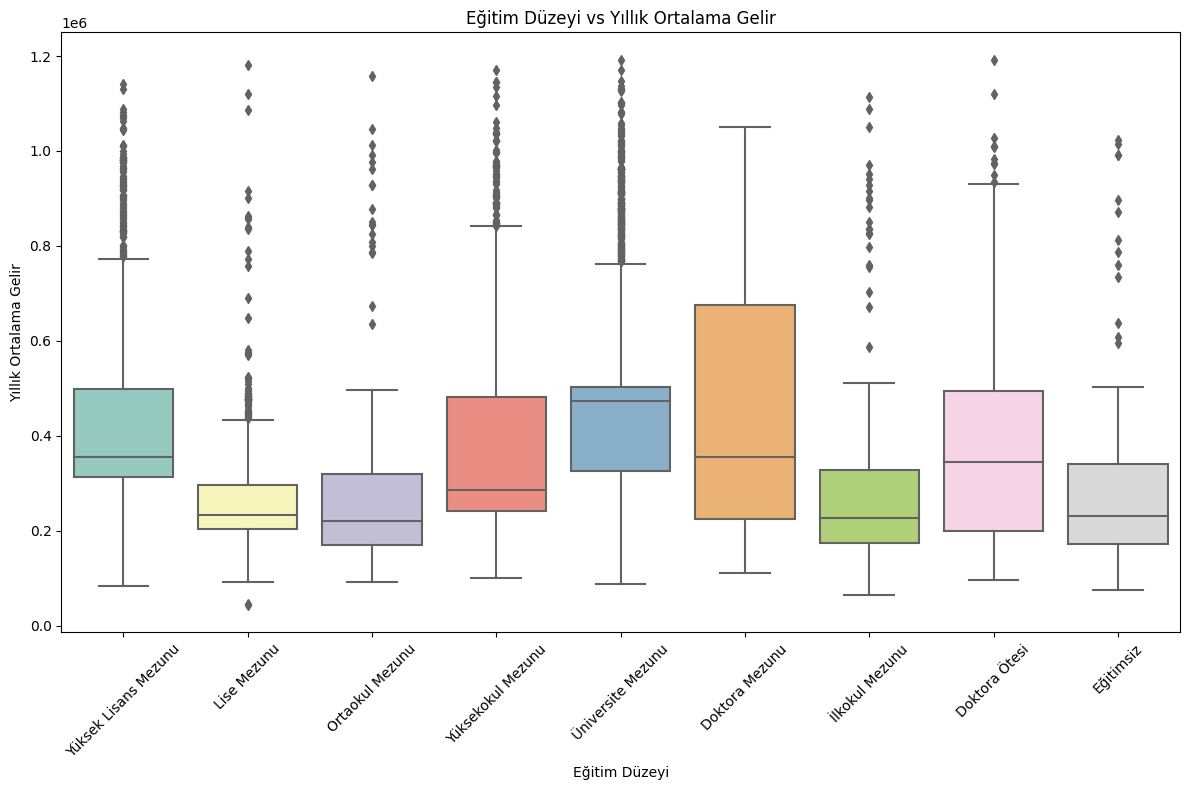

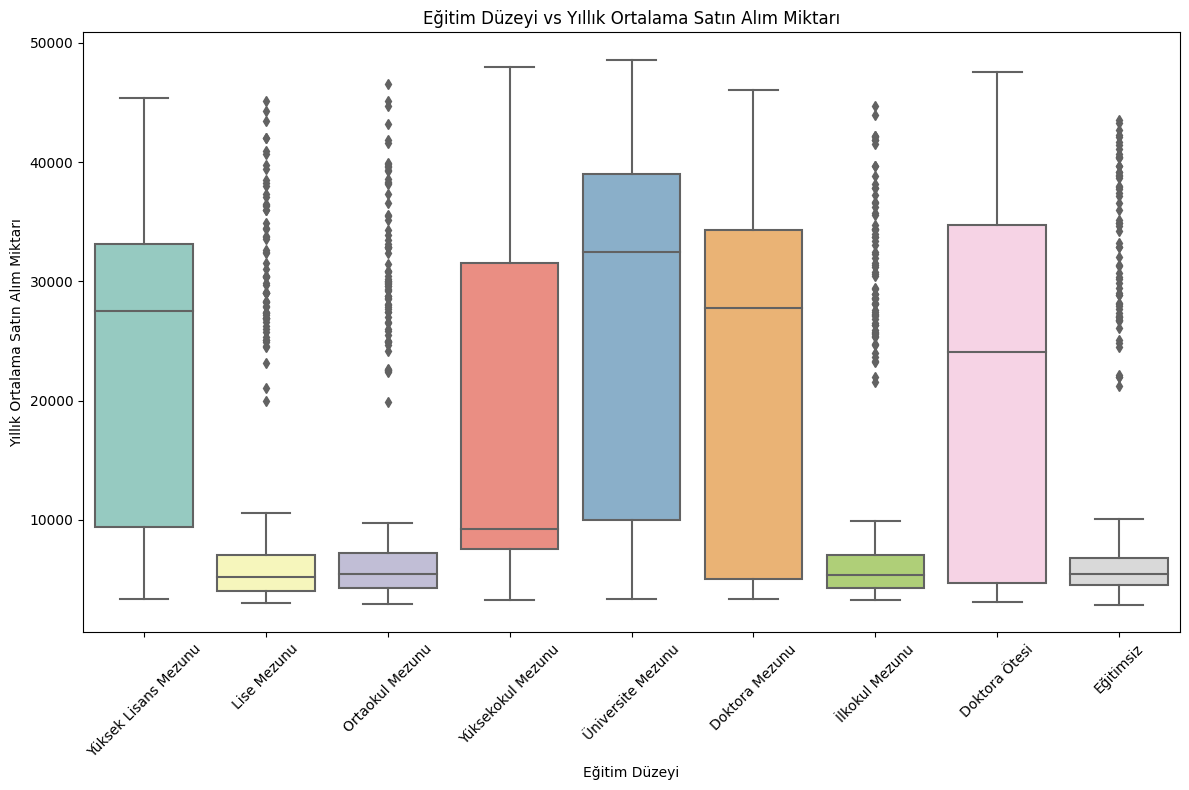

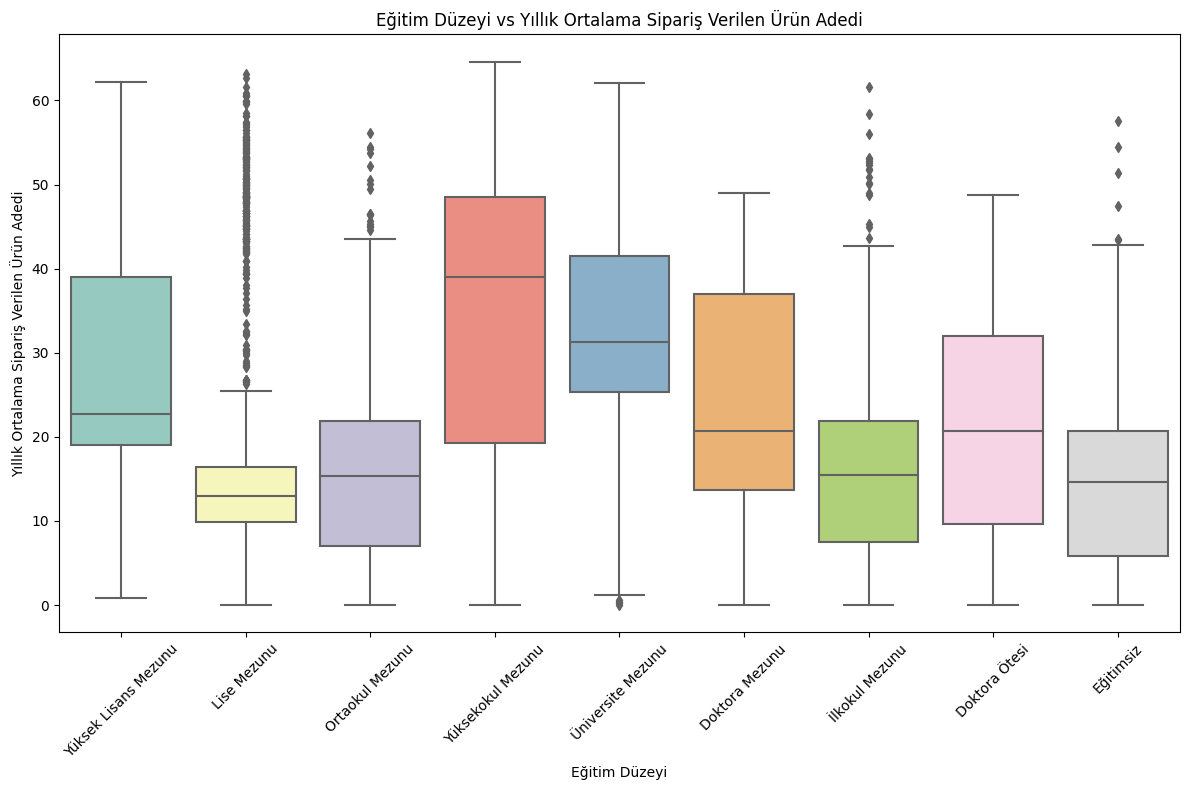

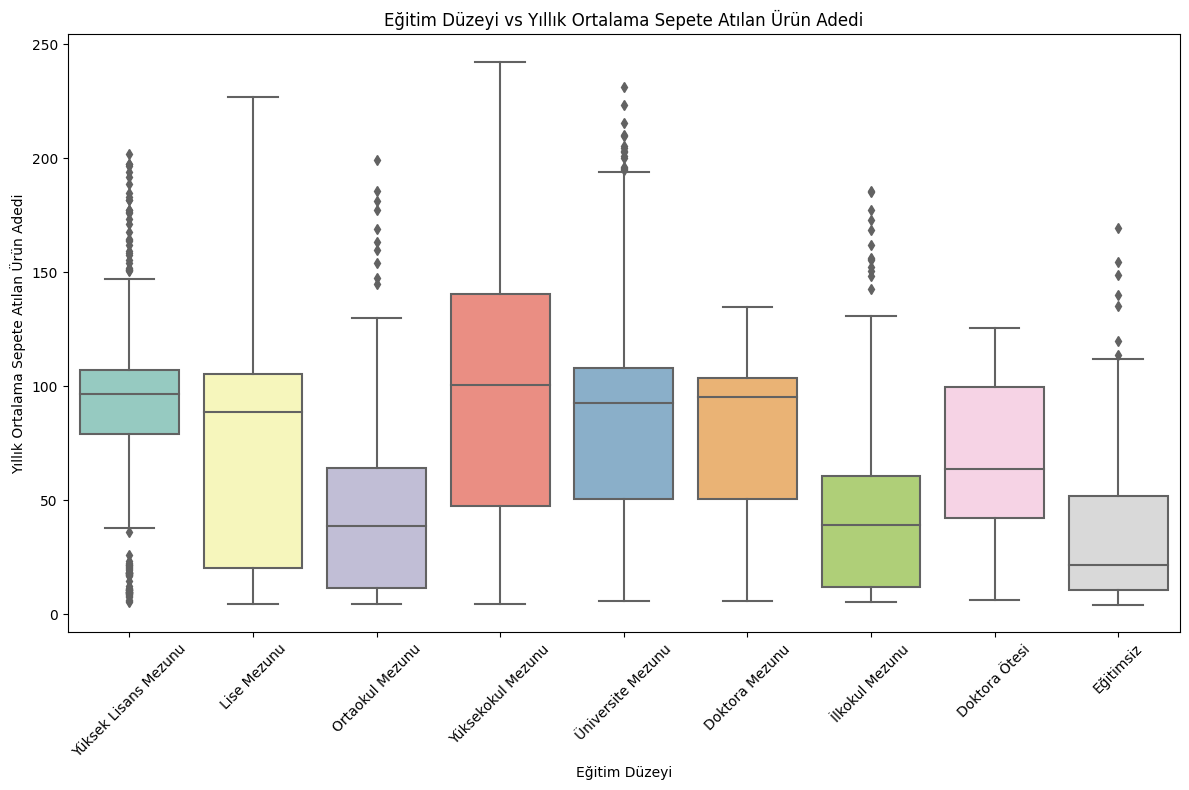

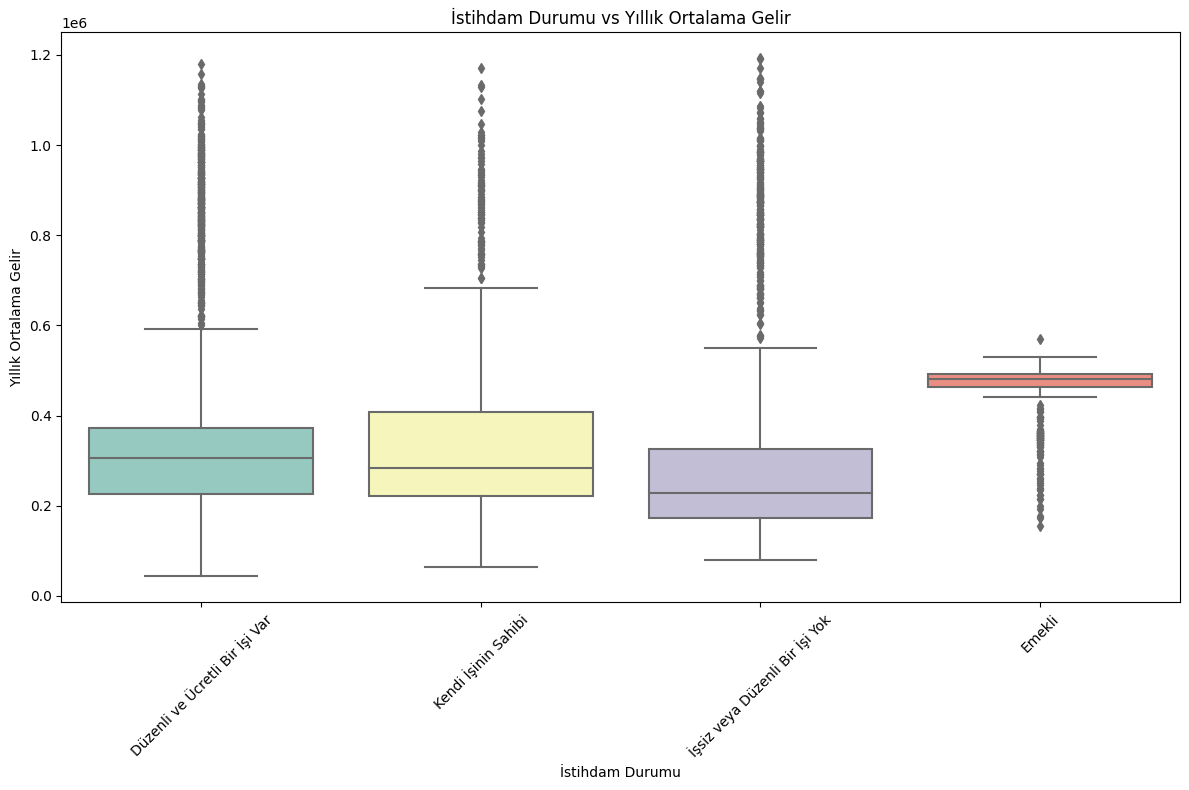

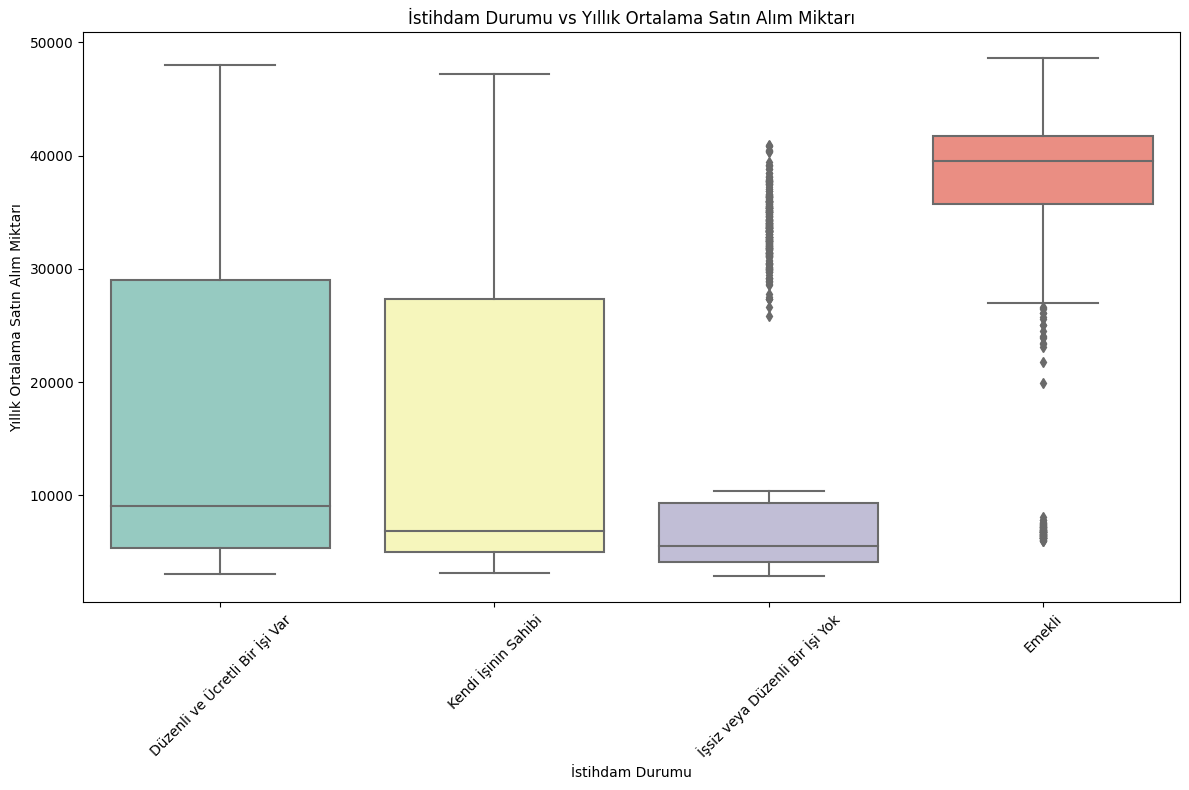

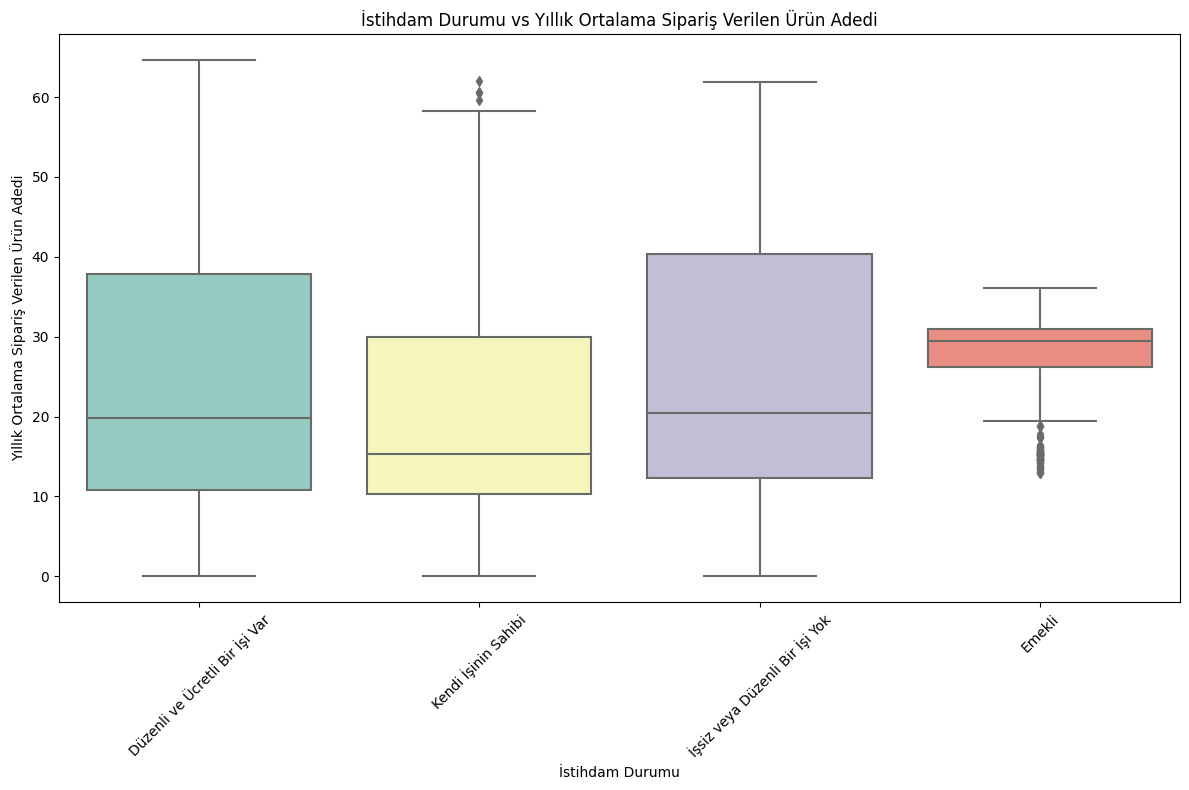

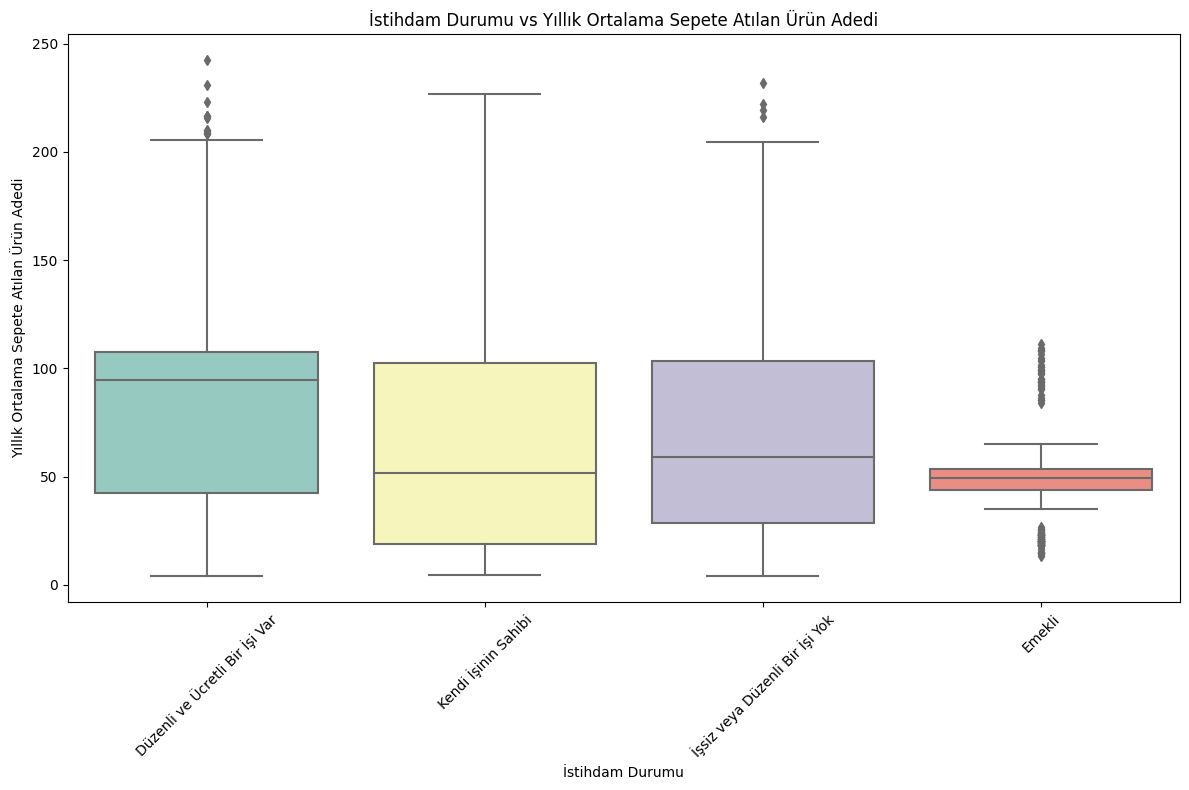

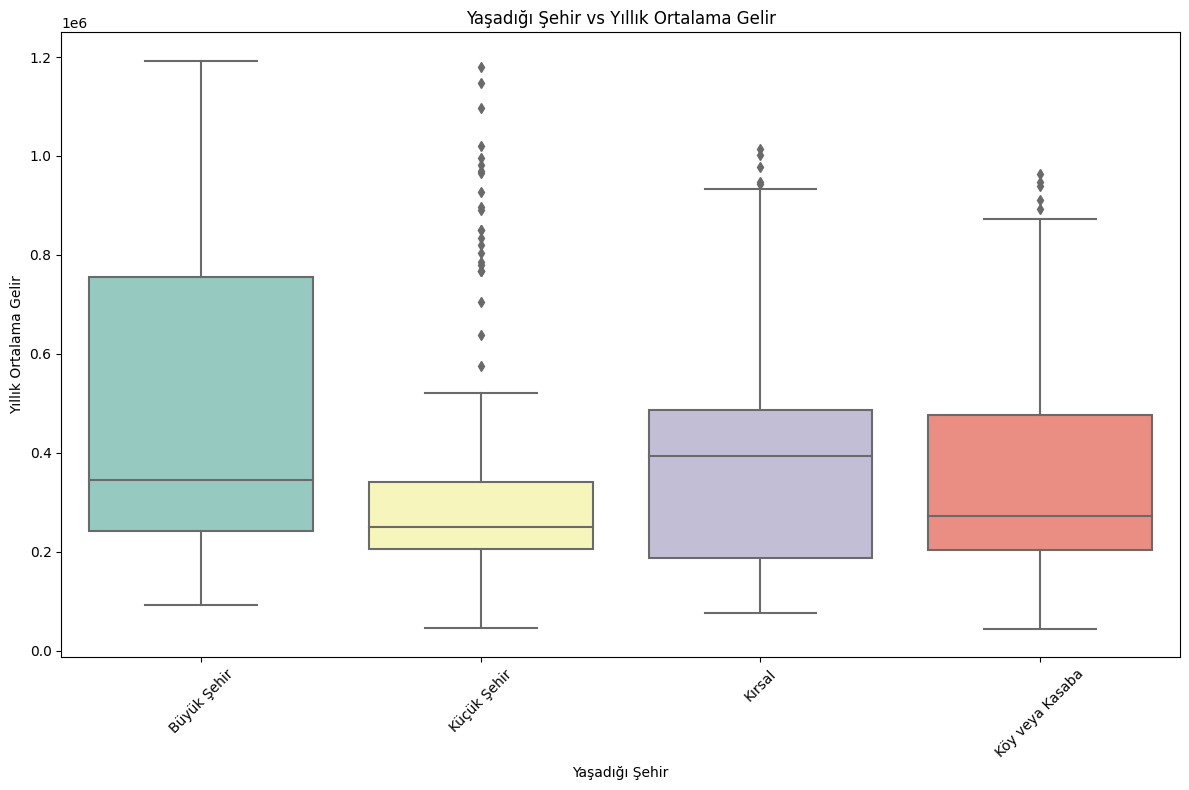

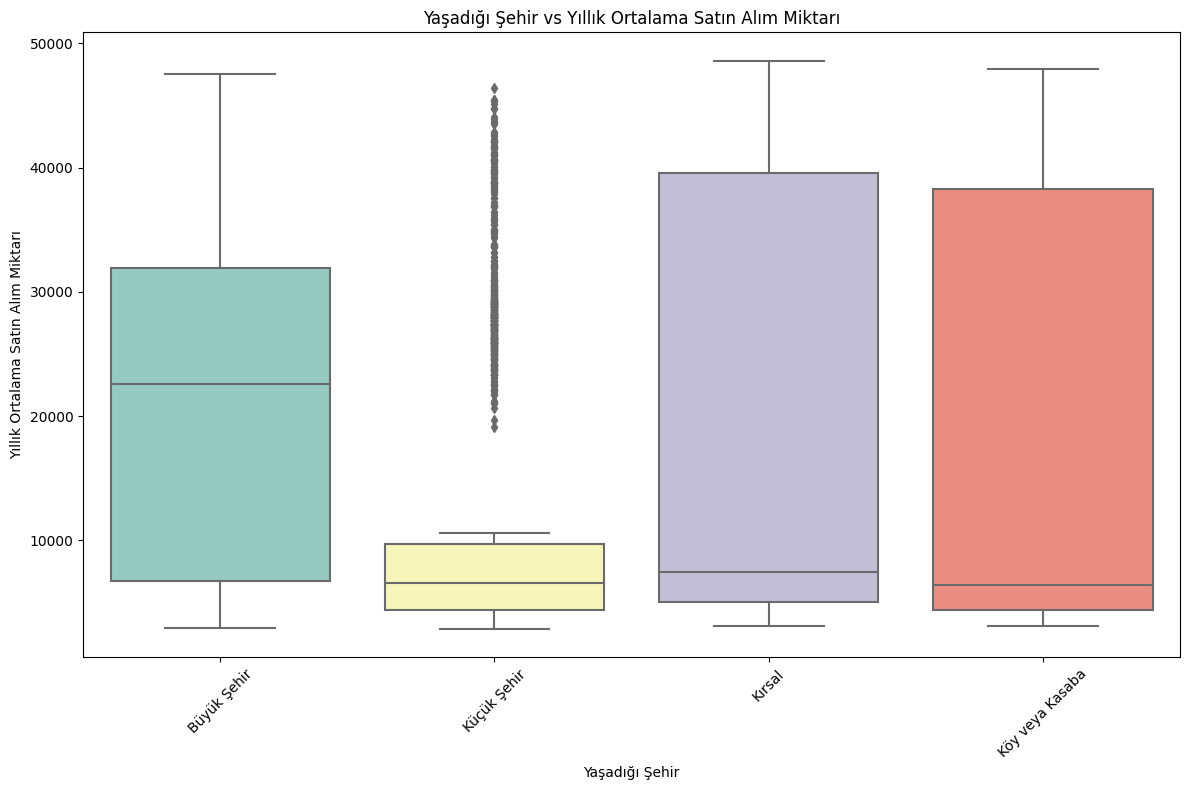

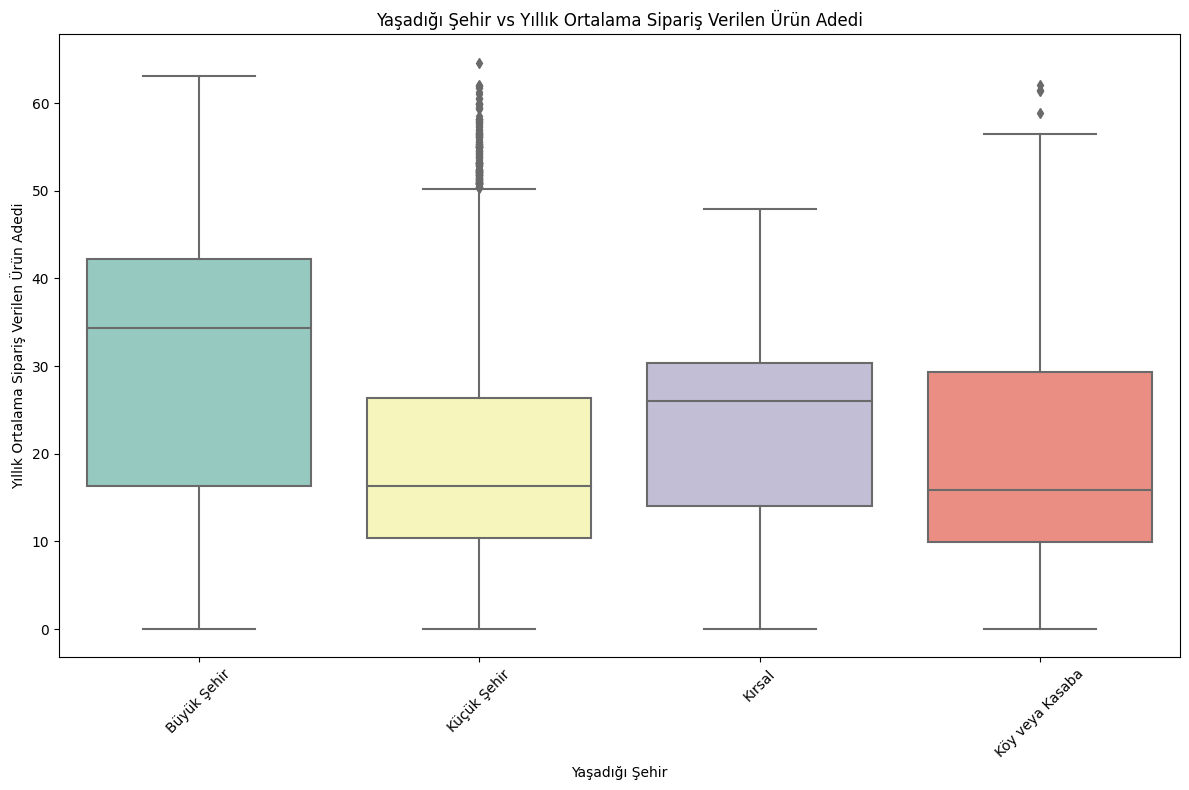

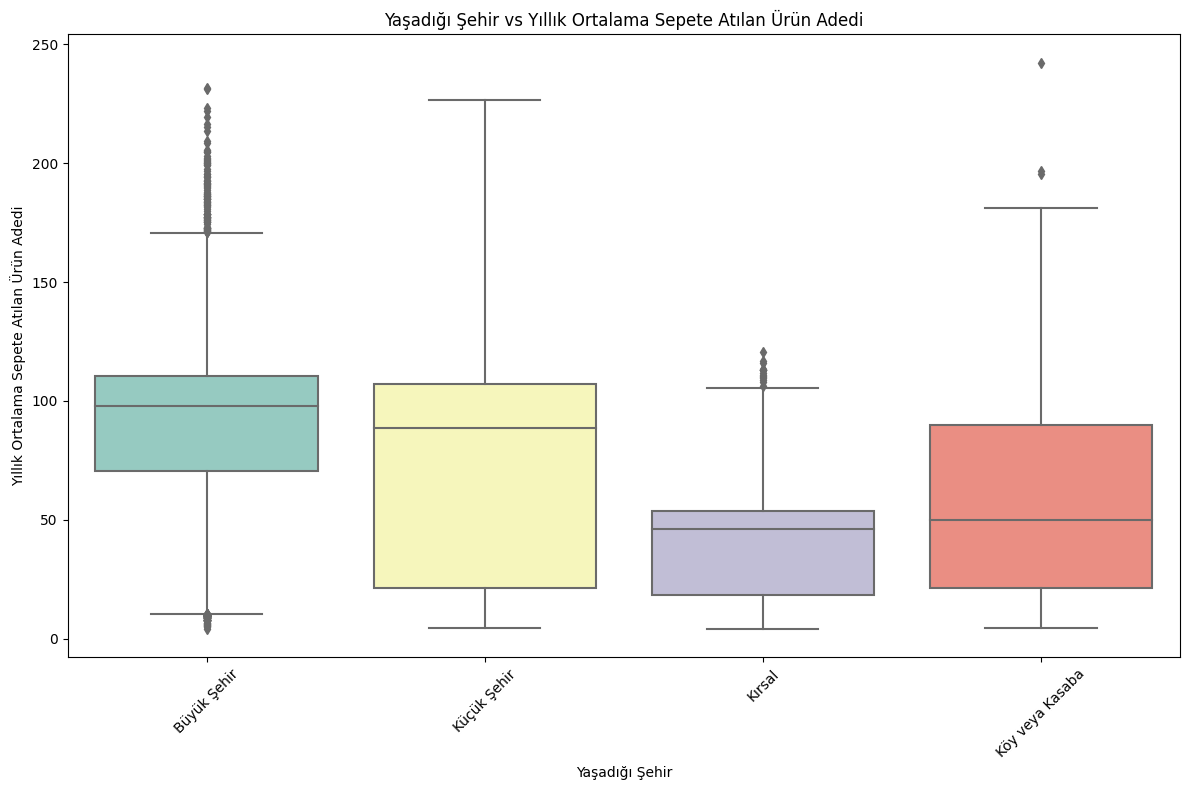

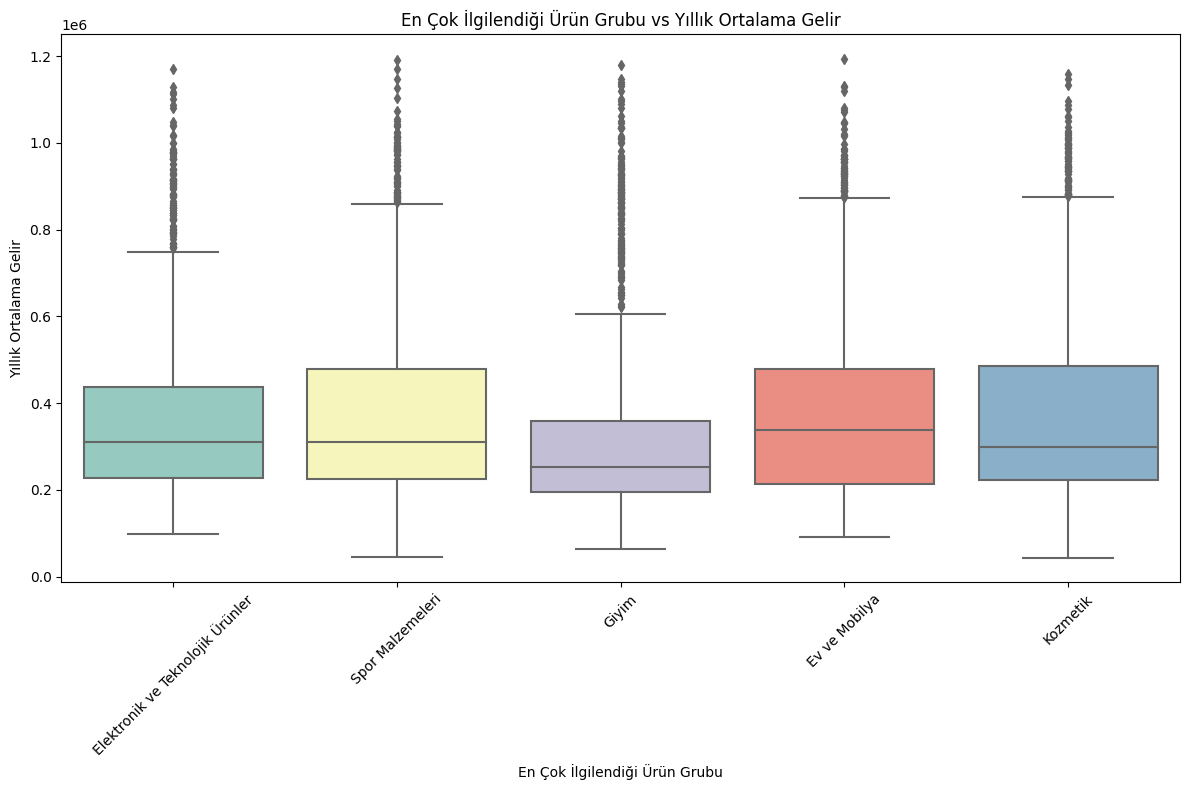

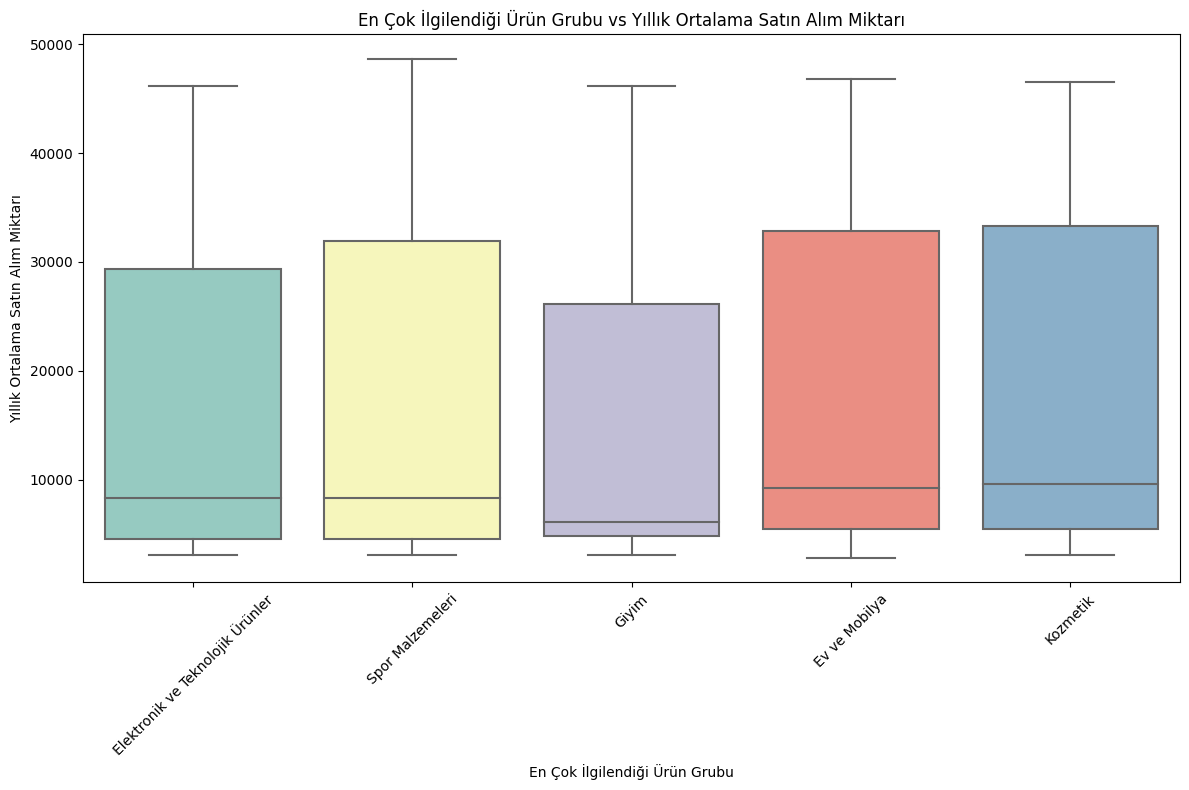

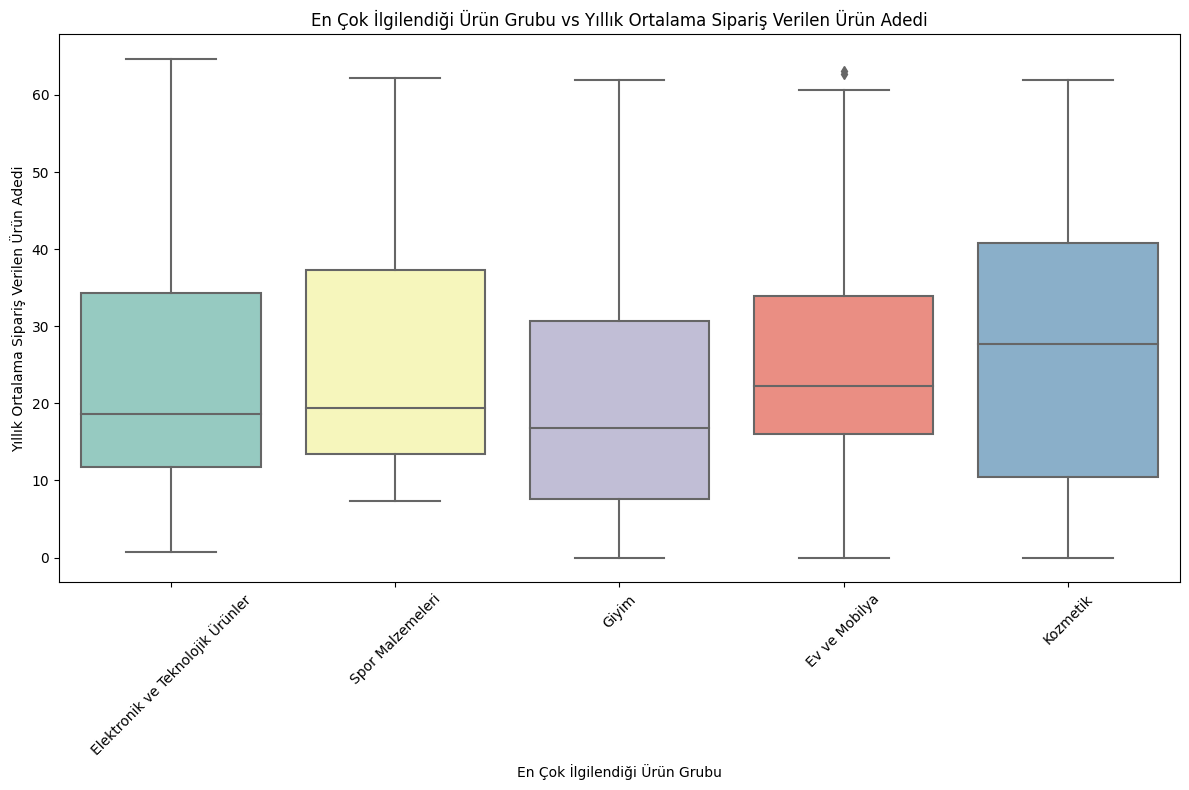

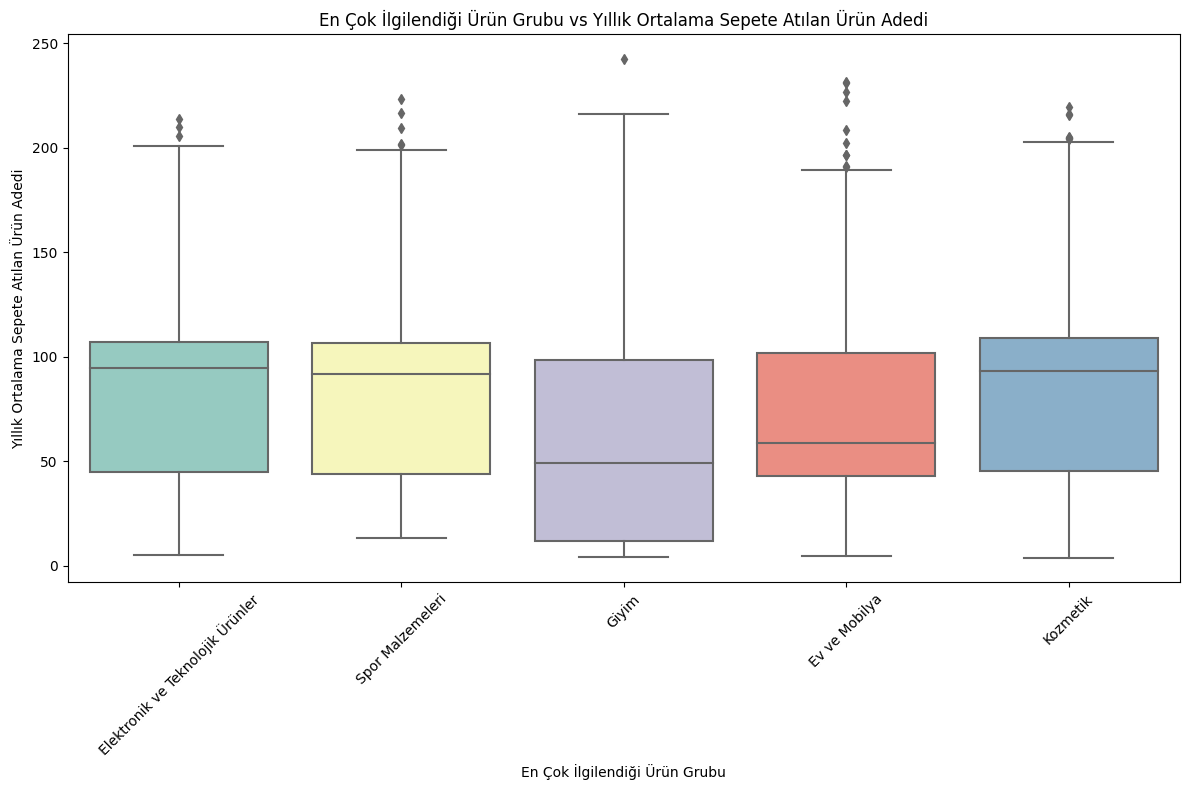

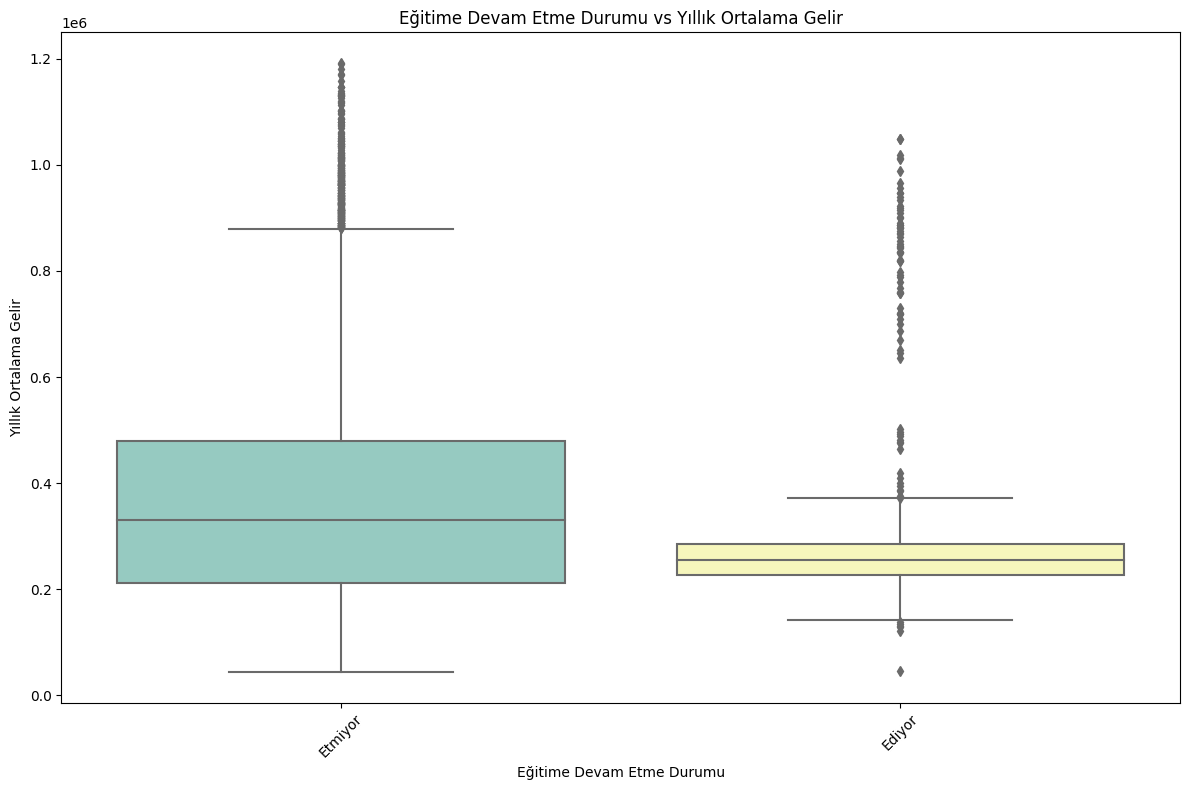

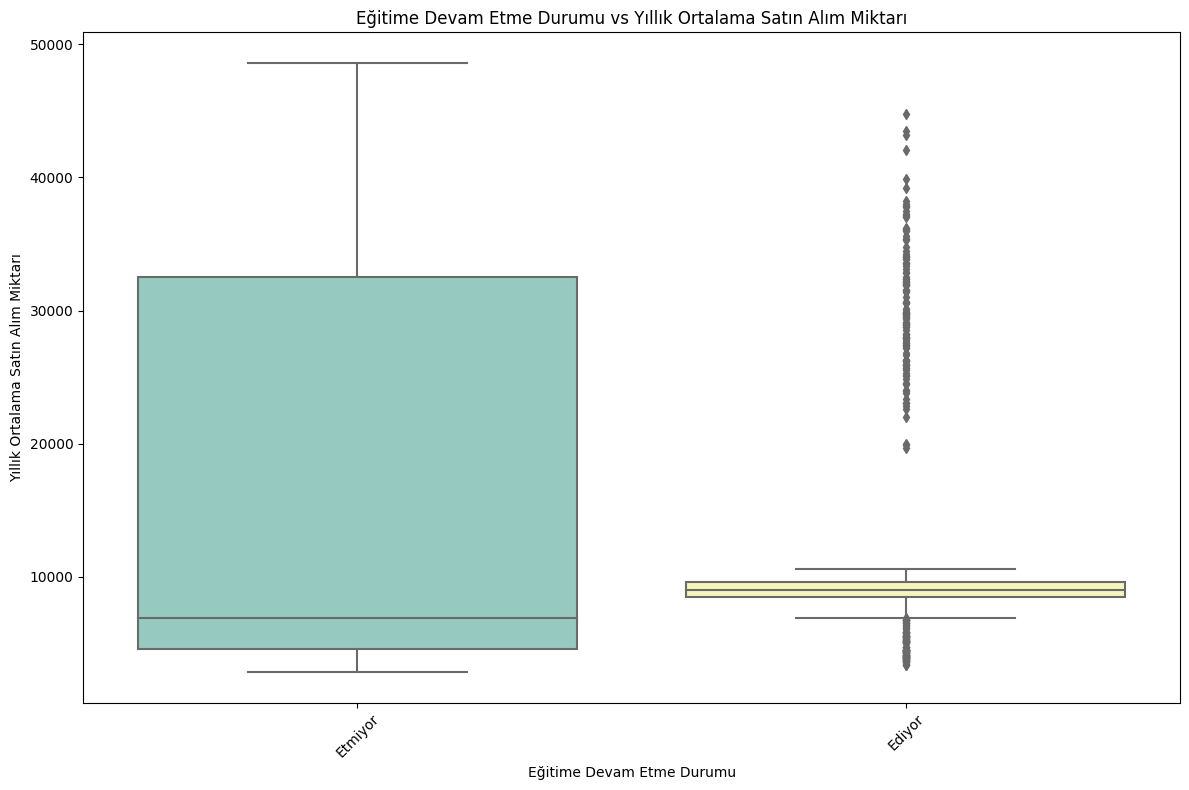

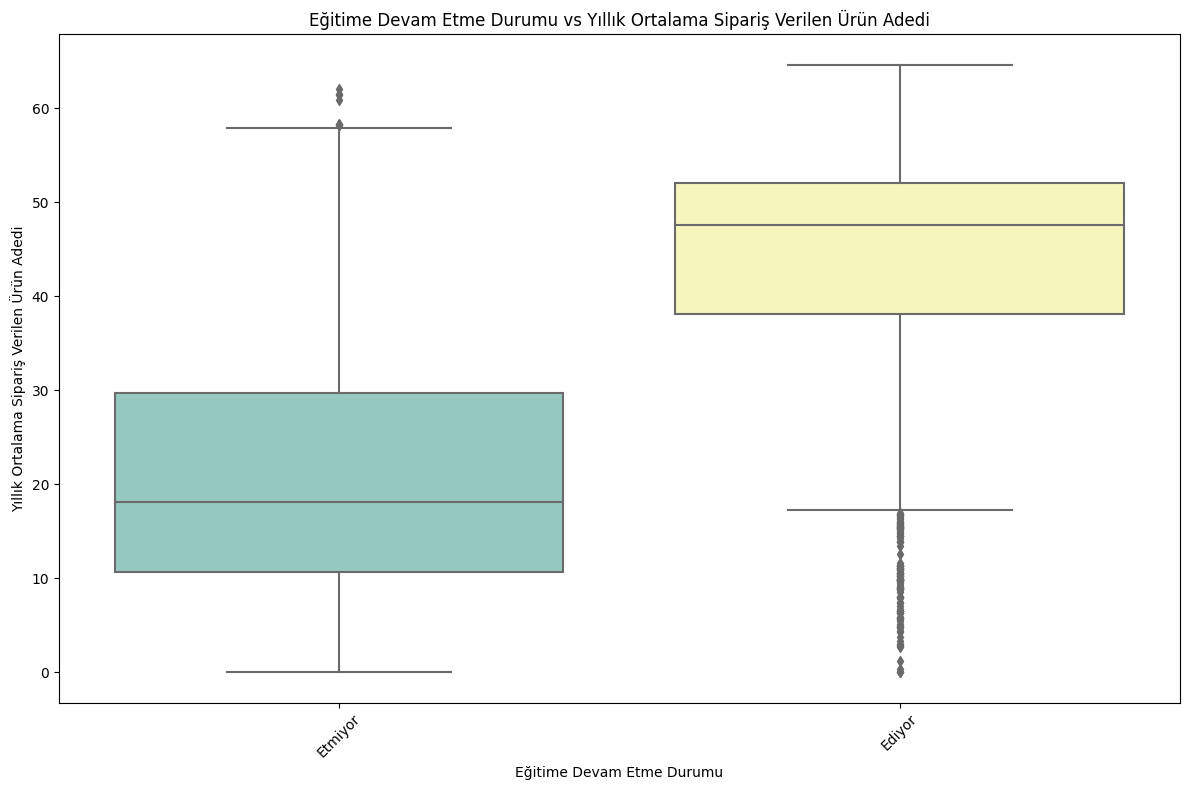

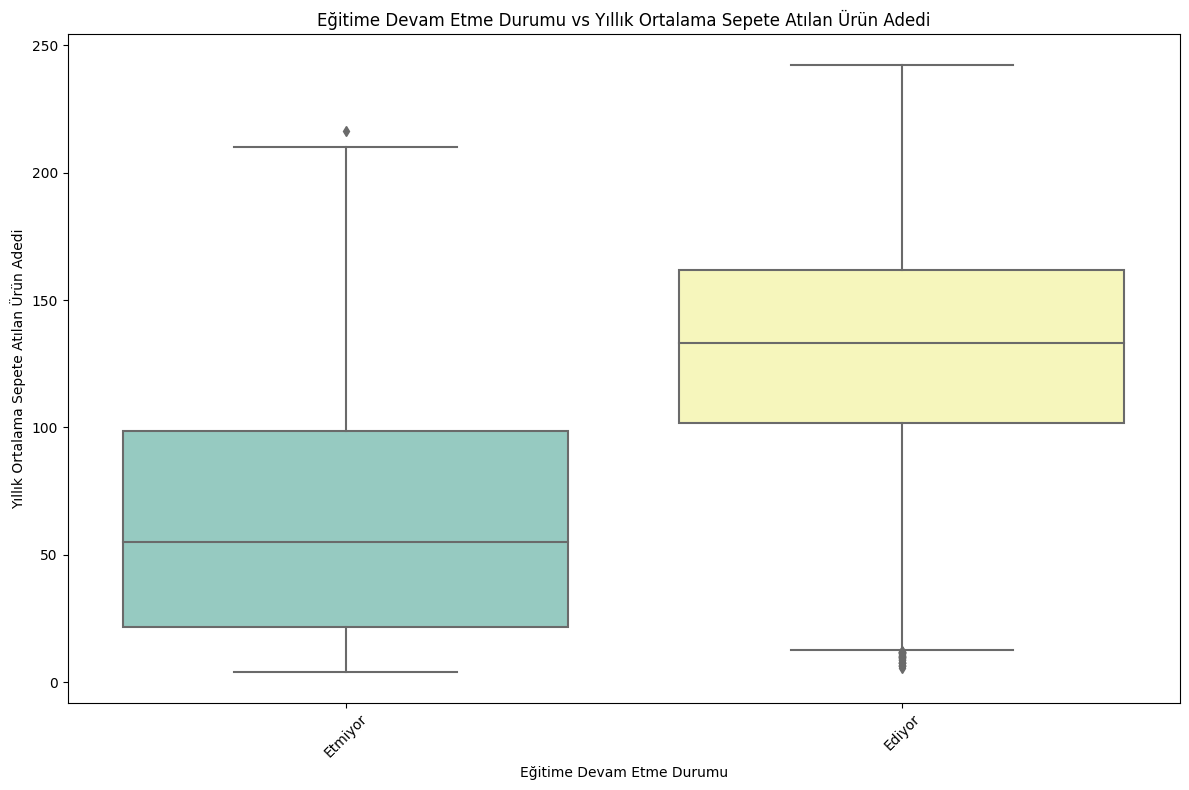

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# Define features and testclass
features = [
    "Yıllık Ortalama Gelir",
    "Yıllık Ortalama Satın Alım Miktarı",
    "Yıllık Ortalama Sipariş Verilen Ürün Adedi",
    "Yıllık Ortalama Sepete Atılan Ürün Adedi"
]


for sinif_x in testclass:
    for feature in features:
            # Create a new plot for each class-feature combination
            plt.figure(figsize=(12, 8))
            sns.boxplot(data=train_data, x=sinif_x, y=feature, palette="Set3")
            plt.title(f"{sinif_x} vs {feature}")
            plt.xlabel(sinif_x)
            plt.ylabel(feature)
            plt.xticks(rotation=45)
            plt.tight_layout()

plt.show()

<ipython-input-31-c14b03b67f8b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x="Öbek İsmi", y=feature,hue=f"{sinif_x}", ci=None)
<ipython-input-31-c14b03b67f8b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x="Öbek İsmi", y=feature,hue=f"{sinif_x}", ci=None)
<ipython-input-31-c14b03b67f8b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x="Öbek İsmi", y=feature,hue=f"{sinif_x}", ci=None)
<ipython-input-31-c14b03b67f8b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=train_data, x="Öbek İsmi", y=feature,hue=f"{sinif_x}", ci=None)
<ipython-input-31-c14b03b67f8b>:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=trai

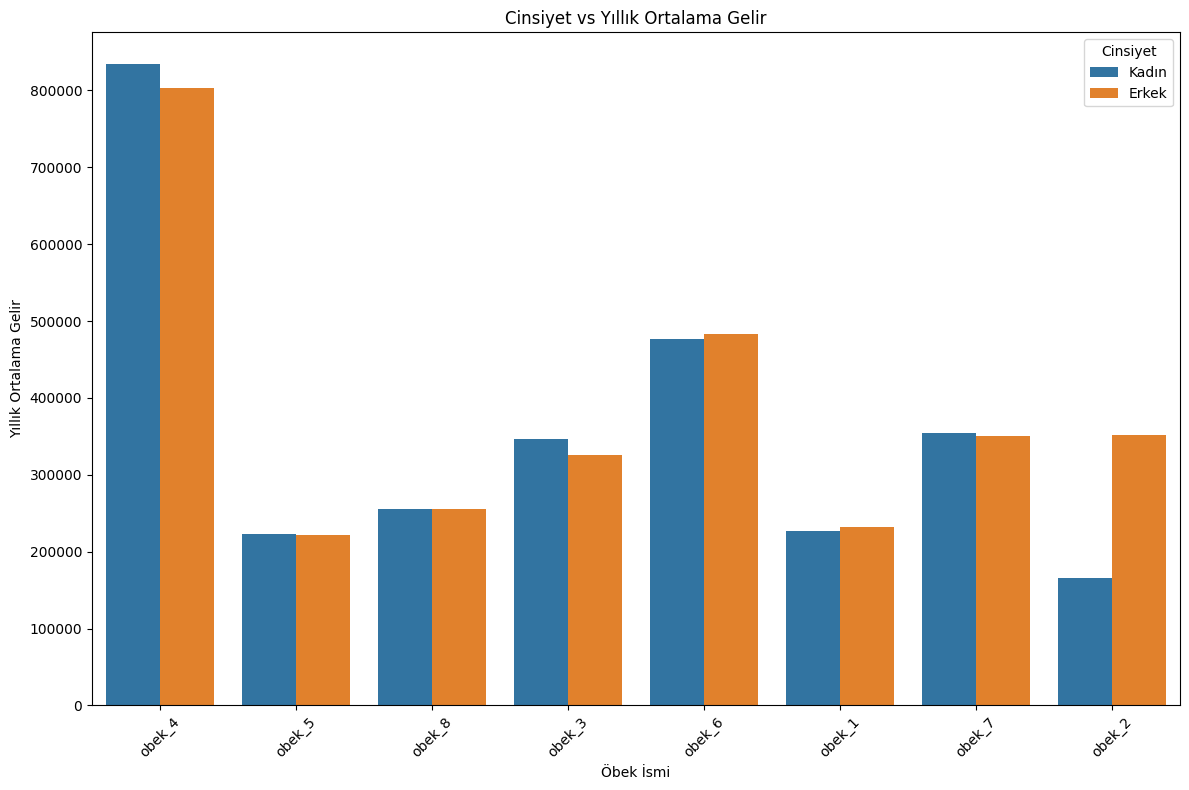

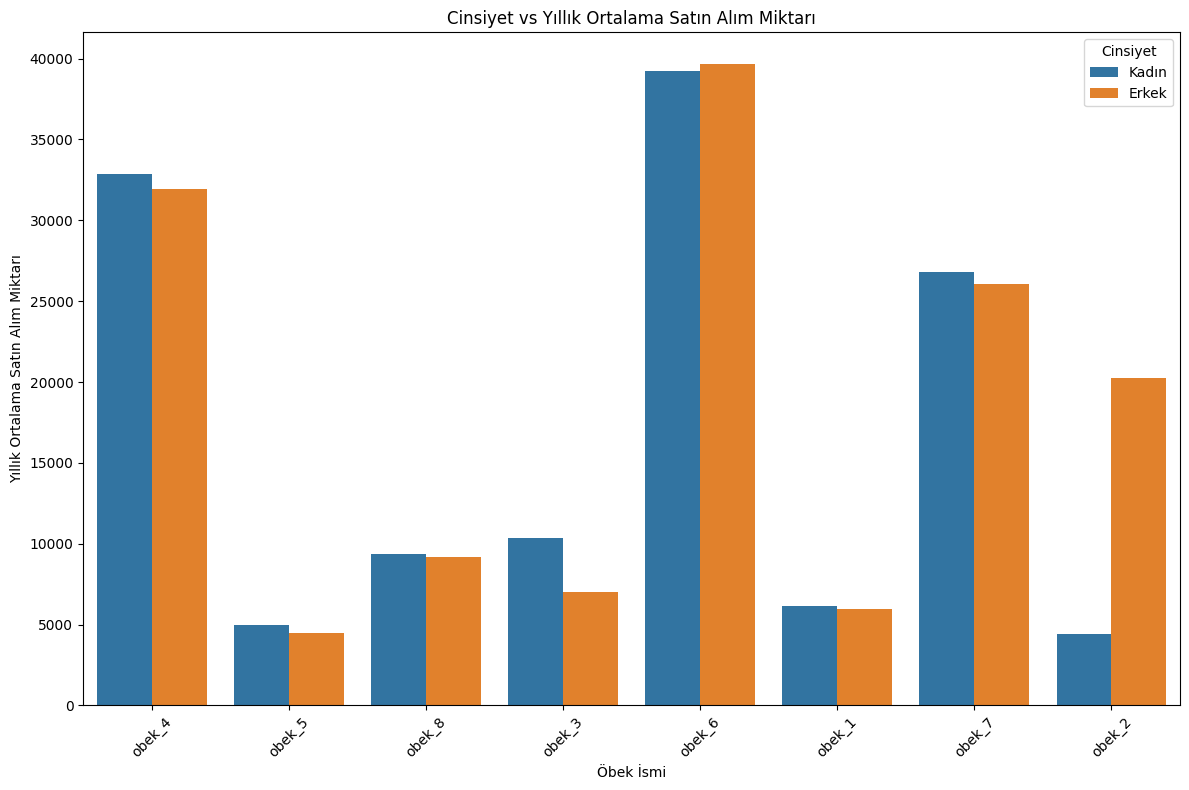

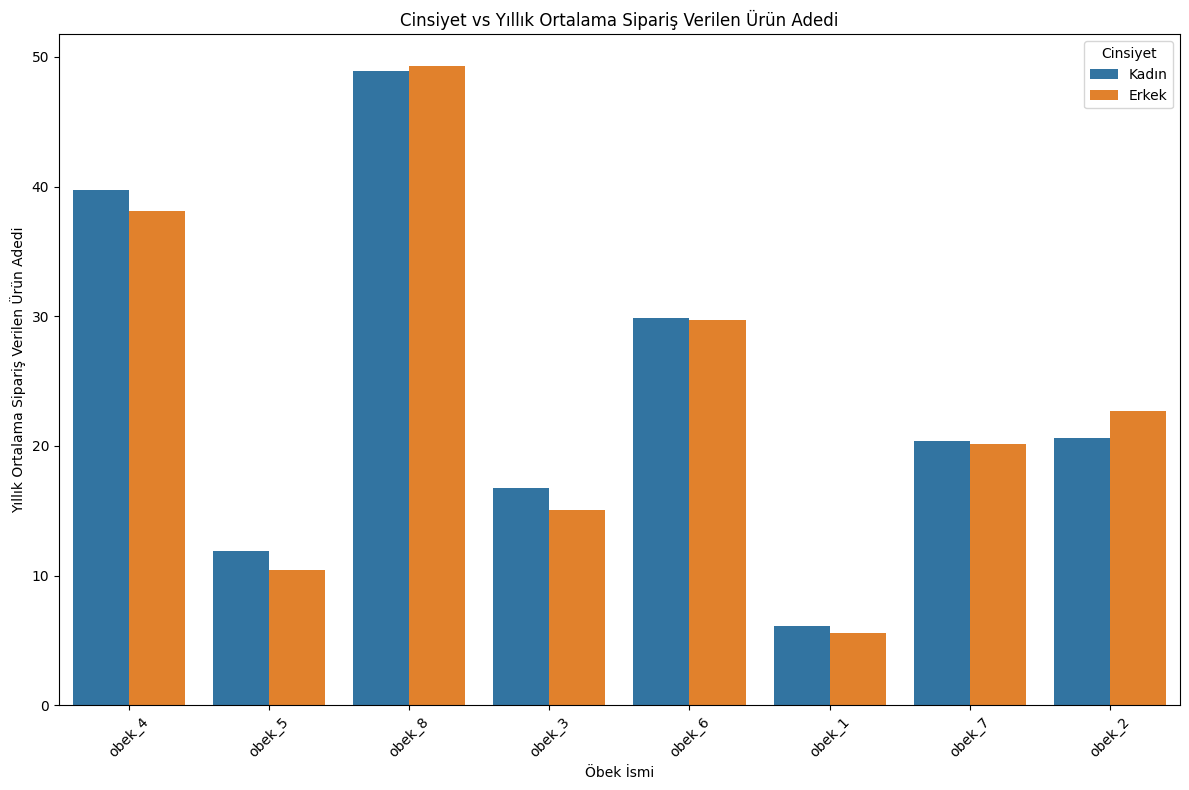

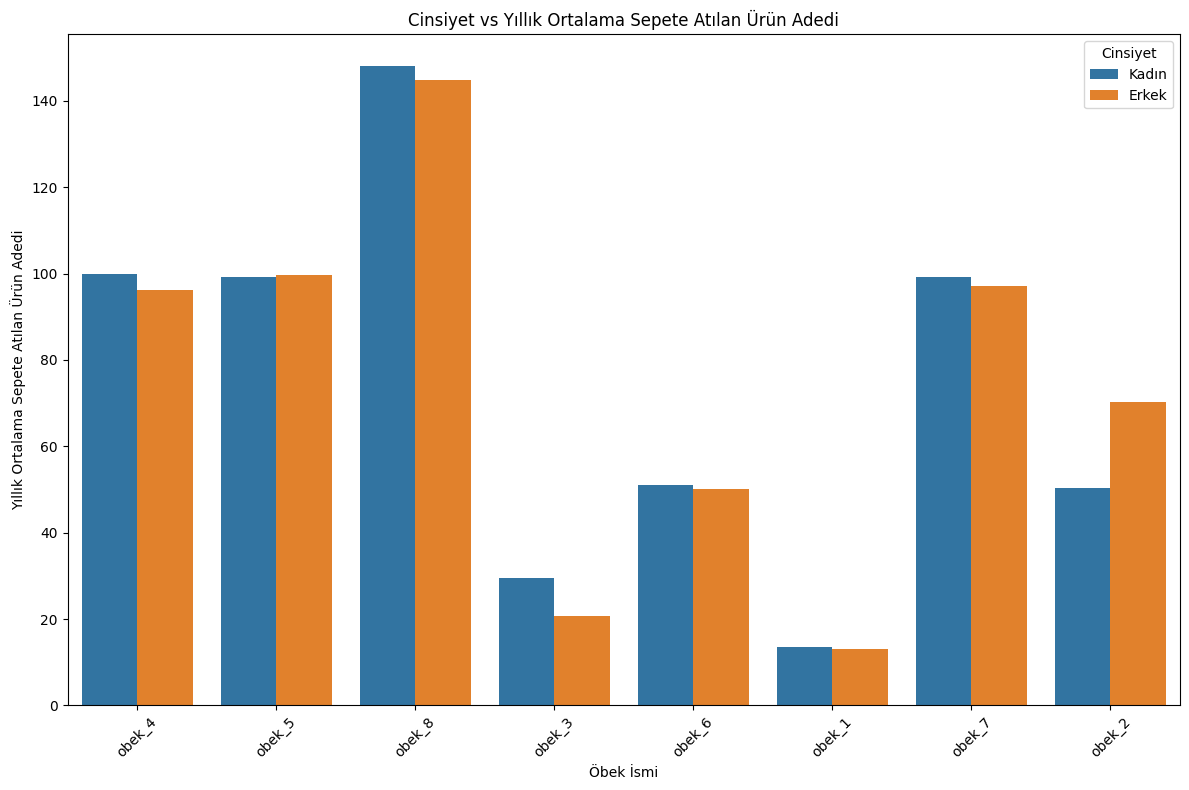

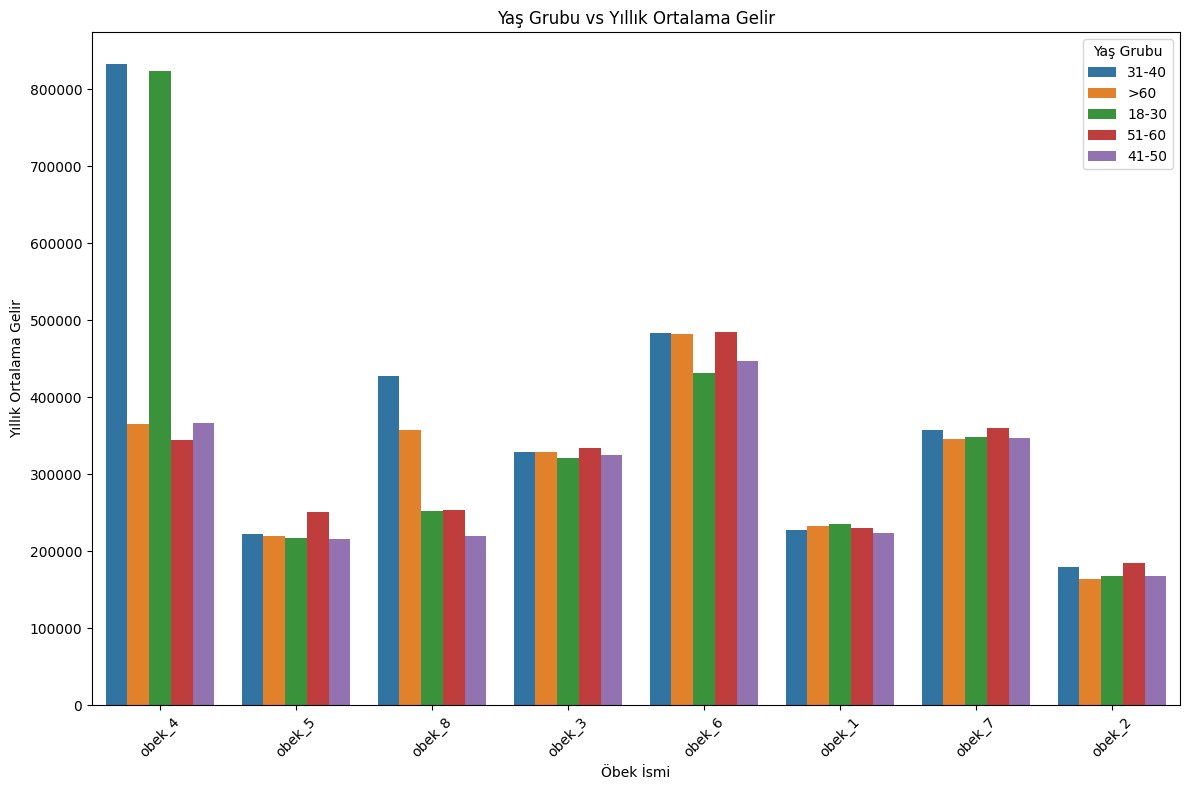

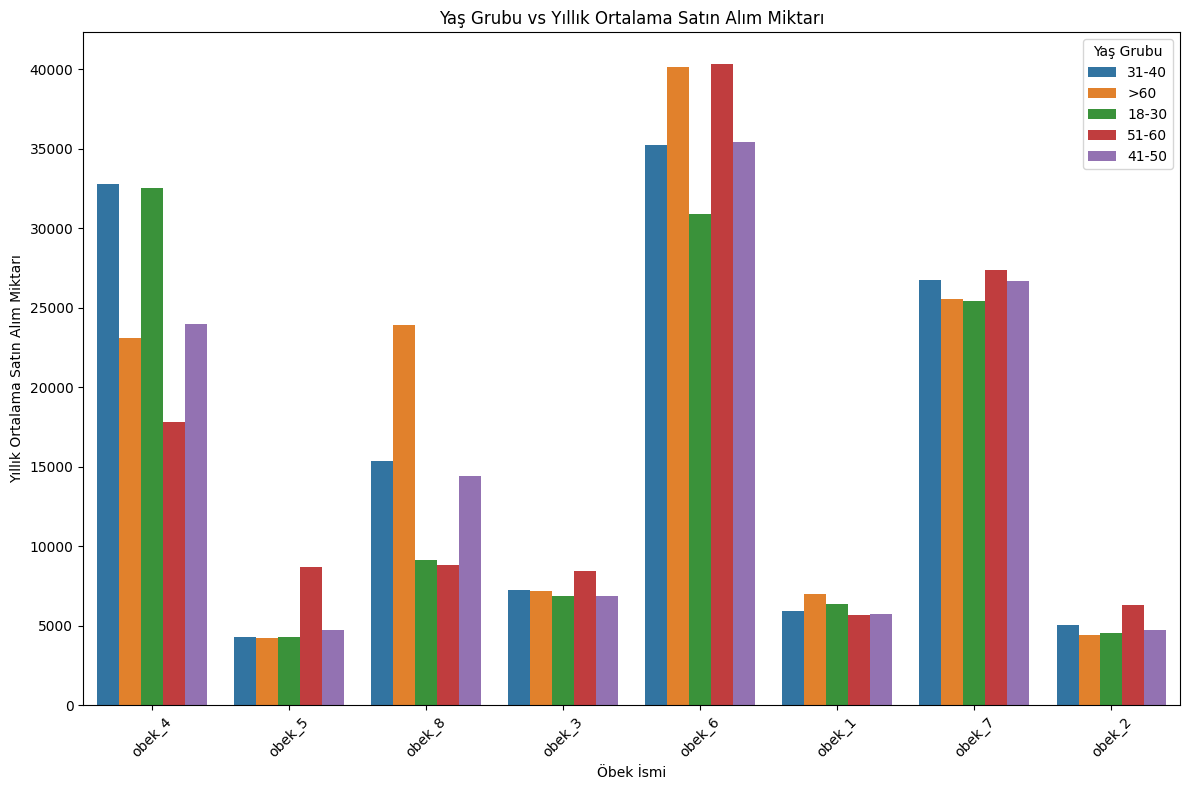

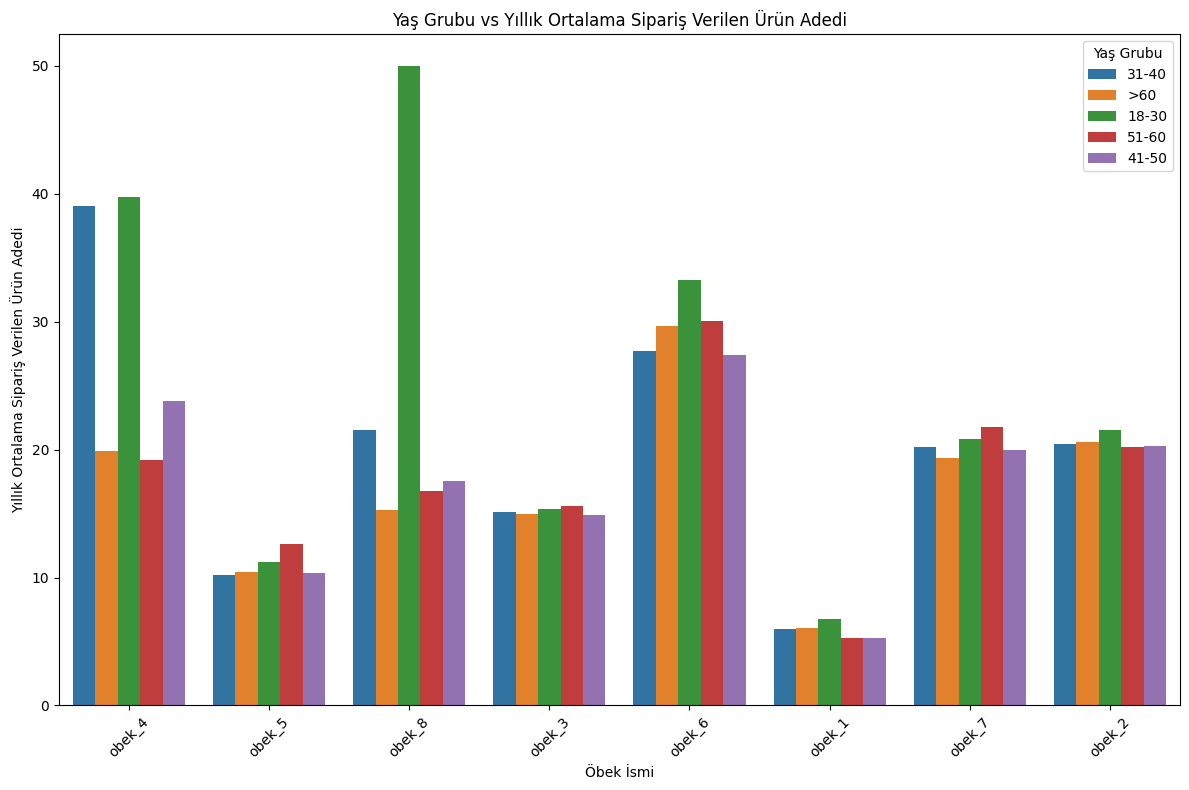

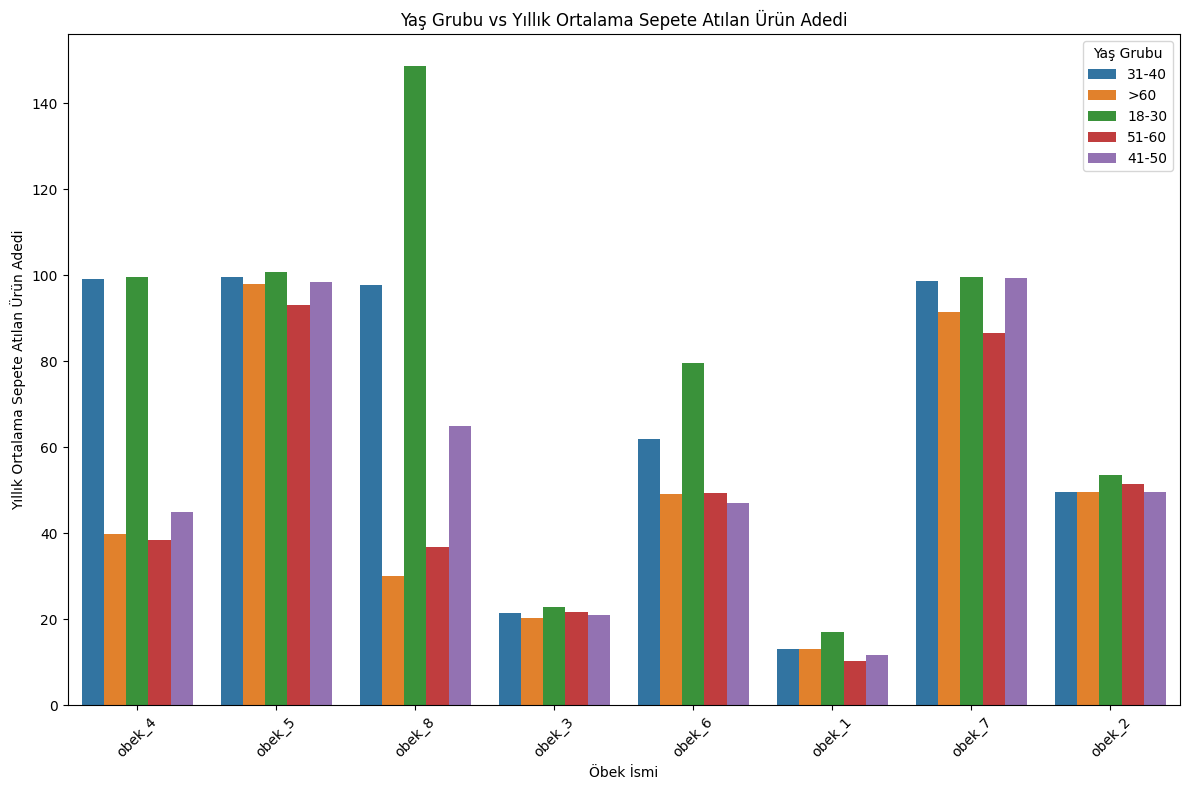

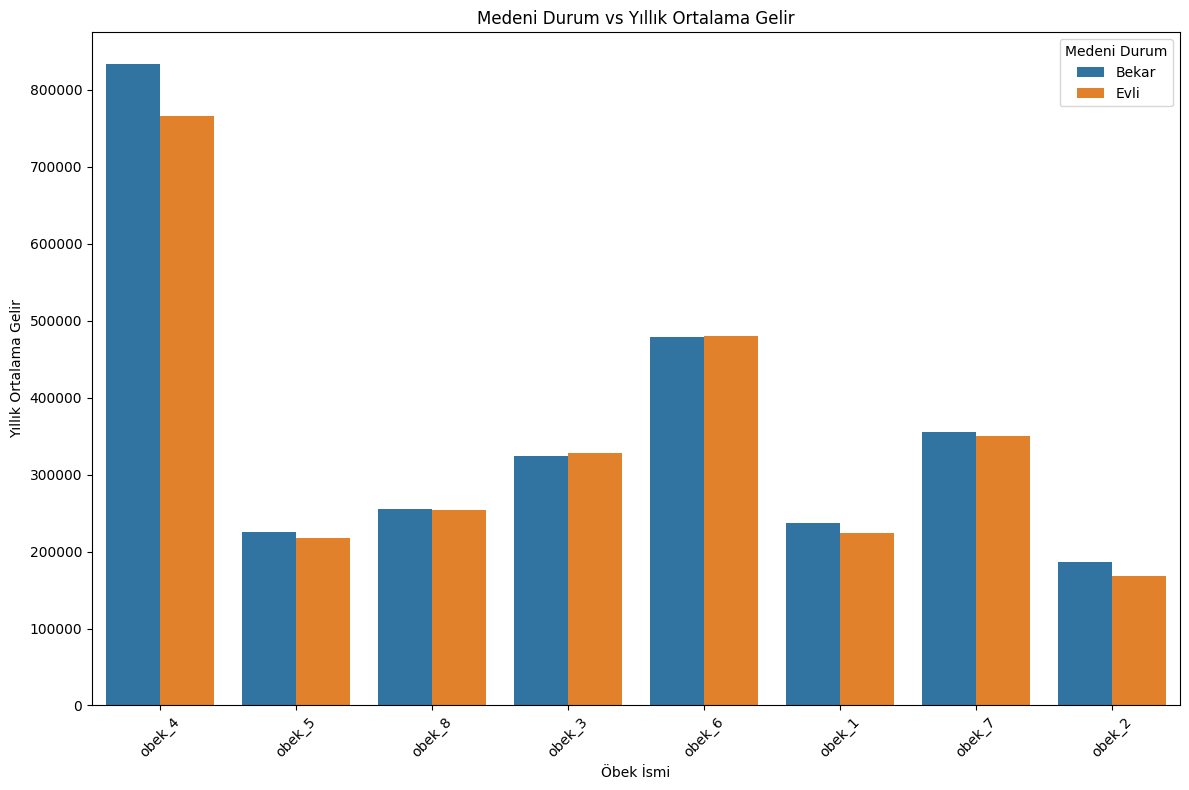

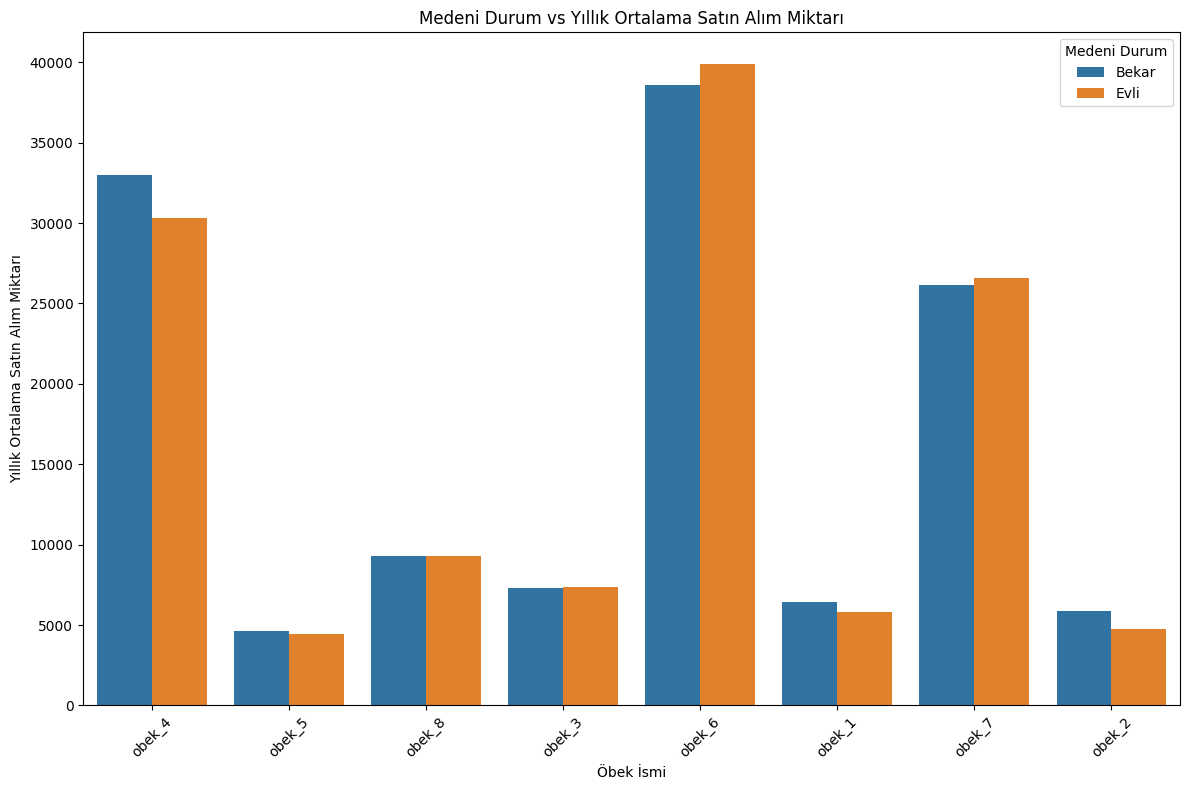

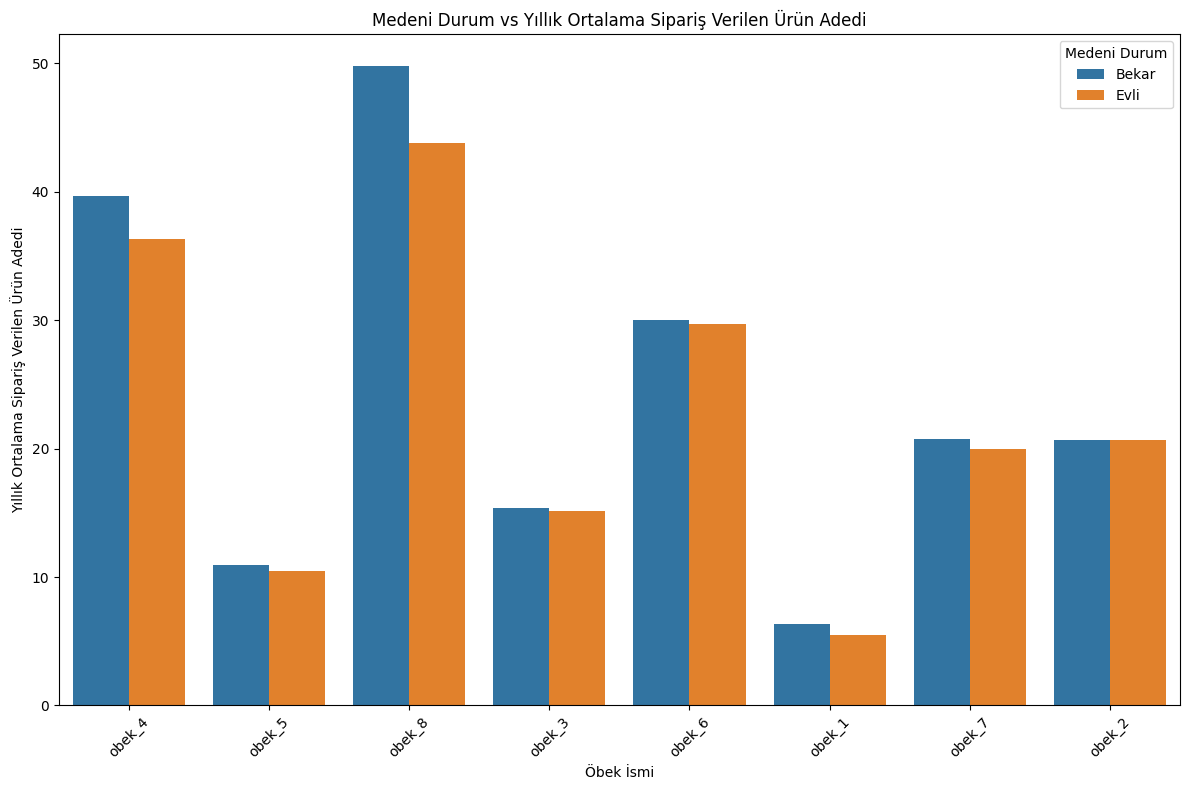

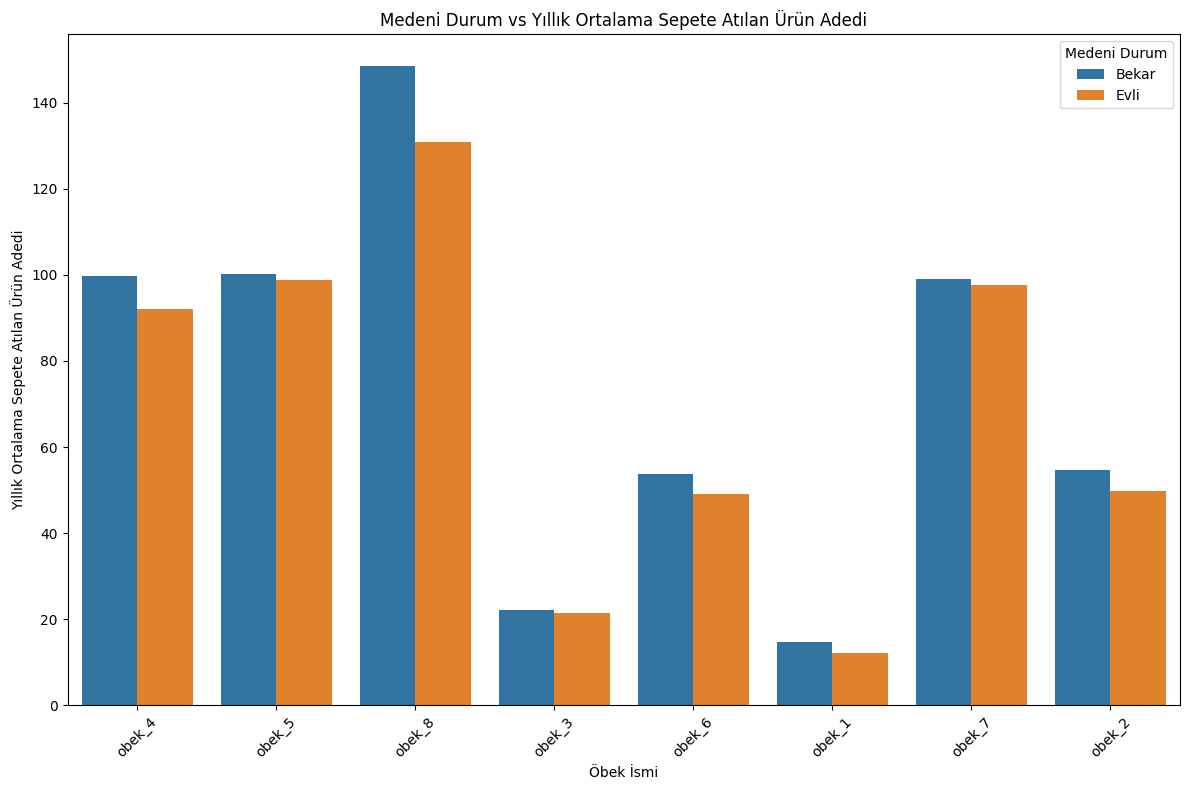

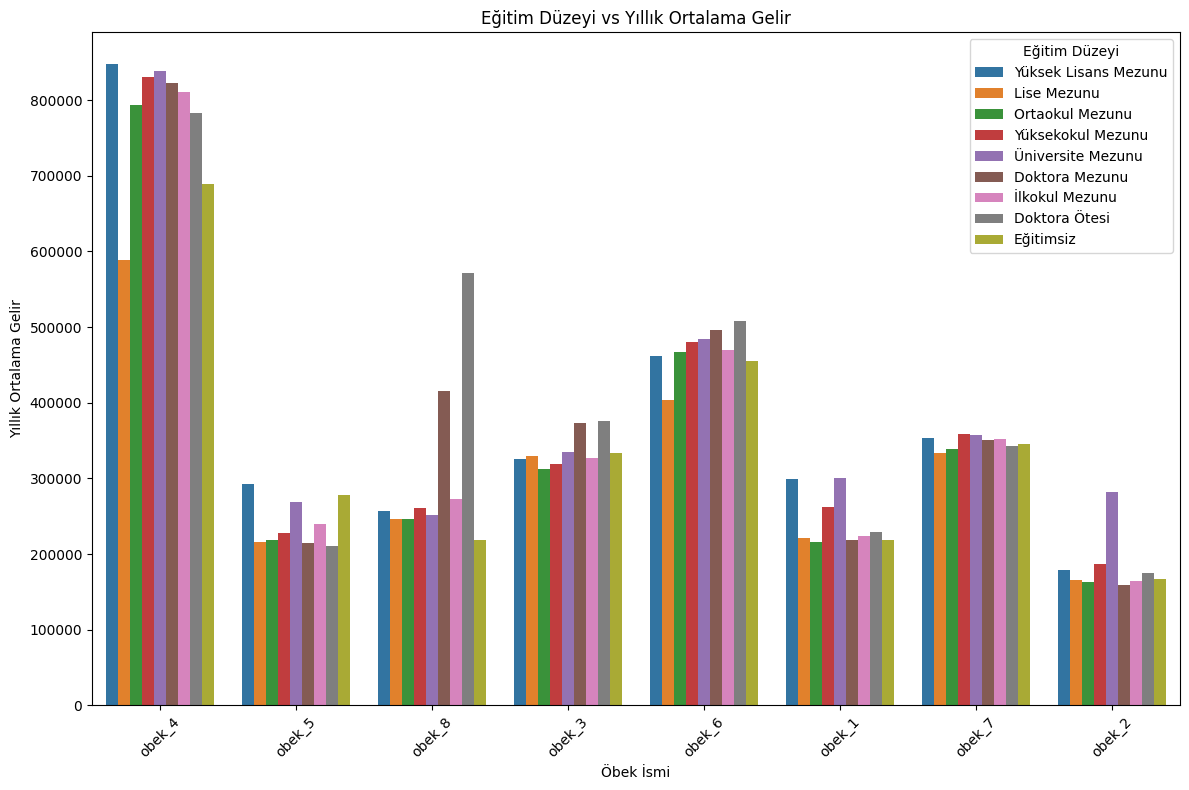

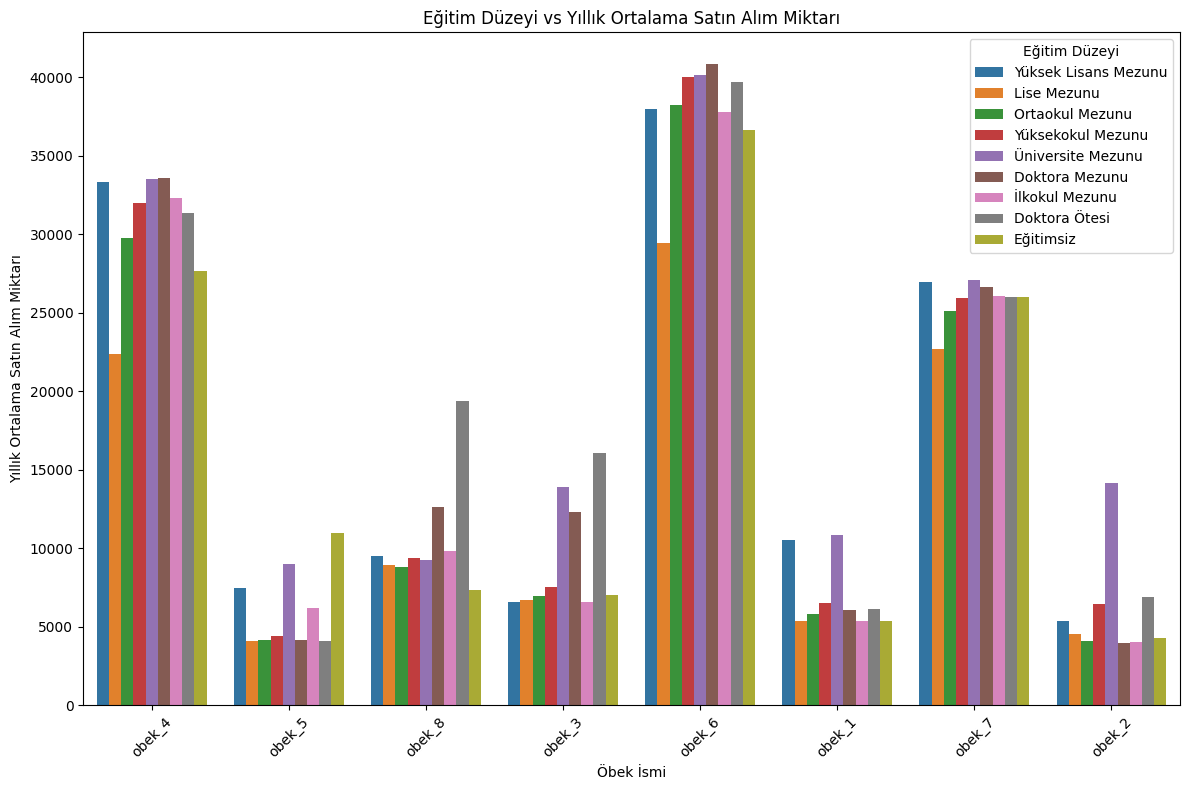

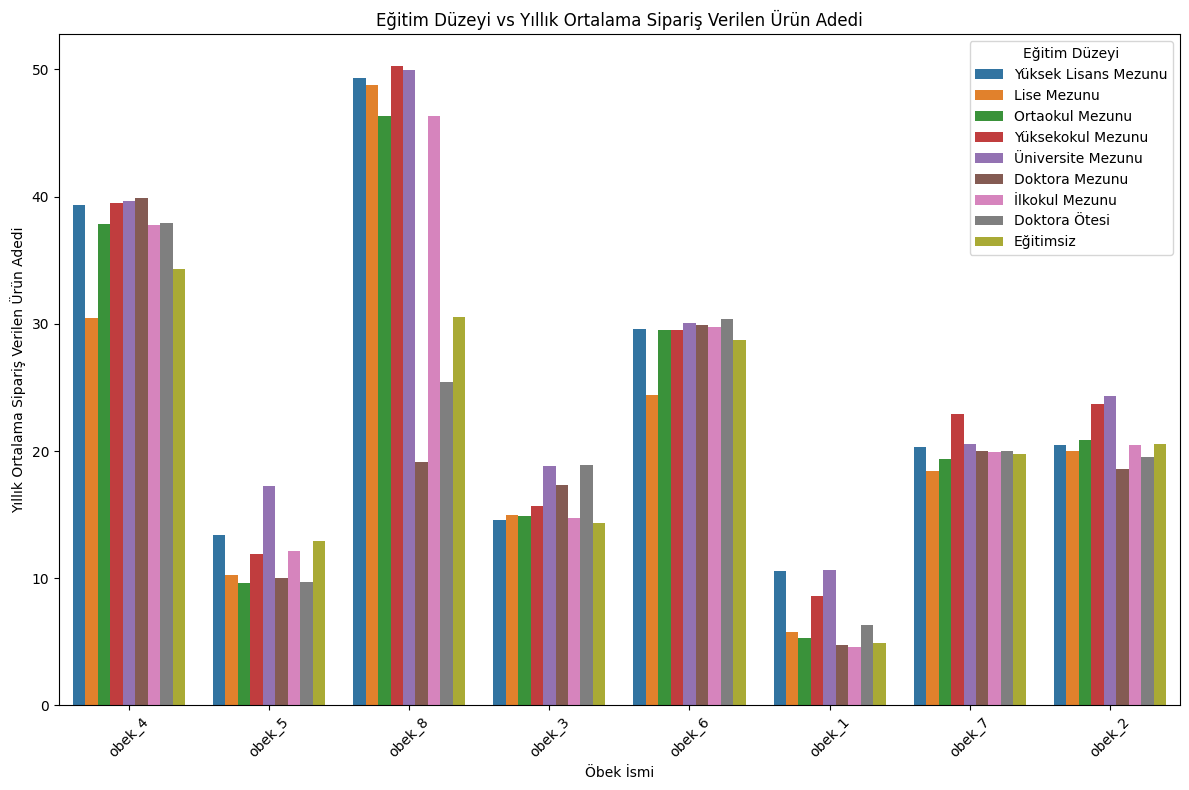

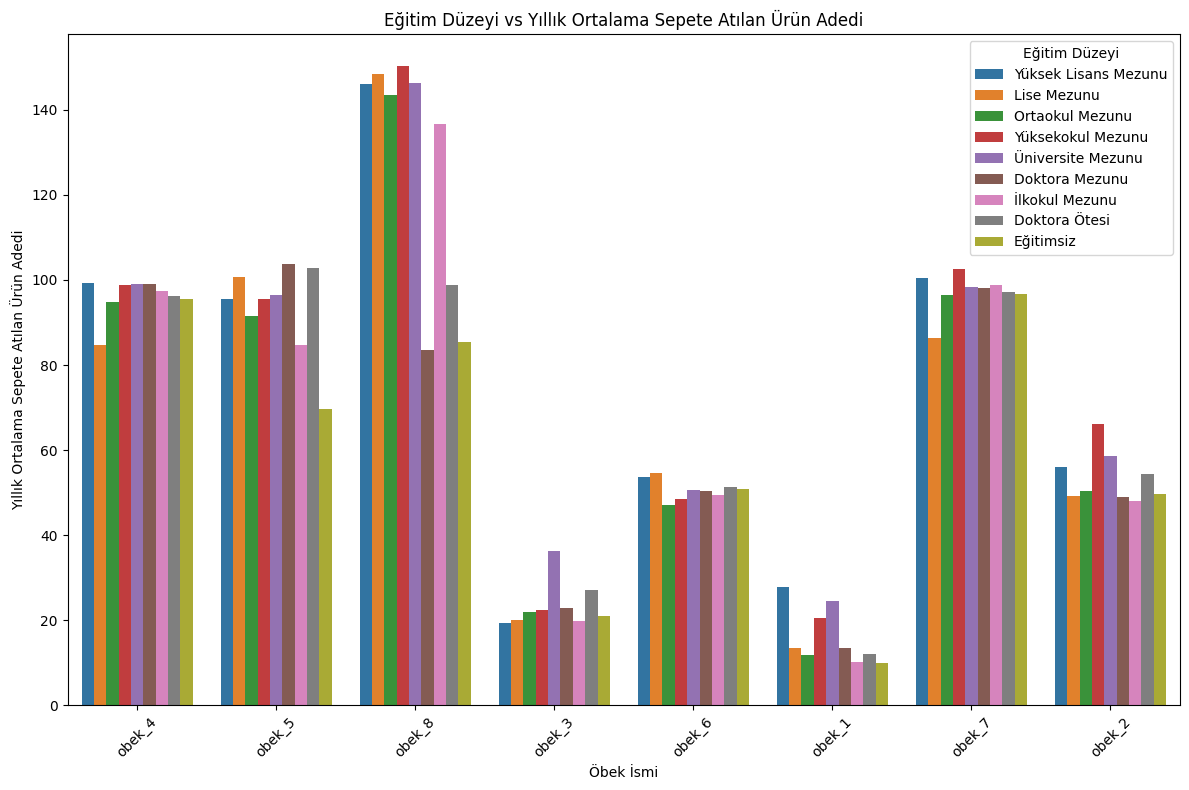

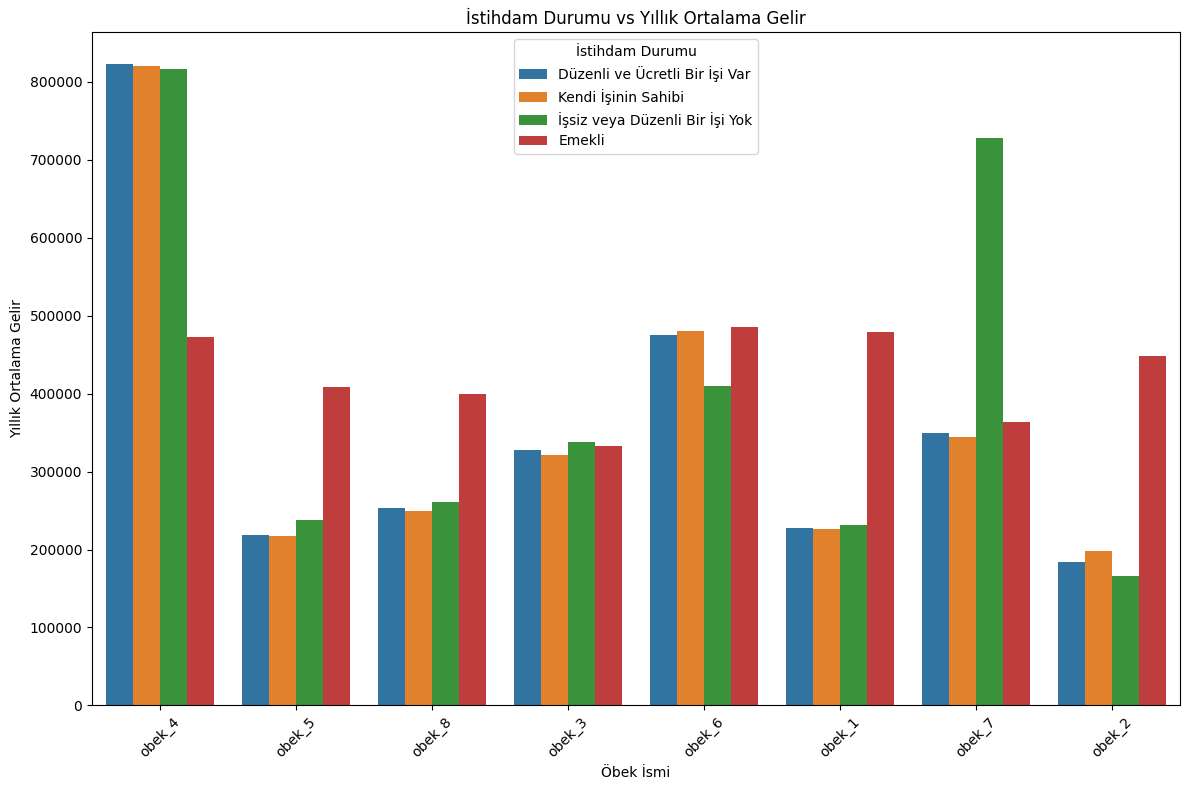

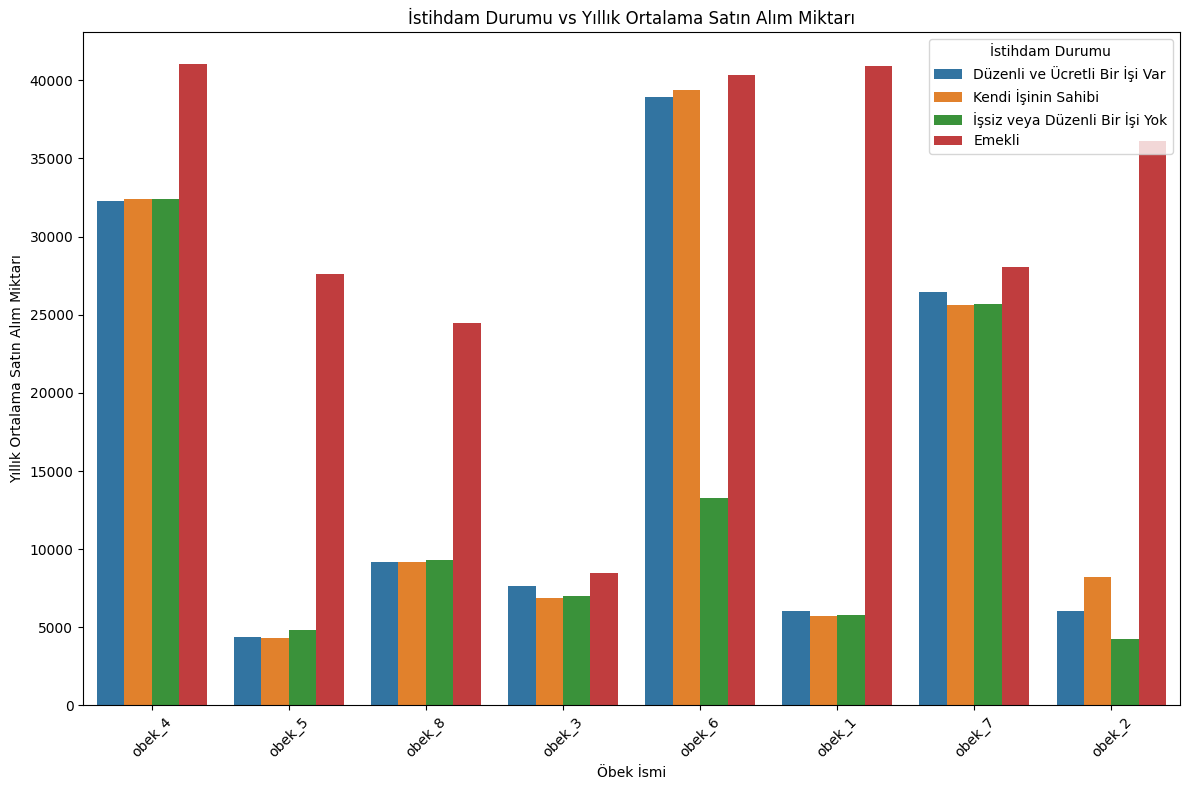

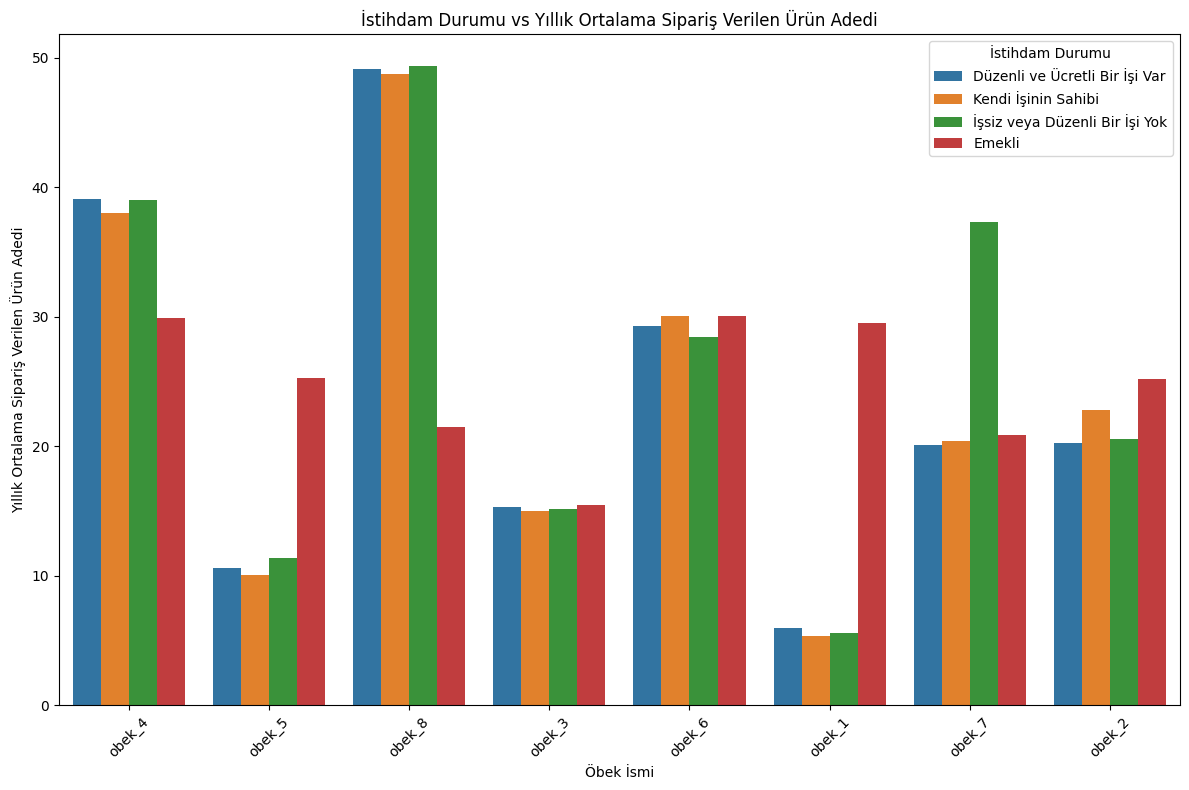

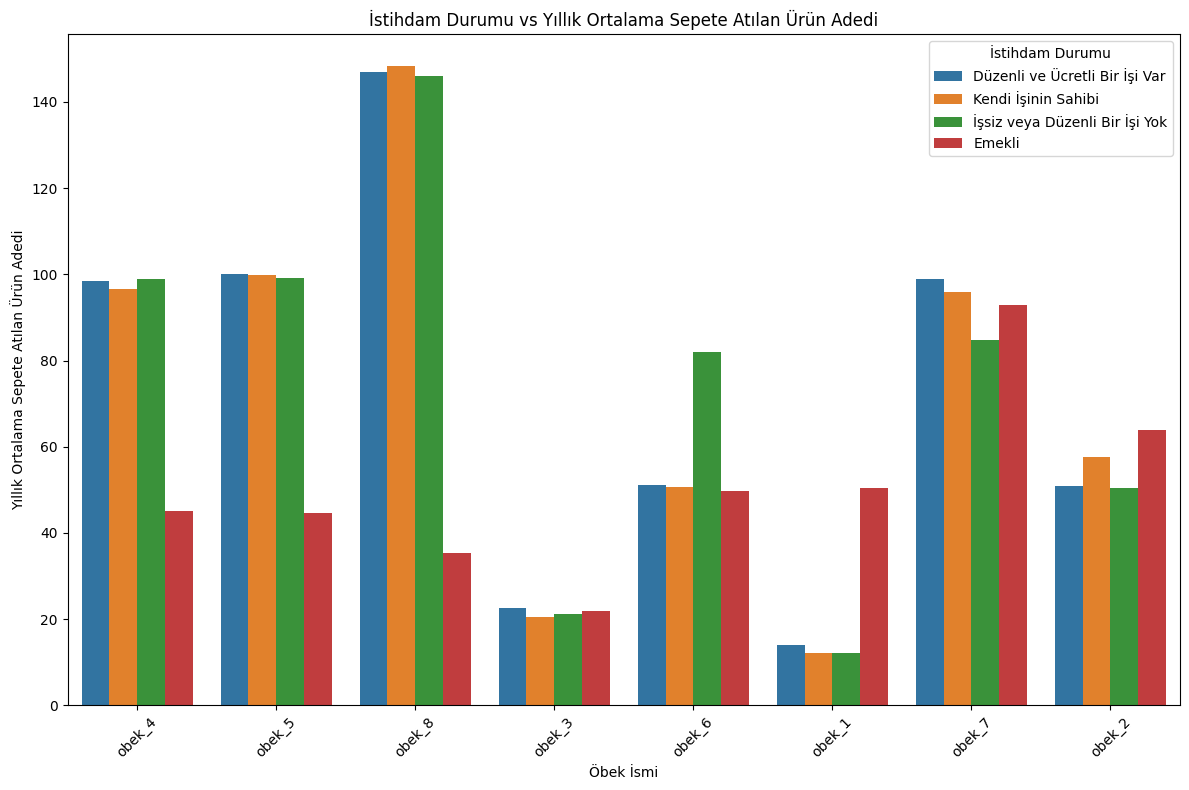

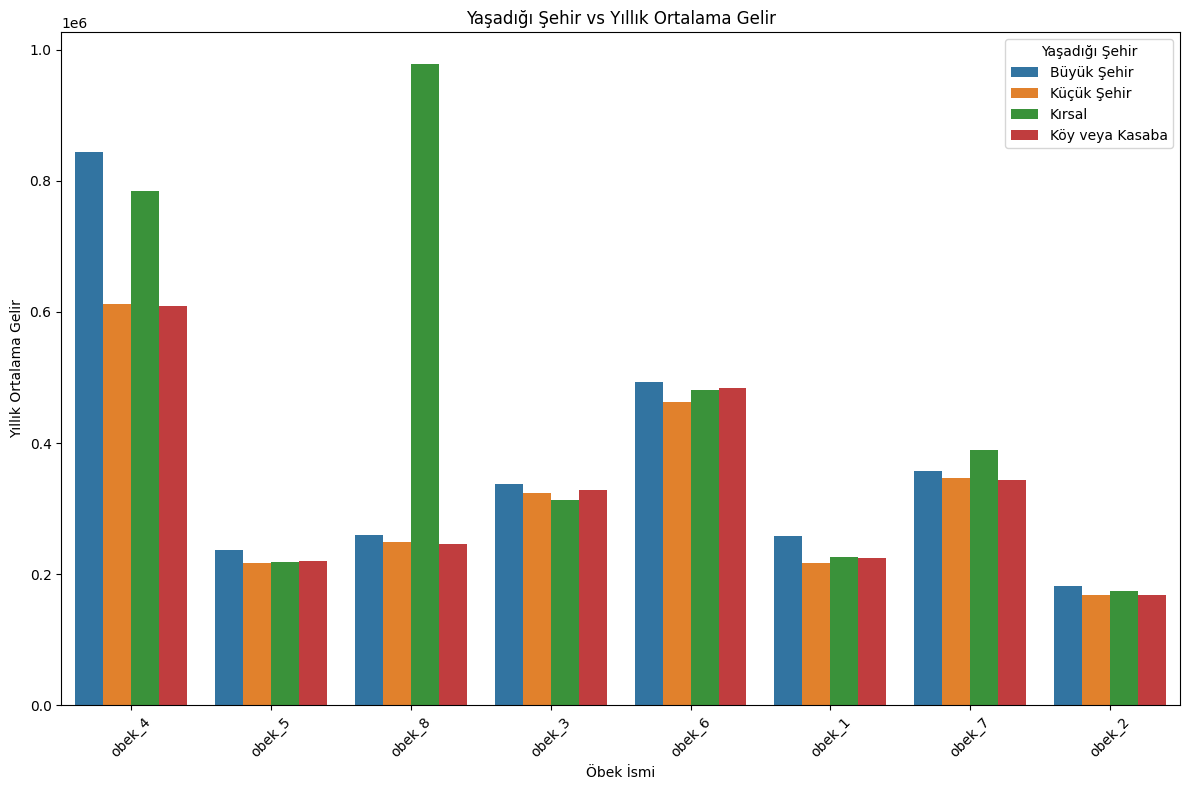

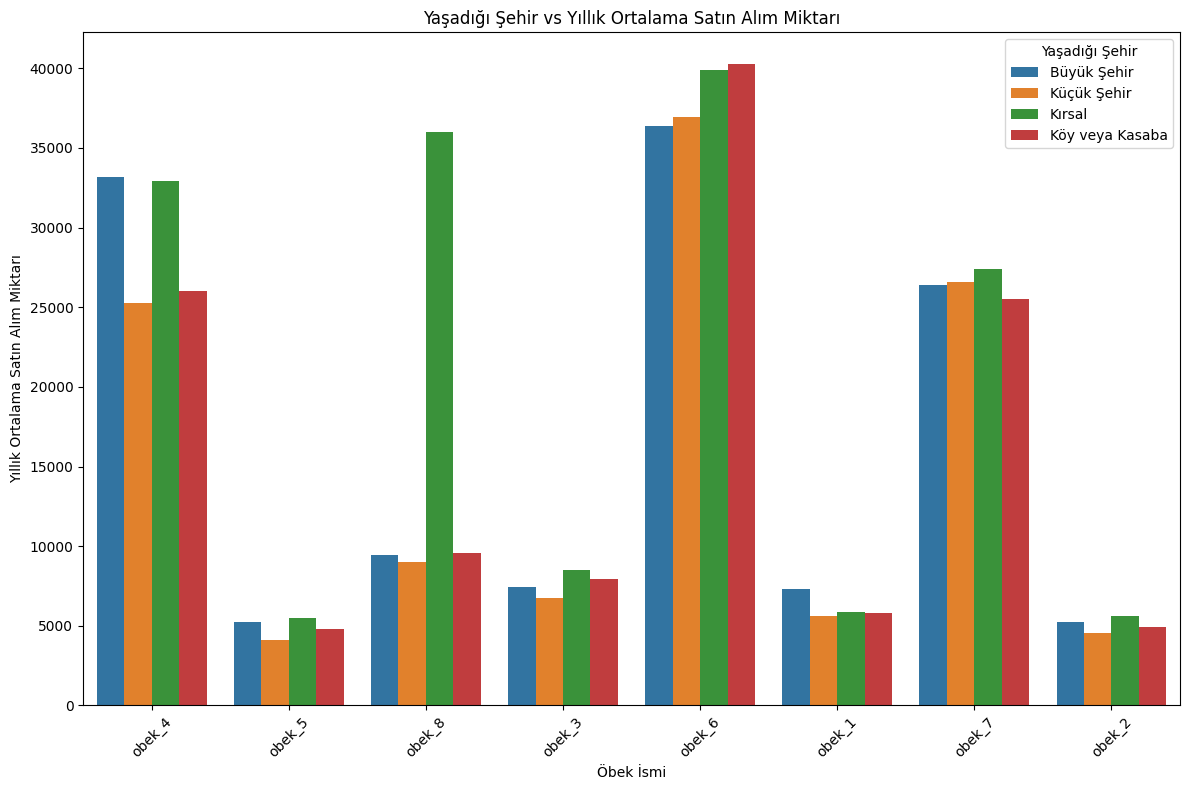

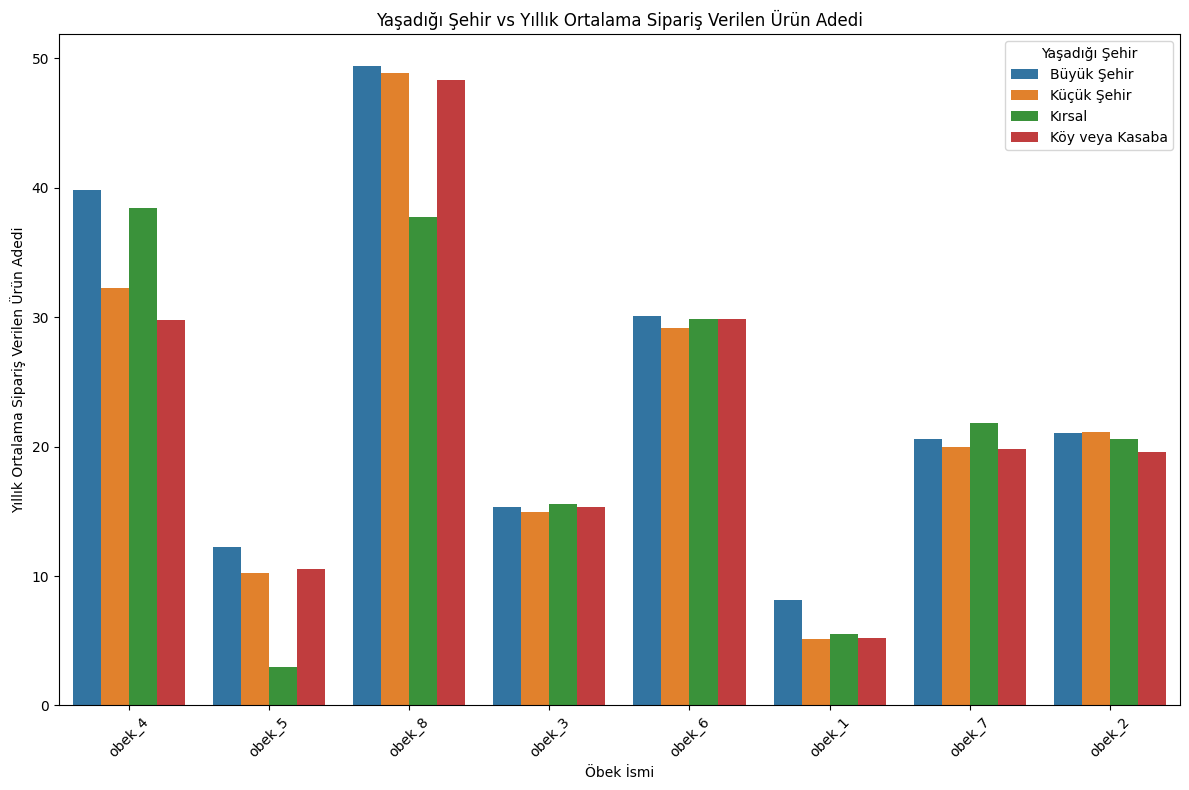

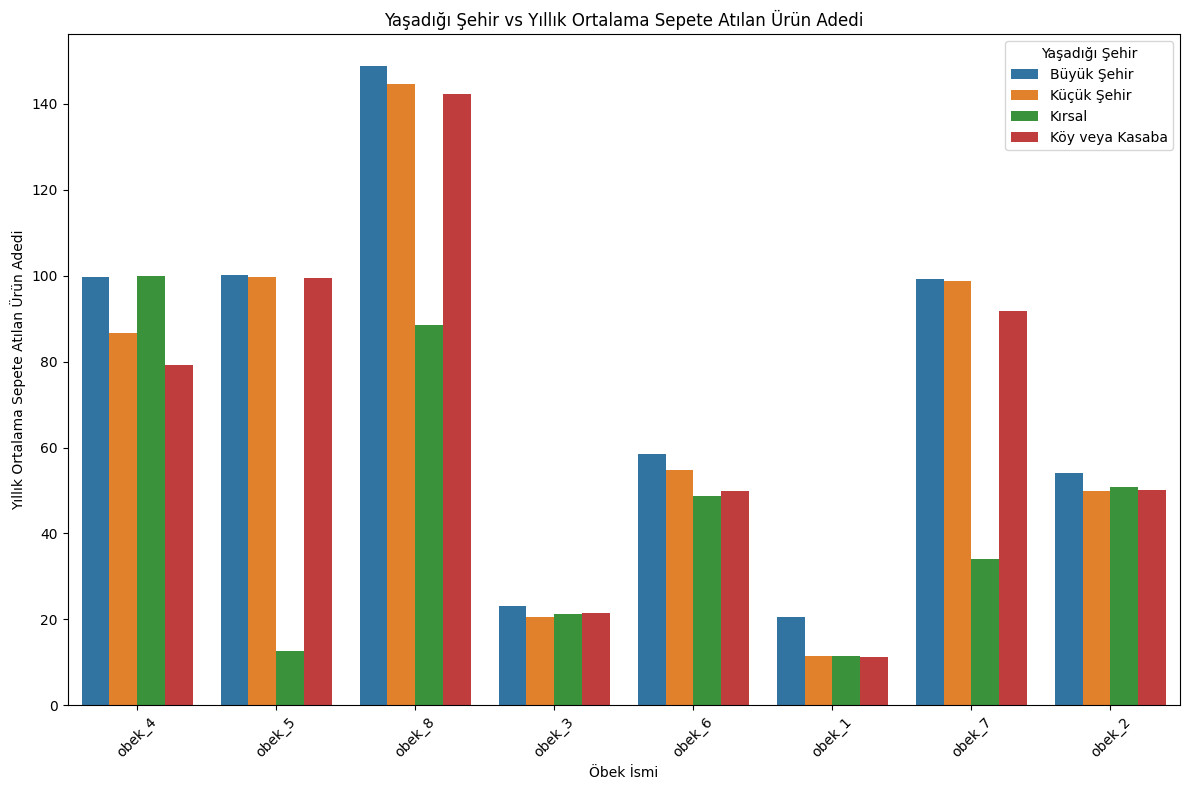

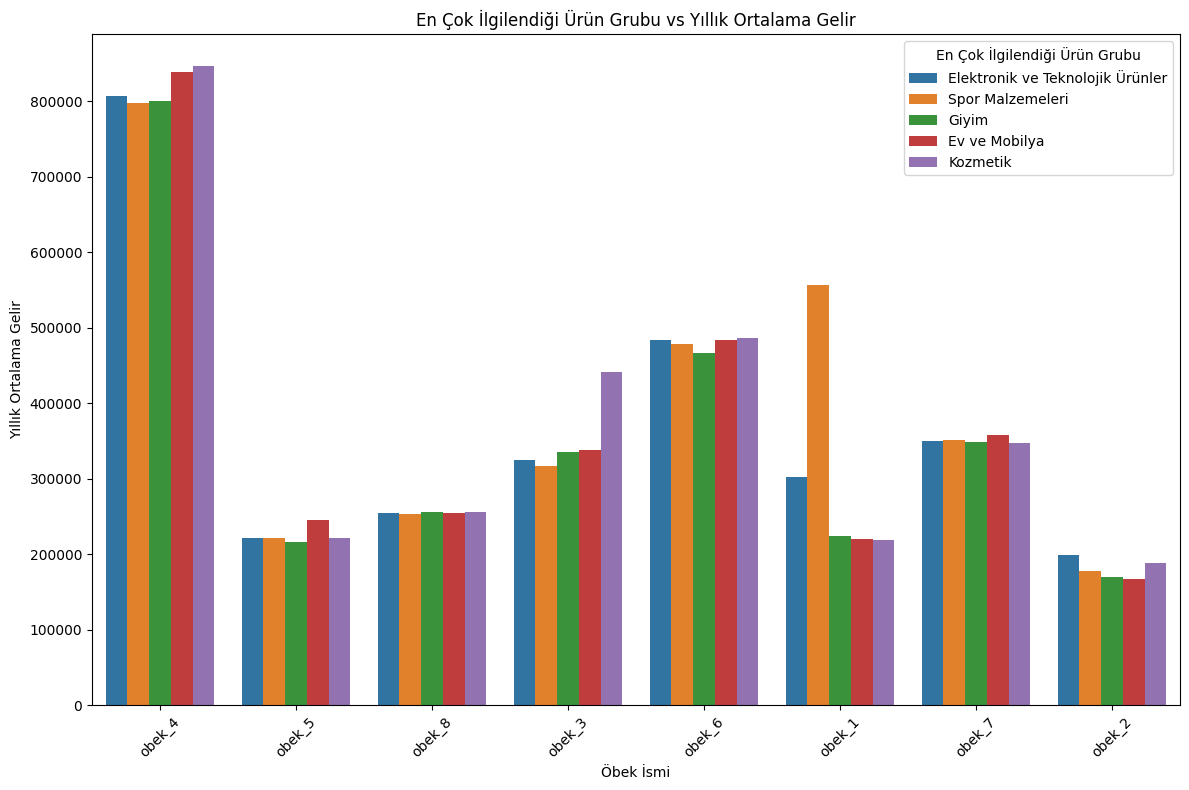

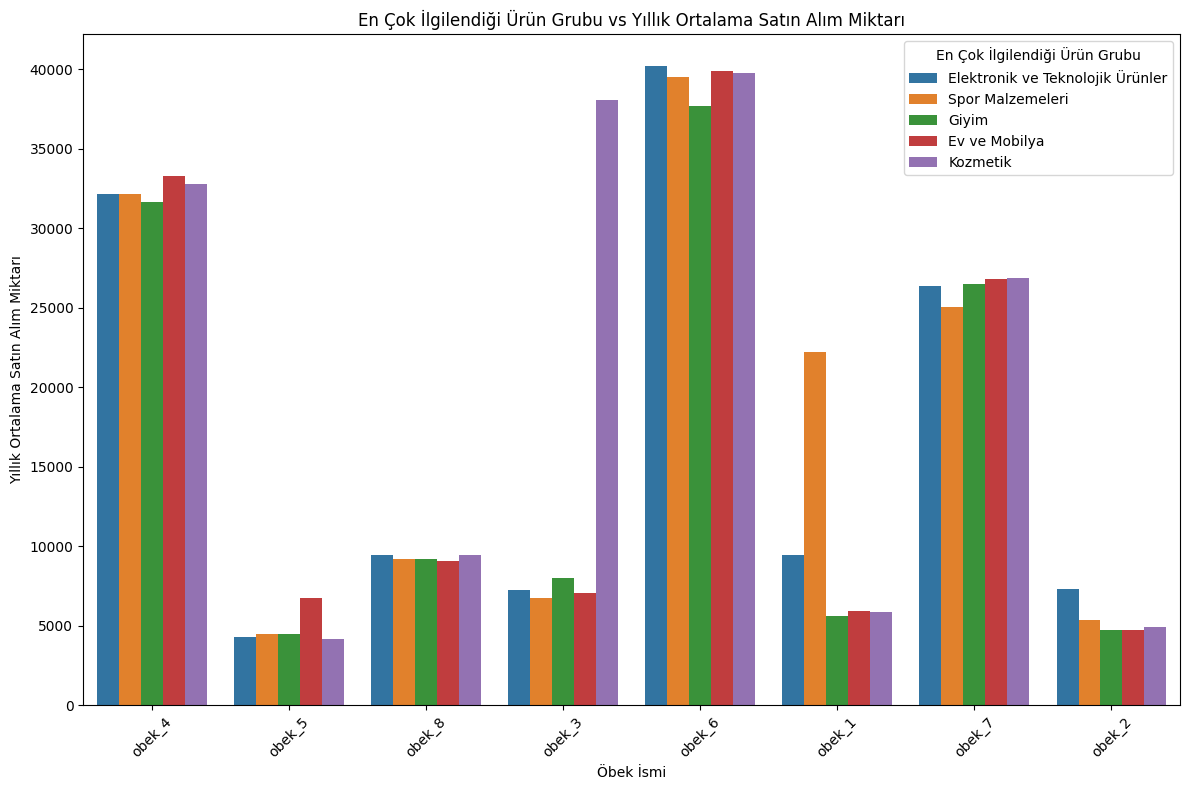

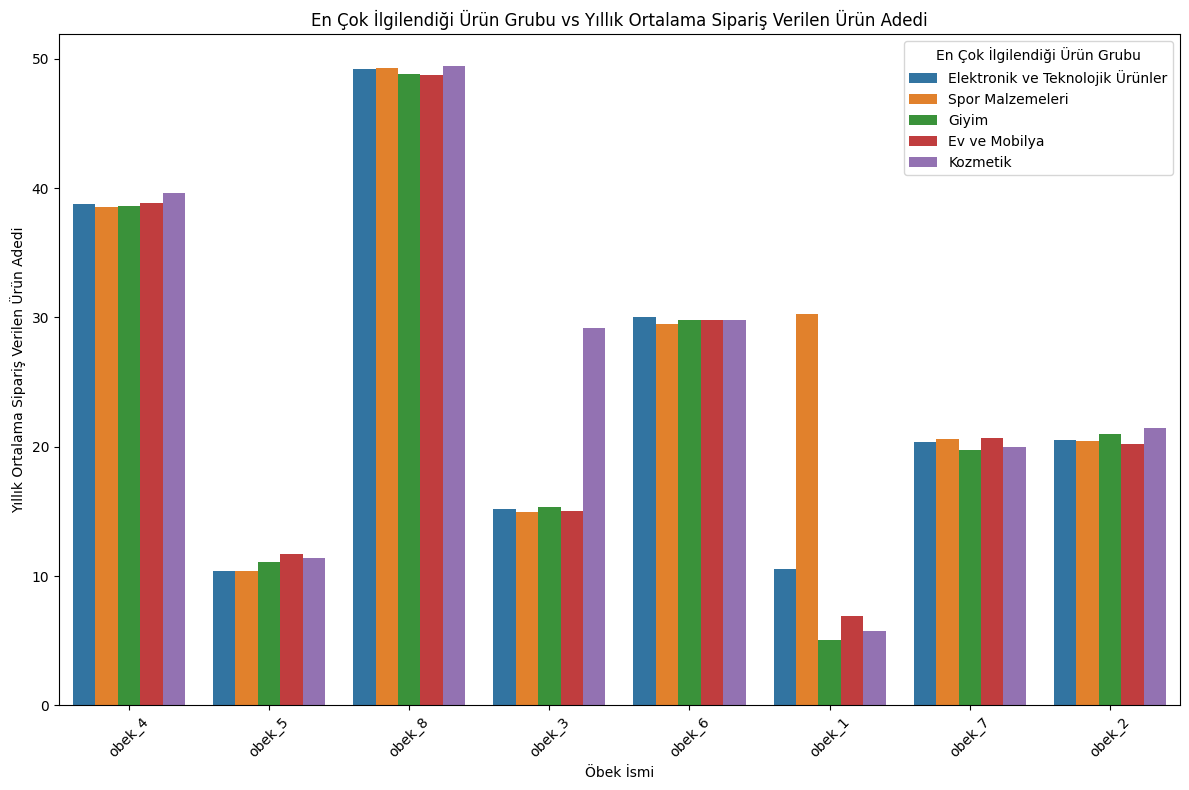

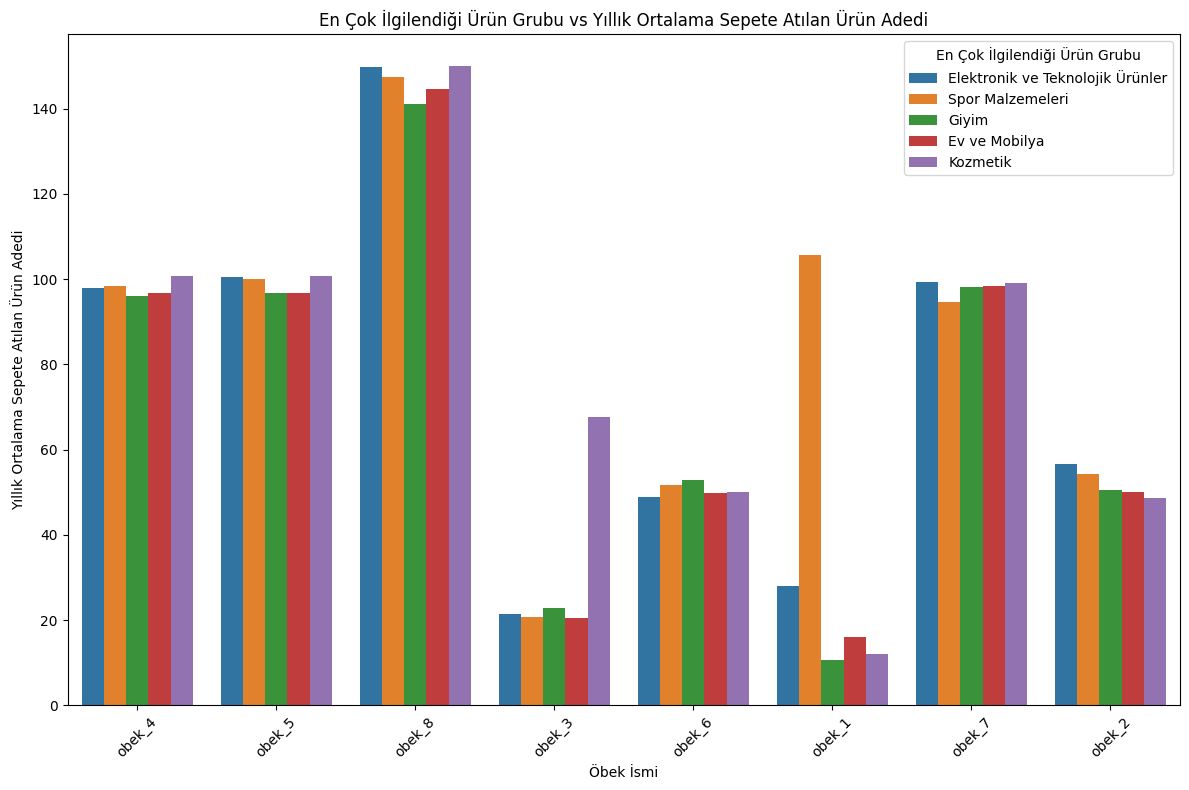

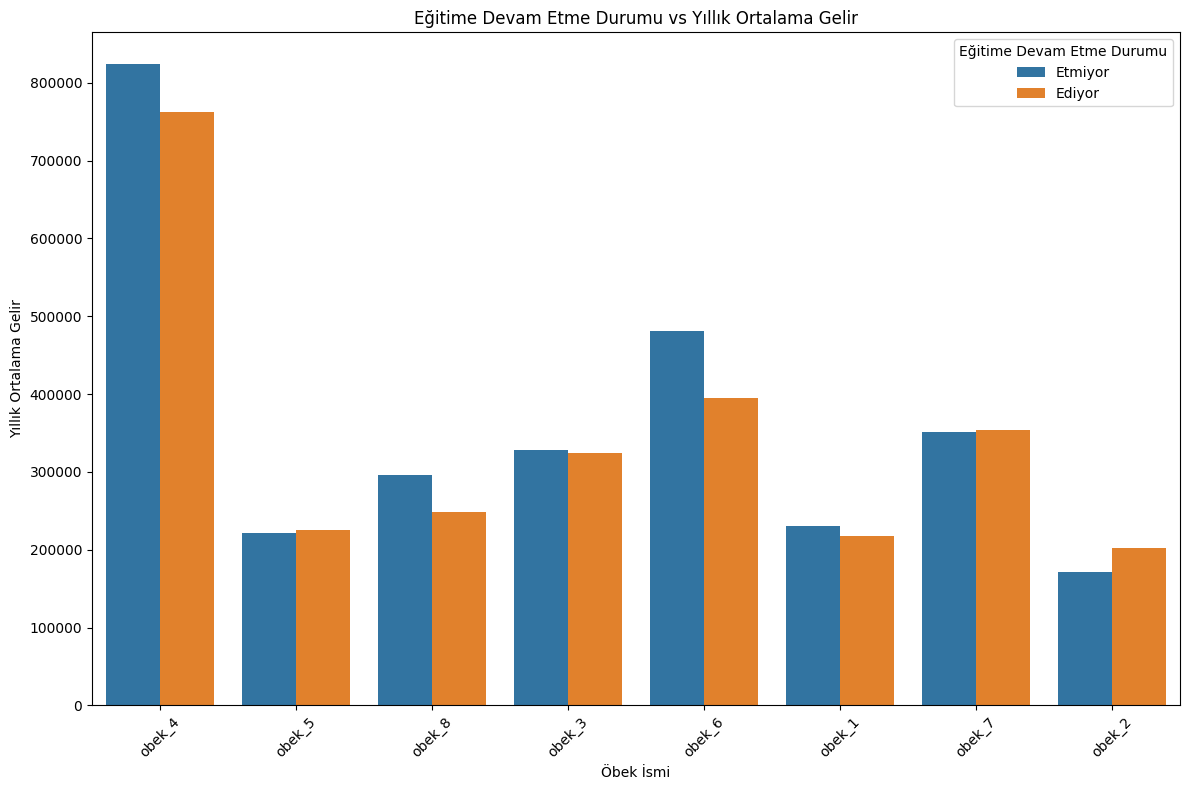

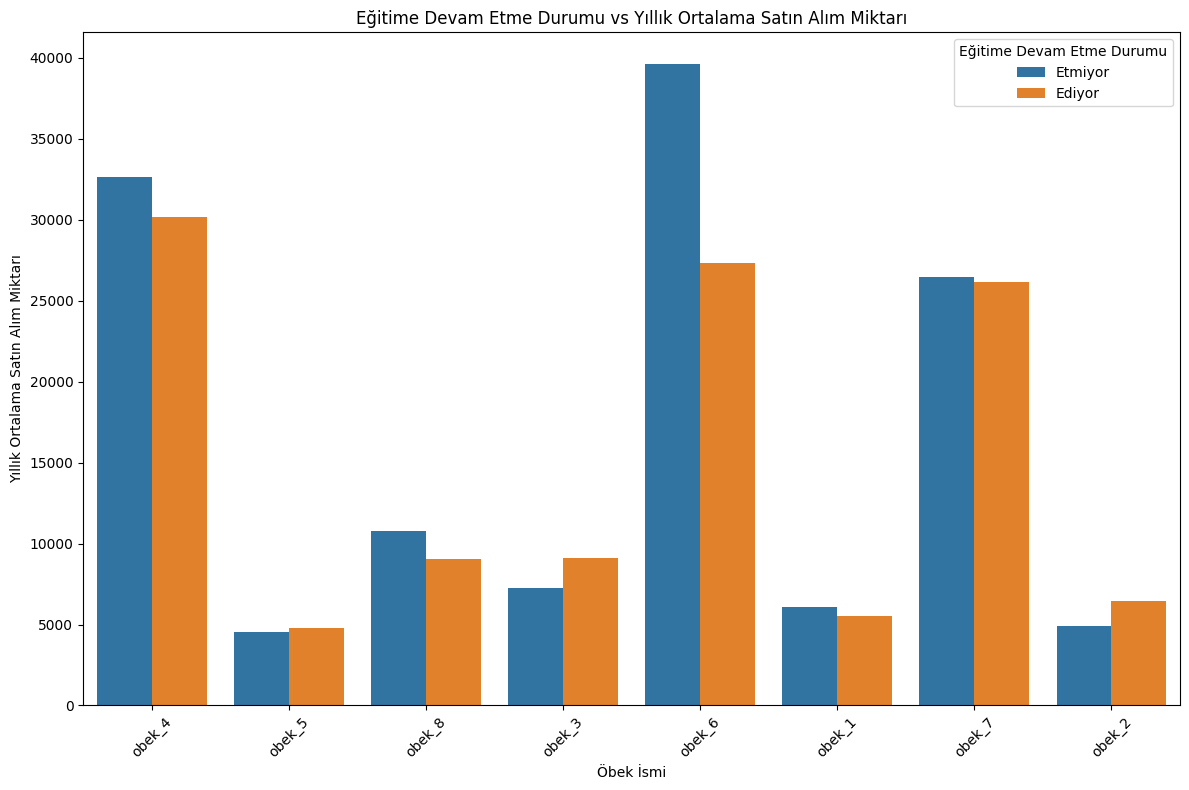

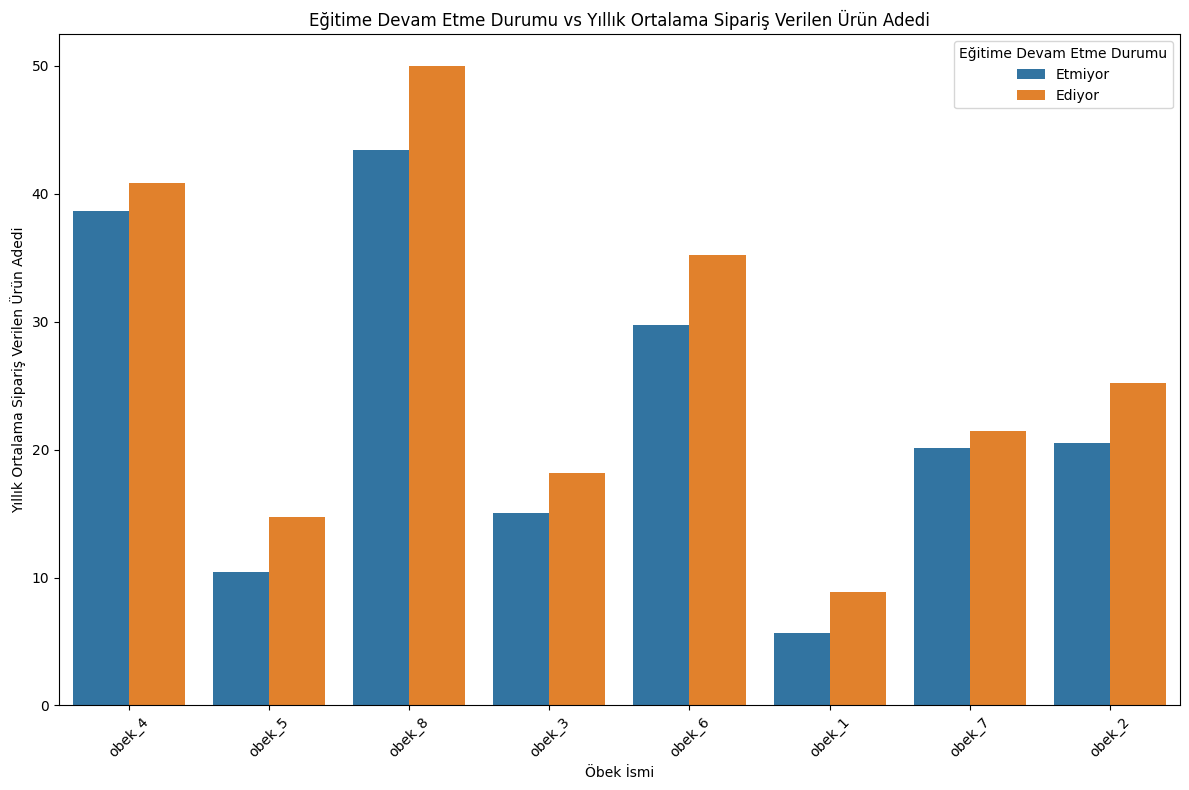

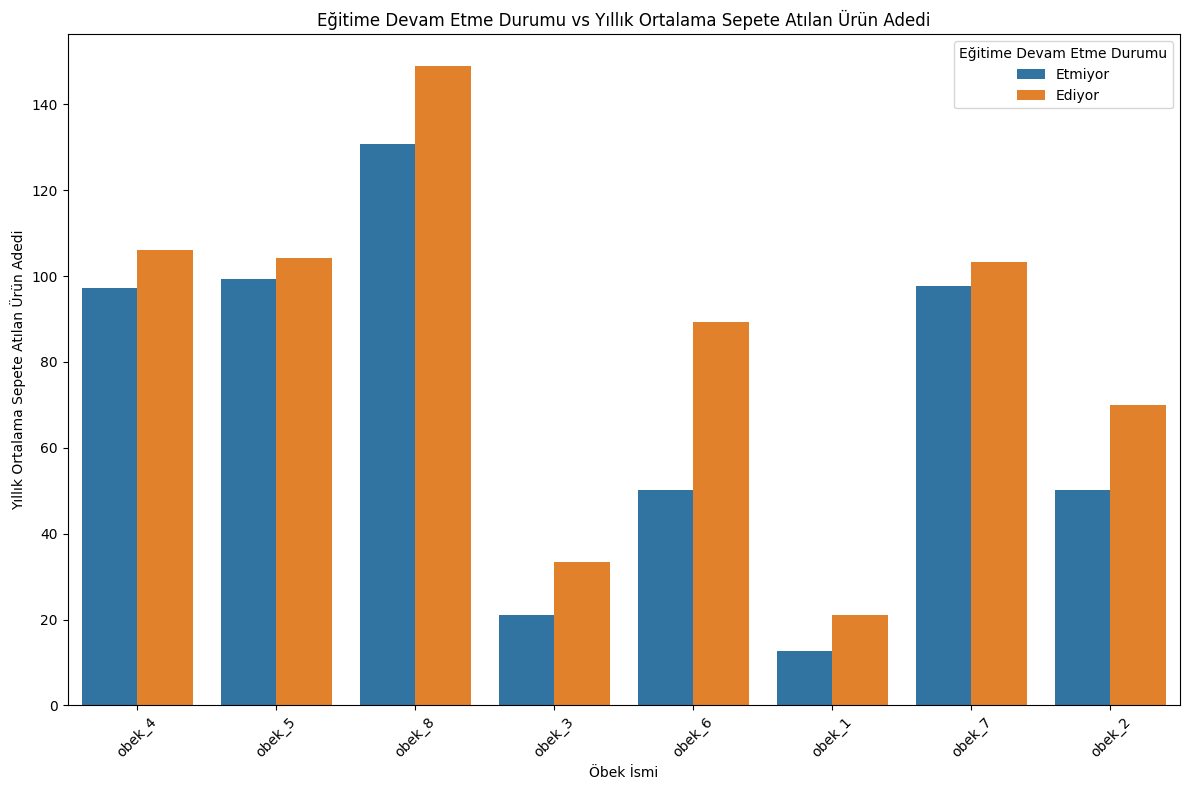

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile

# Define features and testclass
features = [
    "Yıllık Ortalama Gelir",
    "Yıllık Ortalama Satın Alım Miktarı",
    "Yıllık Ortalama Sipariş Verilen Ürün Adedi",
    "Yıllık Ortalama Sepete Atılan Ürün Adedi"
]



# Loop through each testclass
for sinif_x in testclass:
    for feature in features:
        # Create a new plot for each class-feature combination
        plt.figure(figsize=(12, 8))

        # Create a bar plot for the class-feature combination
        sns.barplot(data=train_data, x="Öbek İsmi", y=feature,hue=f"{sinif_x}", ci=None)

        # Customize plot labels and title
        plt.title(f"{sinif_x} vs {feature}")
        plt.xlabel("Öbek İsmi")
        plt.ylabel(feature)
        plt.xticks(rotation=45)
        plt.tight_layout()

plt.show()



In [6]:
# Cinsiyet sınıflama
# Yaş grubu sıralı
# medeni durum sınıflama
# Eğitim düzeyi Sıralı
# İstihdam durumu sınıflama
# Yaşadığı Şehir sıralama
# En Çok İlgilendiği Ürün Grubu sınıflama
#Eğitime Devam Etme Durumu

import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data1=train_data.copy()
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
categorical_columns = ["Cinsiyet", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"]
train_data1 = pd.get_dummies(train_data1, columns=categorical_columns, drop_first=True)

# Label Encoding yapma
label_encoder = LabelEncoder()

ordinal_columns = ["Yaş Grubu", "Eğitim Düzeyi","Öbek İsmi"]
for column in ordinal_columns:
    train_data1[column] = label_encoder.fit_transform(train_data1[column])

train_data1


index  Yaş Grubu  Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0         0          1              5          748266.440879   
1         1          4              3          246298.609605   
2         2          0              3          268582.732360   
3         3          3              3          327721.837865   
4         4          1              4          397431.626948   
...     ...        ...            ...                    ...   
5455   5455          4              7          478054.247819   
5456   5456          3              1          481852.853651   
5457   5457          3              8          309443.687351   
5458   5458          0              6          266604.268016   
5459   5459          0              6          276155.078333   

      Yıllık Ortalama Satın Alım Miktarı  \
0                           32010.900881   
1                            4145.729891   
2                            9924.379414   
3                            6417.780714   
4                            7886.663061   
...                                  ...   
5455                        43182.299801   
5456                        42107.996193   
5457                         4655.392445   
5458                         9016.165906   
5459                         9455.657480   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  Öbek İsmi  \
0                                      37.310644          3   
1                                      11.554851          4   
2                                      55.353236          7   
3                                      15.417239          2   
4                                      14.689837          2   
...                                          ...        ...   
5455                                   31.356284          5   
5456                                   26.288620          5   
5457                                    5.156906          0   
5458                                   39.205399          7   
5459                                   50.554188          7   

      Yıllık Ortalama Sepete Atılan Ürün Adedi   Grup  Cinsiyet_Kadın  ...  \
0                                   102.936904  Kadın               1  ...   
1                                    82.176053  Erkek               0  ...   
2                                   141.661426  Erkek               0  ...   
3                                    17.097397  Erkek               0  ...   
4                                    20.470459  Erkek               0  ...   
...                                        ...    ...             ...  ...   
5455                                 51.600436  Kadın               1  ...   
5456                                 49.190536  Erkek               0  ...   
5457                                  9.537384  Kadın               1  ...   
5458                                143.281718  Kadın               1  ...   
5459                                127.329348  Erkek               0  ...   

      İstihdam Durumu_Kendi İşinin Sahibi  \
0                                       0   
1                                       1   
2                                       0   
3                                       1   
4                                       0   
...                                   ...   
5455                                    0   
5456                                    1   
5457                                    0   
5458                                    0   
5459                                    0   

      İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  1   
...                                              ...   
5455                                               0   
5456                     

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

test_data1=test_data.copy()
# Kategorik değişkenleri One-Hot Encoding ile dönüştürme
categorical_columns = ["Cinsiyet", "Medeni Durum", "İstihdam Durumu", "Yaşadığı Şehir", "En Çok İlgilendiği Ürün Grubu","Eğitime Devam Etme Durumu"]
test_data1 = pd.get_dummies(test_data1, columns=categorical_columns, drop_first=True)

# Label Encoding yapma
label_encoder = LabelEncoder()

ordinal_columns = ["Yaş Grubu", "Eğitim Düzeyi"]
for column in ordinal_columns:
    test_data1[column] = label_encoder.fit_transform(test_data1[column])

test_data1

index  Yaş Grubu  Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0         0          3              5          365331.930346   
1         1          2              3          414899.236174   
2         2          4              2          152825.872271   
3         3          3              1          489052.908472   
4         4          0              5          323635.711534   
...     ...        ...            ...                    ...   
2335   2335          0              6          259190.078834   
2336   2336          1              3          194580.563177   
2337   2337          4              5          357730.521969   
2338   2338          0              1          213179.637202   
2339   2339          3              7          519013.573683   

      Yıllık Ortalama Satın Alım Miktarı  \
0                            5566.587664   
1                            6756.766203   
2                            4493.915682   
3                           42670.646595   
4                            5959.266948   
...                                  ...   
2335                         9559.156534   
2336                         4070.232154   
2337                        22589.204381   
2338                         4205.390562   
2339                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                      15.442635   
1                                      14.957246   
2                                      10.907930   
3                                      32.333021   
4                                       4.519968   
...                                          ...   
2335                                   41.883661   
2336                                   20.082996   
2337                                   18.922305   
2338                                   10.758108   
2339                                   30.826534   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  \
0                                    19.646460               0   
1                                    19.675863               0   
2                                    46.904518               1   
3                                    48.083609               1   
4                                    12.752491               0   
...                                        ...             ...   
2335                                117.627785               1   
2336                                 45.659622               1   
2337                                100.691379               0   
2338                                 97.778913               0   
2339                                 39.657830               0   

      Medeni Durum_Evli  İstihdam Durumu_Emekli  \
0                     1                       0   
1                     0                       0   
2                     1                       0   
3                     1                       0   
4                     1                       0   
...                 ...                     ...   
2335                  0                       0   
2336                  1                       0   
2337                  1                       0   
2338                  1                       0   
2339                  1                       0   

      İstihdam Durumu_Kendi İşinin Sahibi  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   
...                                   ...   
2335                                    1   
2336                                    0   
2337                                    0   
2338                                    0   
2339                                    0   

      İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                                  0   
1                       

Logistic Regression Accuracy: 0.9542124542124543
Random Forest Accuracy: 0.9615384615384616
K-Nearest Neighbors Accuracy: 0.924908424908425


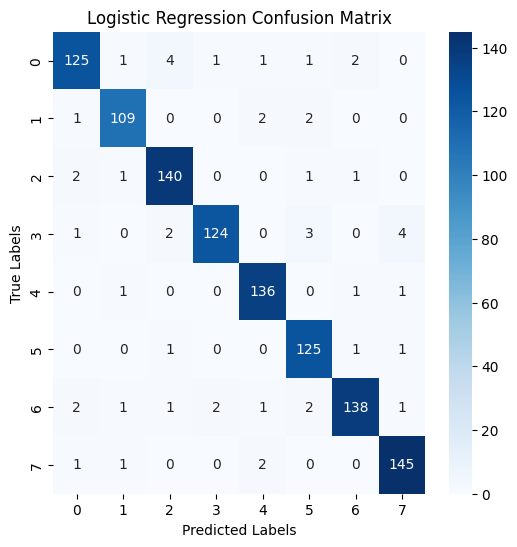

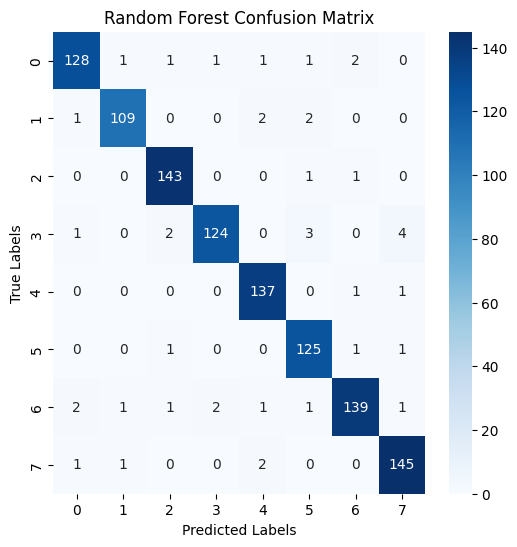

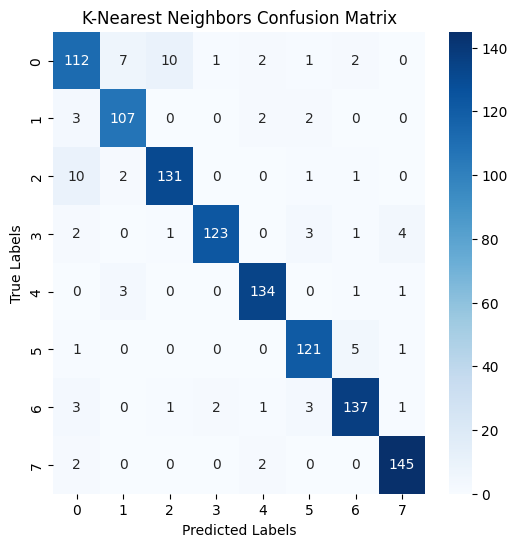

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Tahmin etmek istediğimiz sütun
y = train_data1["Öbek İsmi"]

# Tahmin etmek istediğimiz özellik hariç diğer tüm sütunları al
X = train_data1.drop(columns=["Öbek İsmi","index","Grup"],axis=1)

# Verileri RobustScaler ile ölçeklendirme
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
test_X_scaled = scaler.transform(test_data1.drop("index",axis=1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

# Modelleri oluşturma2
log_model = LogisticRegression(solver='liblinear')
rf_model = RandomForestClassifier()
knn_model = KNeighborsClassifier()

# Modelleri eğitme
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Modellerden tahminler yapma
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

# Doğruluk değerlerini hesaplama
log_accuracy = accuracy_score(y_test, log_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Karışıklık matrisleri
log_cm = confusion_matrix(y_test, log_preds)
rf_cm = confusion_matrix(y_test, rf_preds)
knn_cm = confusion_matrix(y_test, knn_preds)

# Doğruluk değerlerini ekrana yazdırma
print("Logistic Regression Accuracy:", log_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

# Karışıklık matrislerini görselleştirme
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(log_cm, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(rf_cm, "Random Forest Confusion Matrix")
plot_confusion_matrix(knn_cm, "K-Nearest Neighbors Confusion Matrix")


In [9]:
test_data1

index  Yaş Grubu  Eğitim Düzeyi  Yıllık Ortalama Gelir  \
0         0          3              5          365331.930346   
1         1          2              3          414899.236174   
2         2          4              2          152825.872271   
3         3          3              1          489052.908472   
4         4          0              5          323635.711534   
...     ...        ...            ...                    ...   
2335   2335          0              6          259190.078834   
2336   2336          1              3          194580.563177   
2337   2337          4              5          357730.521969   
2338   2338          0              1          213179.637202   
2339   2339          3              7          519013.573683   

      Yıllık Ortalama Satın Alım Miktarı  \
0                            5566.587664   
1                            6756.766203   
2                            4493.915682   
3                           42670.646595   
4                            5959.266948   
...                                  ...   
2335                         9559.156534   
2336                         4070.232154   
2337                        22589.204381   
2338                         4205.390562   
2339                        42675.353591   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                      15.442635   
1                                      14.957246   
2                                      10.907930   
3                                      32.333021   
4                                       4.519968   
...                                          ...   
2335                                   41.883661   
2336                                   20.082996   
2337                                   18.922305   
2338                                   10.758108   
2339                                   30.826534   

      Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Kadın  \
0                                    19.646460               0   
1                                    19.675863               0   
2                                    46.904518               1   
3                                    48.083609               1   
4                                    12.752491               0   
...                                        ...             ...   
2335                                117.627785               1   
2336                                 45.659622               1   
2337                                100.691379               0   
2338                                 97.778913               0   
2339                                 39.657830               0   

      Medeni Durum_Evli  İstihdam Durumu_Emekli  \
0                     1                       0   
1                     0                       0   
2                     1                       0   
3                     1                       0   
4                     1                       0   
...                 ...                     ...   
2335                  0                       0   
2336                  1                       0   
2337                  1                       0   
2338                  1                       0   
2339                  1                       0   

      İstihdam Durumu_Kendi İşinin Sahibi  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       1   
...                                   ...   
2335                                    1   
2336                                    0   
2337                                    0   
2338                                    0   
2339                                    0   

      İstihdam Durumu_İşsiz veya Düzenli Bir İşi Yok  \
0                                                  0   
1                       

In [10]:
rf_preds = rf_model.predict(test_X_scaled)
rf_preds

array([2, 2, 1, ..., 6, 4, 5])

In [11]:
test_data["Öbek İsmi"]=rf_preds

In [12]:
for i in range(len(test_data["Öbek İsmi"])):
    if test_data["Öbek İsmi"][i] == 0:
        test_data["Öbek İsmi"][i] = "obek_1"
    elif test_data["Öbek İsmi"][i] == 1:
        test_data["Öbek İsmi"][i] = "obek_2"
    elif test_data["Öbek İsmi"][i] == 2:
        test_data["Öbek İsmi"][i] = "obek_3"
    elif test_data["Öbek İsmi"][i] == 3:
        test_data["Öbek İsmi"][i] = "obek_4"
    elif test_data["Öbek İsmi"][i] == 4:
        test_data["Öbek İsmi"][i] = "obek_5"
    elif test_data["Öbek İsmi"][i] == 5:
        test_data["Öbek İsmi"][i] = "obek_6"
    elif test_data["Öbek İsmi"][i] == 6:
        test_data["Öbek İsmi"][i] = "obek_7"
    elif test_data["Öbek İsmi"][i] == 7:
        test_data["Öbek İsmi"][i] = "obek_8"



<ipython-input-12-7d78f5312885>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Öbek İsmi"][i] = "obek_3"


In [13]:
import pandas as pd

# Örnek test verileri
test_data2 = {
    "id": test_data["index"],
    "Öbek İsmi": test_data["Öbek İsmi"]
}

# Test verilerini DataFrame'e dönüştürme
df = pd.DataFrame(test_data2)

# DataFrame'i gösterme
print(df)


        id Öbek İsmi
0        0    obek_3
1        1    obek_3
2        2    obek_2
3        3    obek_6
4        4    obek_1
...    ...       ...
2335  2335    obek_8
2336  2336    obek_2
2337  2337    obek_7
2338  2338    obek_5
2339  2339    obek_6

[2340 rows x 2 columns]


In [14]:
df.to_csv("Submission_predict1.csv", index=False)
